In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from utils import PkdbModel
from analysis import PlotCategory, create_plots

In [3]:
# filter out outliers probably from same clinical study 

In [4]:
def all_idx(data):
    return pd.Series(True, index=data.index)

def healthy_idx(data):
    return data[('healthy', 'choice')] == 'Y'
          
def rest_idx(data):
    return (~healthy_idx(data))

In [5]:
colors = sns.color_palette("colorblind",n_colors=5)

categories_all = [           
            PlotCategory(name="Healthy", color=colors[0], marker='o', data_idx=healthy_idx),
            PlotCategory(name="Unhealthy", color="darkgray", marker='o', data_idx=rest_idx),

             ]

* paracetamol_clearance *
Healthy    I: 166 G: 106 TI: 1156
Unhealthy  I: 69  G: 25 TI: 326
Healthy    I: 93  G: 47 TI: 603
Unhealthy  I: 53  G: 21 TI: 259
Healthy    I: 219 G: 53 TI: 794
Unhealthy  I: 78  G: 22 TI: 294
Healthy    I: 95  G: 49 TI: 616
Unhealthy  I: 53  G: 25 TI: 297
* paracetamol_thalf *
Healthy    I: 161 G: 124 TI: 1375
Unhealthy  I: 86  G: 33 TI: 435
Healthy    I: 28  G: 47 TI: 542
Unhealthy  I: 35  G: 30 TI: 329
Healthy    I: 22  G: 45 TI: 525
Unhealthy  I: 35  G: 26 TI: 291
Healthy    I: 22  G: 45 TI: 525
Unhealthy  I: 35  G: 26 TI: 291
* paracetamol_tmax *
Healthy    I: 68  G: 107 TI: 1100
Unhealthy  I: 55  G: 25 TI: 392
Healthy    I: 17  G: 35 TI: 388
Unhealthy  I: 25  G: 22 TI: 240
Healthy    I: 2   G: 31 TI: 349
Unhealthy  I: 25  G: 18 TI: 202
Healthy    I: 2   G: 31 TI: 349
Unhealthy  I: 25  G: 18 TI: 202
* paracetamol_vd *
Healthy    I: 42  G: 96 TI: 947
Unhealthy  I: 57  G: 21 TI: 271
Healthy    I: 11  G: 43 TI: 481
Unhealthy  I: 41  G: 20 TI: 235
Healthy   

/home/janekg/Dev/pkdb_analysis/analysis.py:72: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figure, axes = plt.subplots(nrows=2, ncols=2, figsize=(30, 30))


Healthy    I: 0   G: 24 TI: 199
Unhealthy  I: 1   G: 7  TI: 68 
Healthy    I: 0   G: 10 TI: 105
Unhealthy  I: 0   G: 11 TI: 105
Healthy    I: 0   G: 9  TI: 99 
Unhealthy  I: 0   G: 7  TI: 67 
Healthy    I: 0   G: 9  TI: 99 
Unhealthy  I: 0   G: 7  TI: 67 
* paracetamol cysteine_clearance *
Healthy    I: 0   G: 6  TI: 61 
Unhealthy  I: 0   G: 0  TI: 0  
Healthy    I: 0   G: 3  TI: 39 
Unhealthy  I: 0   G: 0  TI: 0  
Healthy    I: 0   G: 3  TI: 39 
Unhealthy  I: 0   G: 0  TI: 0  
Healthy    I: 0   G: 4  TI: 45 
Unhealthy  I: 0   G: 3  TI: 30 
* paracetamol cysteine_thalf *
Healthy    I: 0   G: 5  TI: 51 
Unhealthy  I: 0   G: 0  TI: 0  
Healthy    I: 0   G: 4  TI: 45 
Unhealthy  I: 0   G: 3  TI: 30 
Healthy    I: 0   G: 3  TI: 39 
Unhealthy  I: 0   G: 0  TI: 0  
Healthy    I: 0   G: 3  TI: 39 
Unhealthy  I: 0   G: 0  TI: 0  
* paracetamol cysteine_tmax *
Healthy    I: 0   G: 6  TI: 62 
Unhealthy  I: 0   G: 0  TI: 0  
Healthy    I: 0   G: 5  TI: 56 
Unhealthy  I: 0   G: 4  TI: 38 
Healthy 

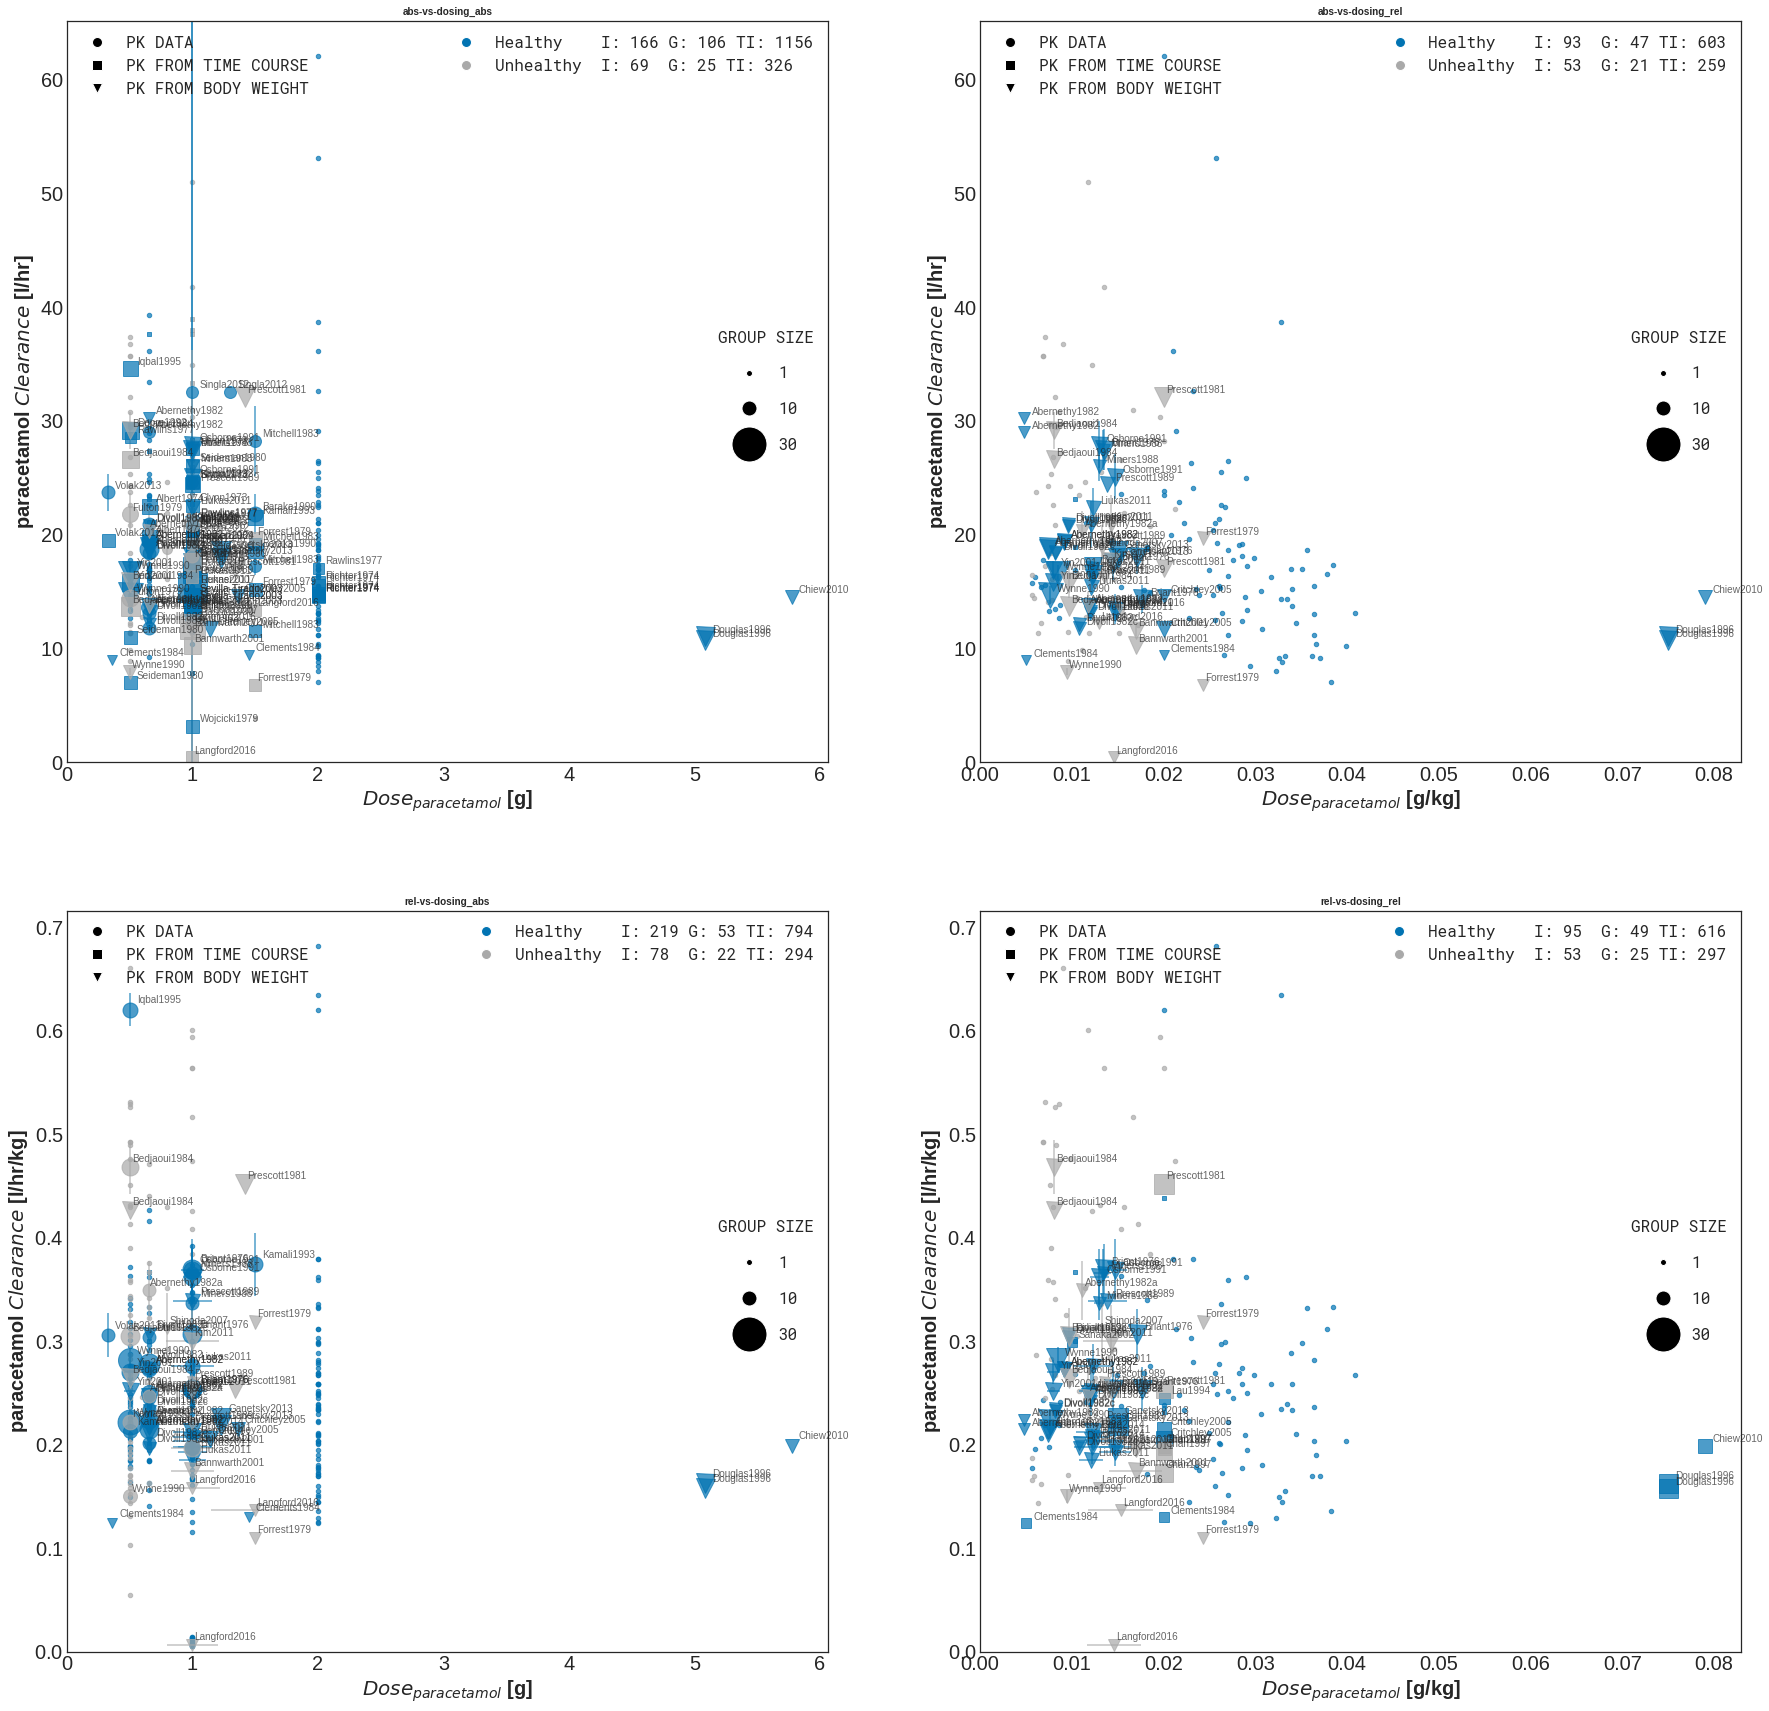

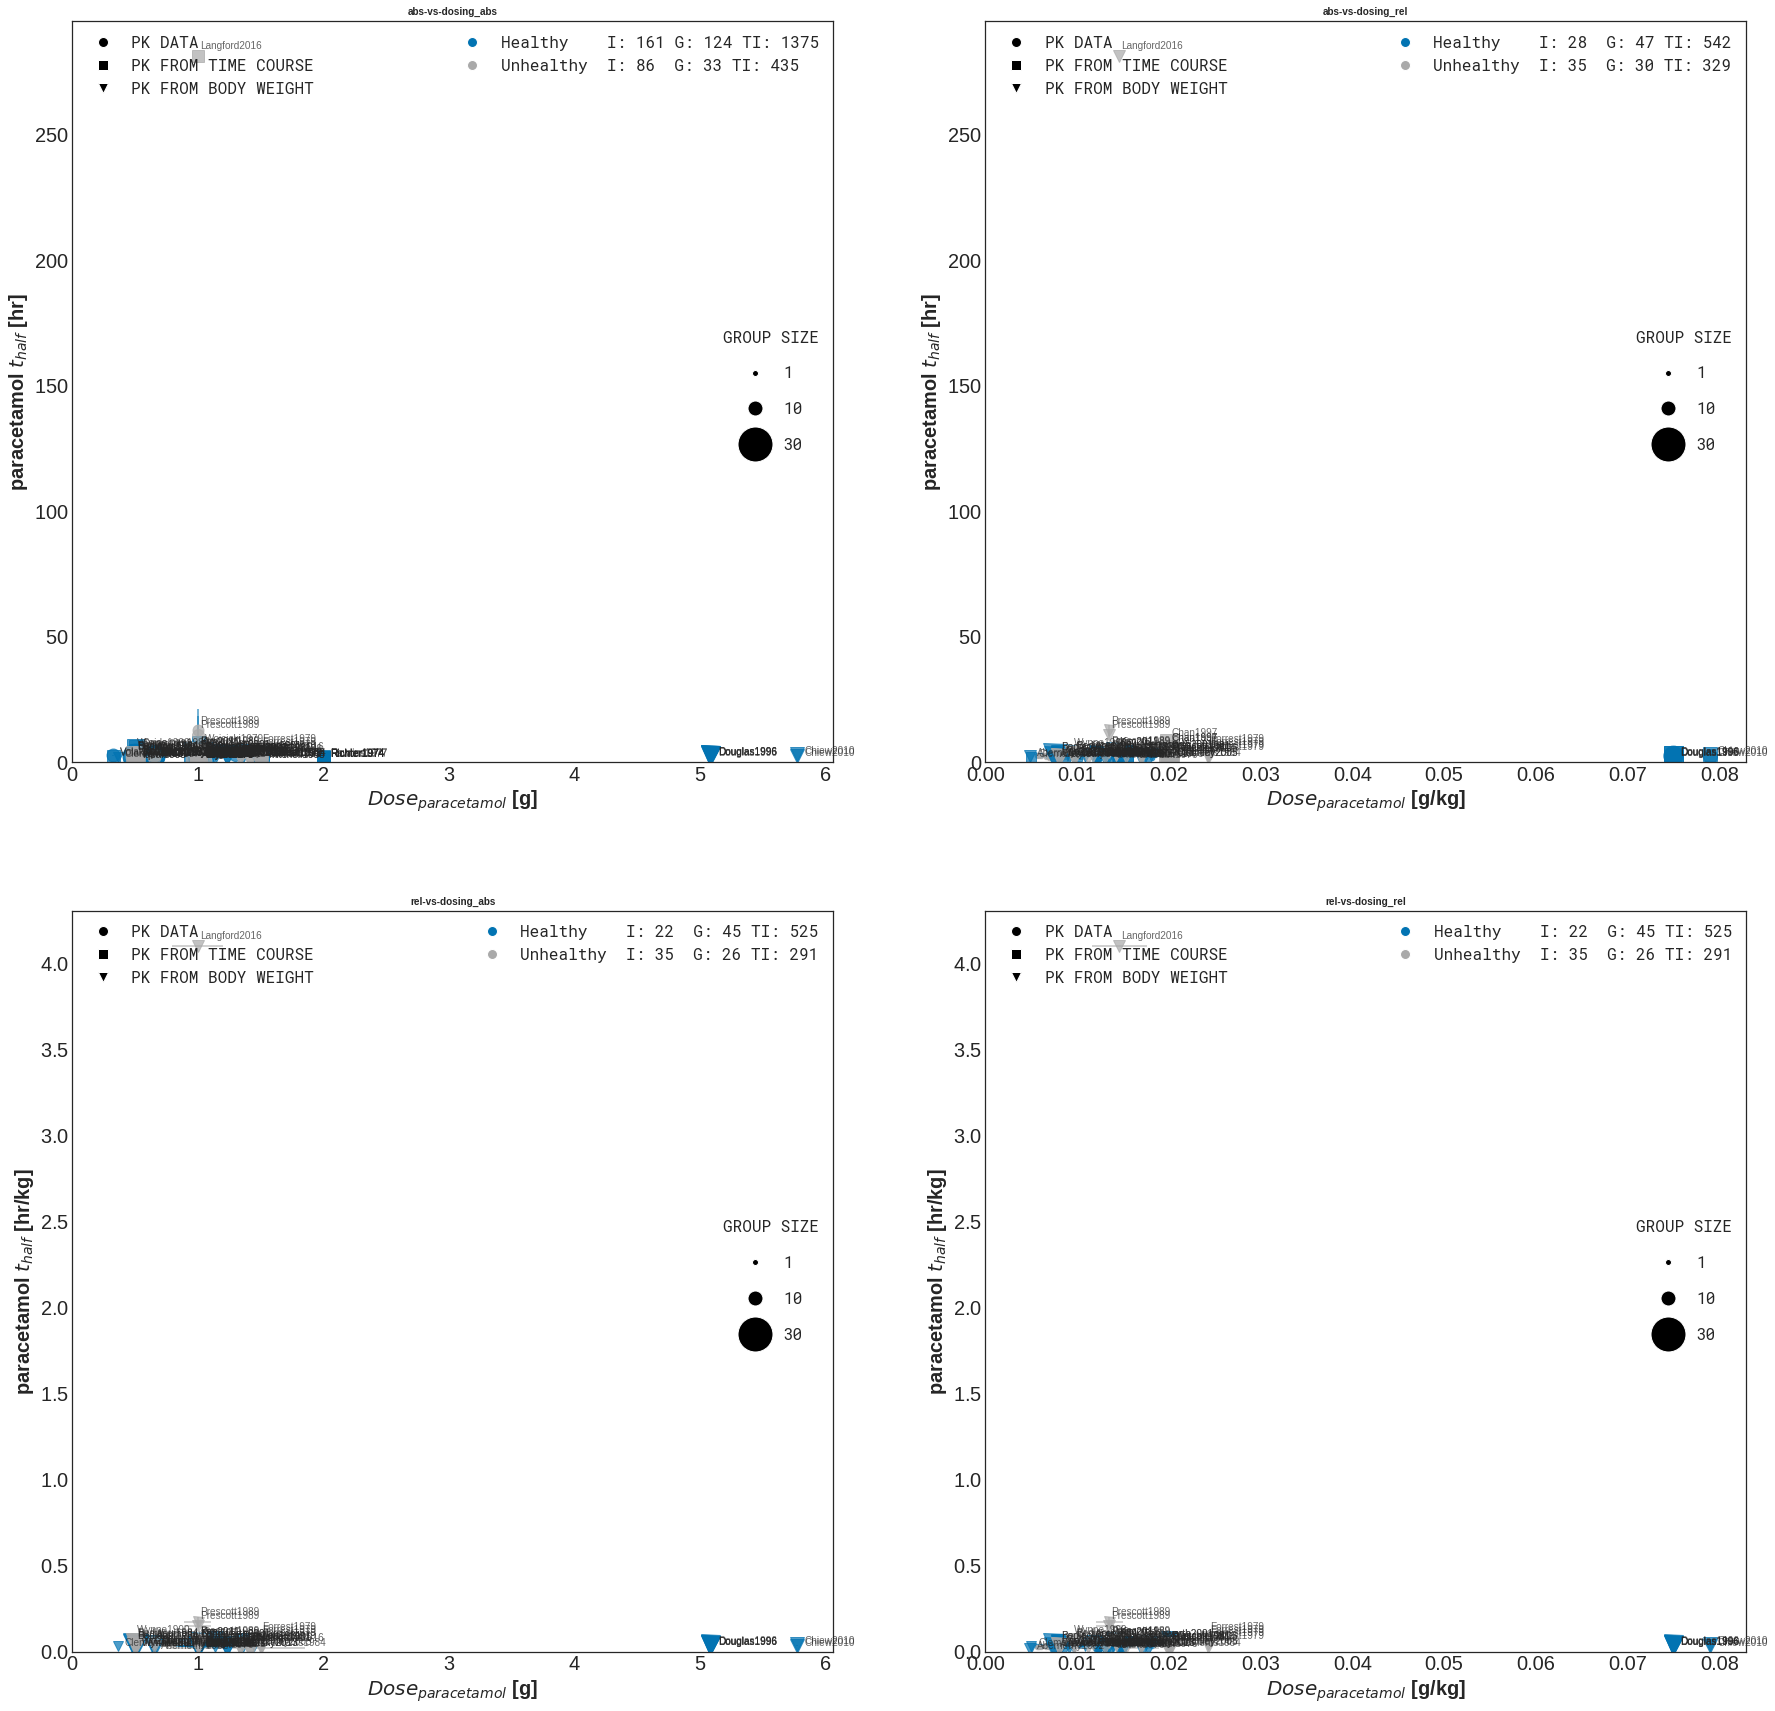

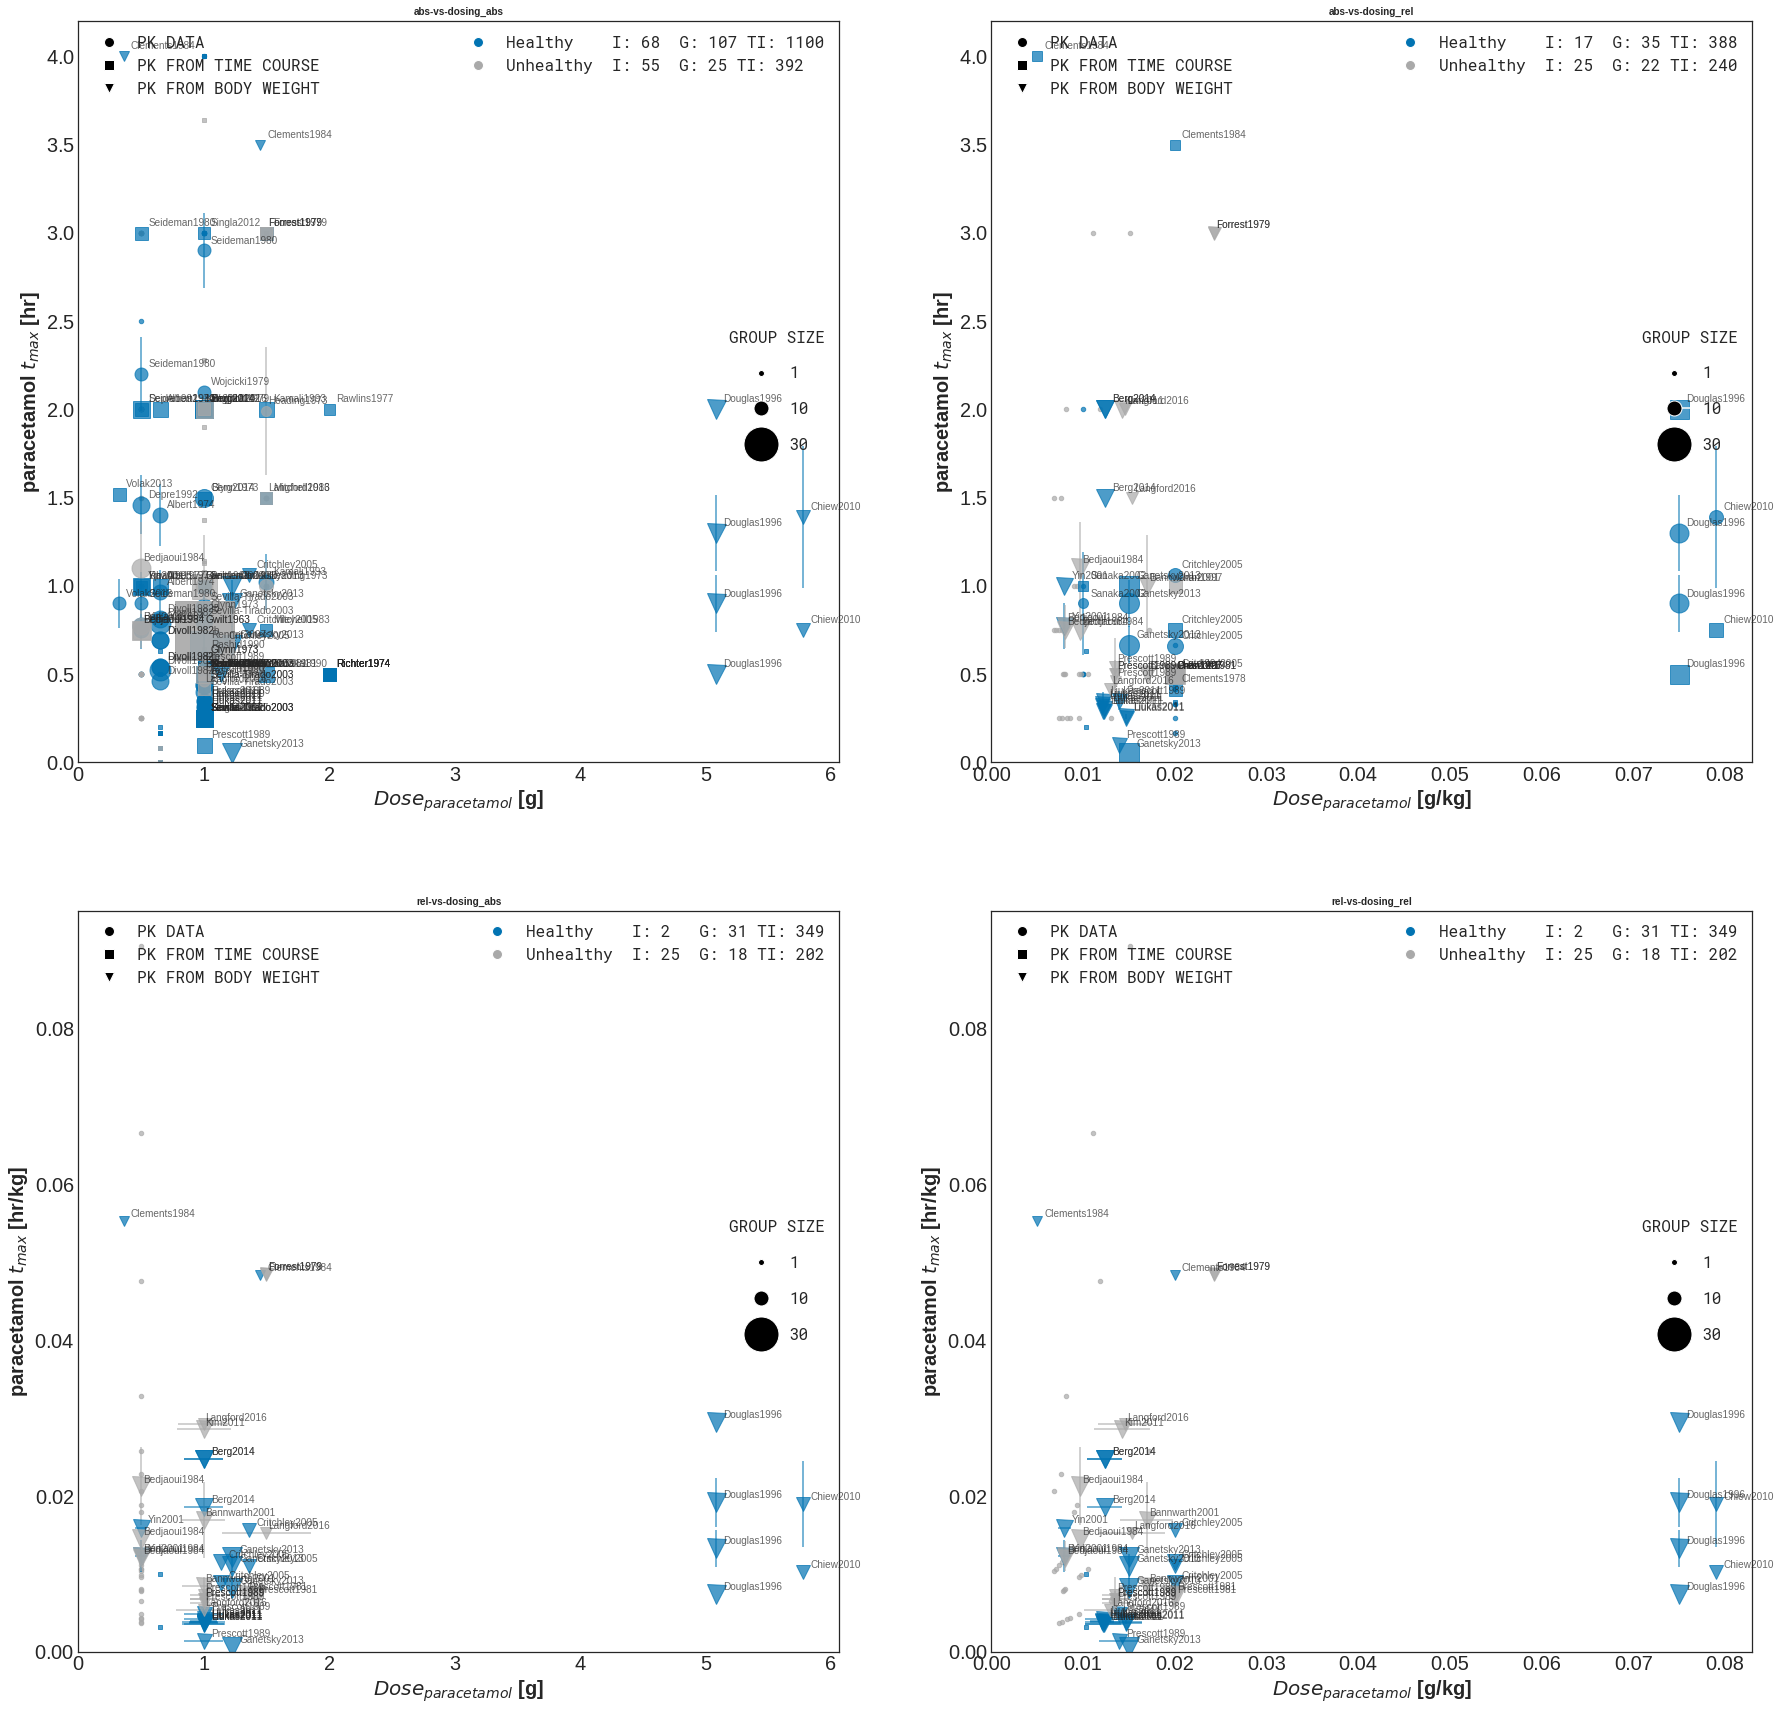

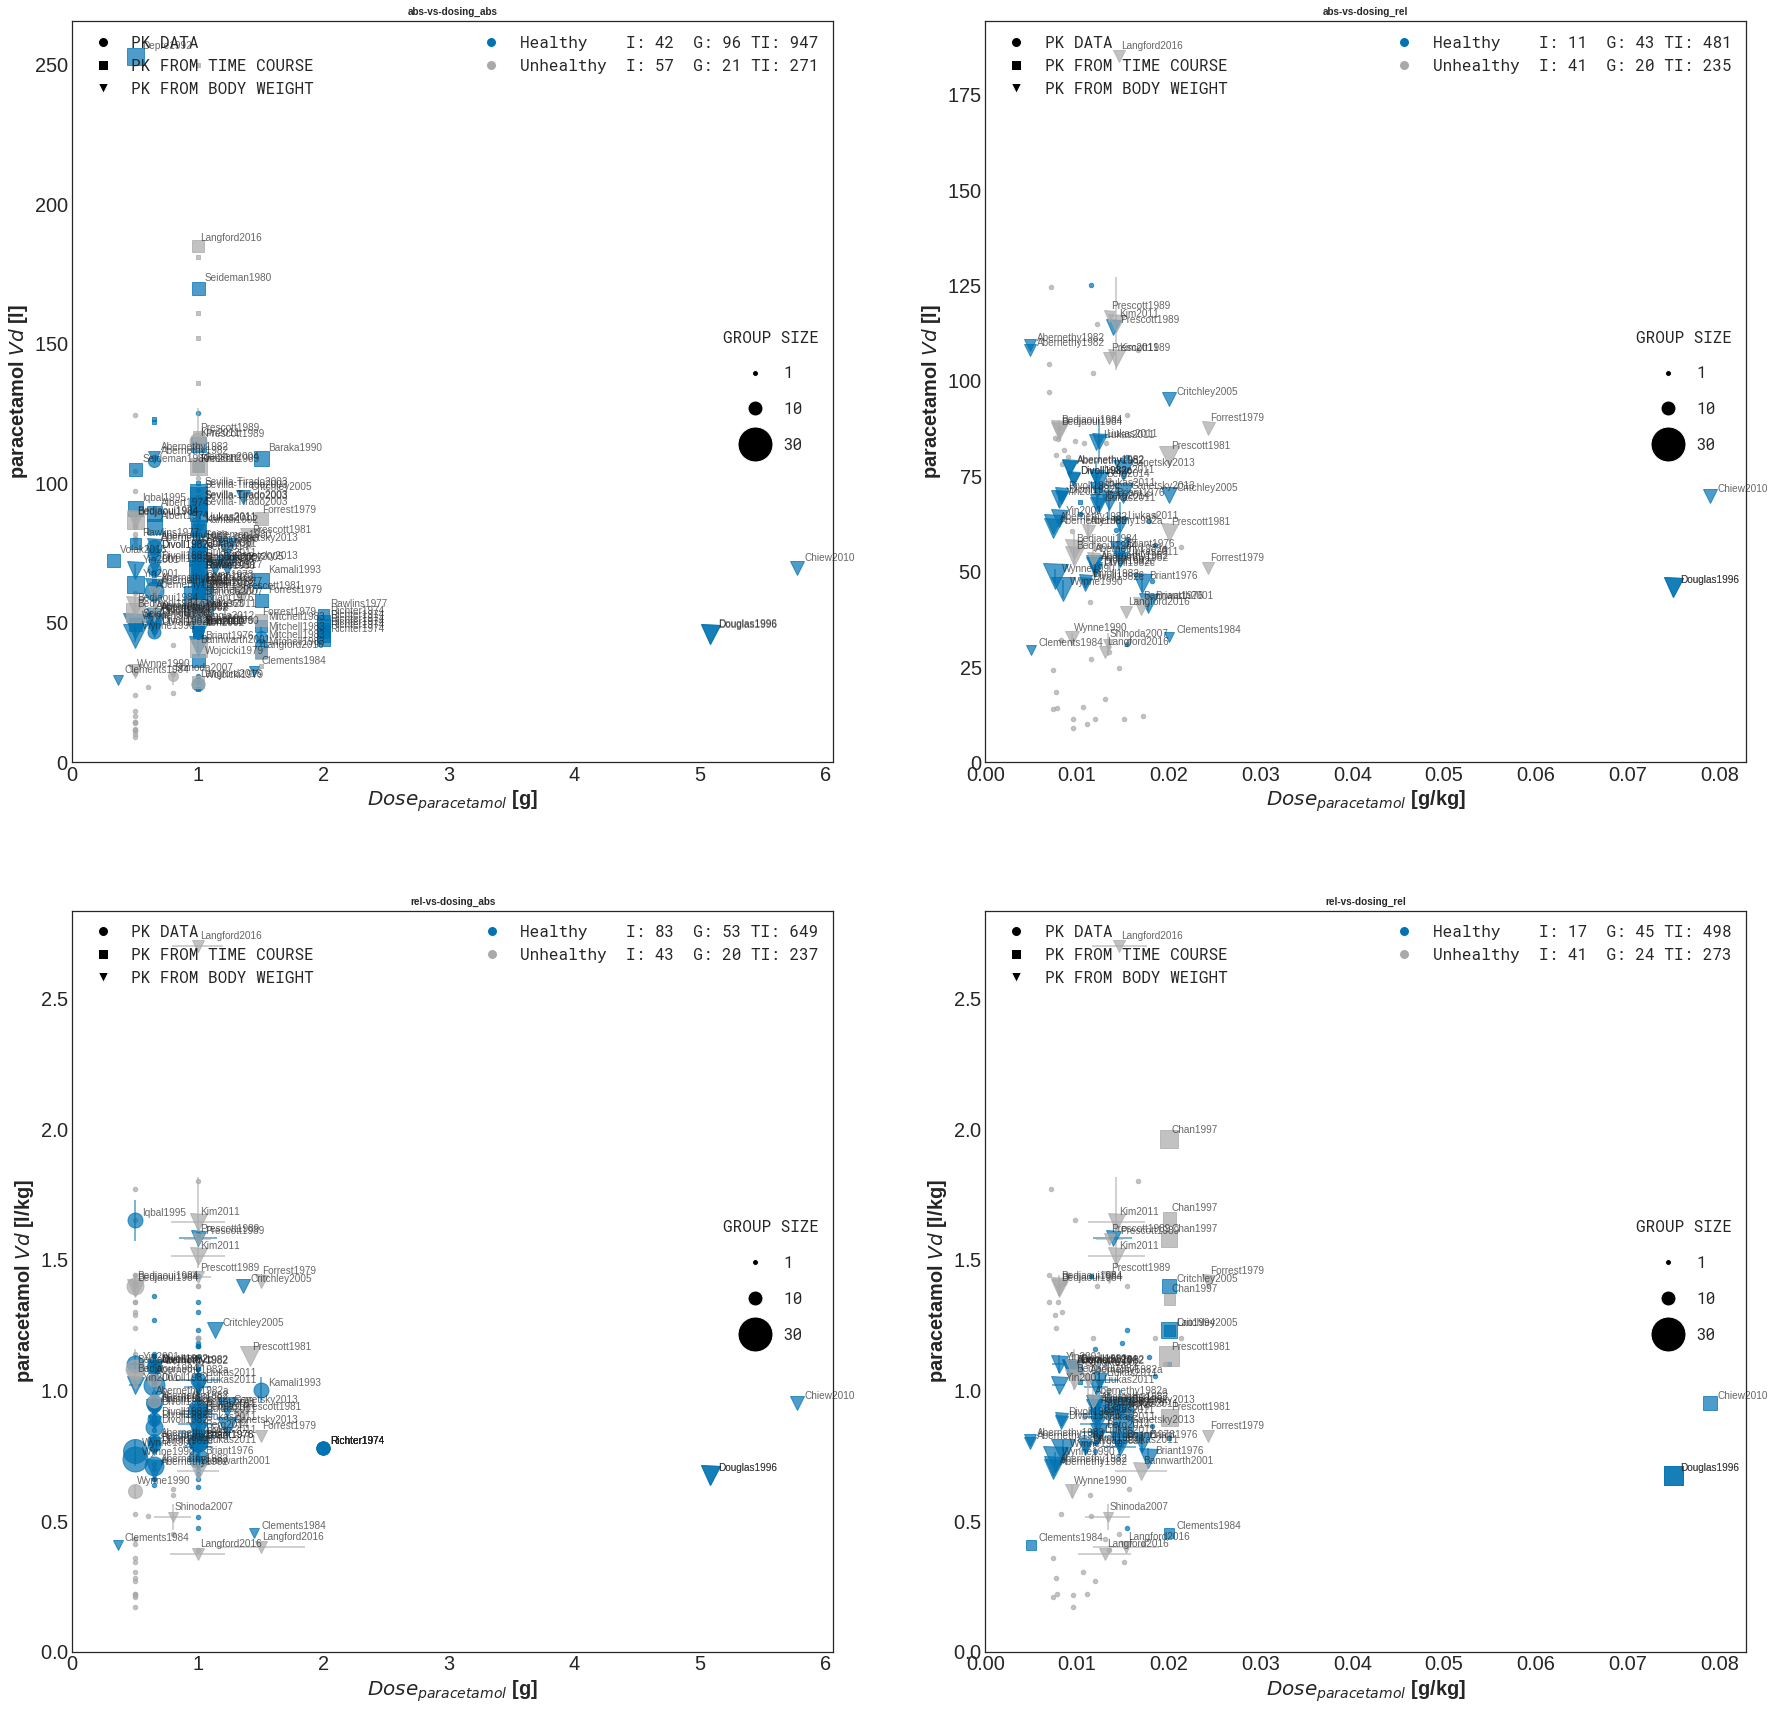

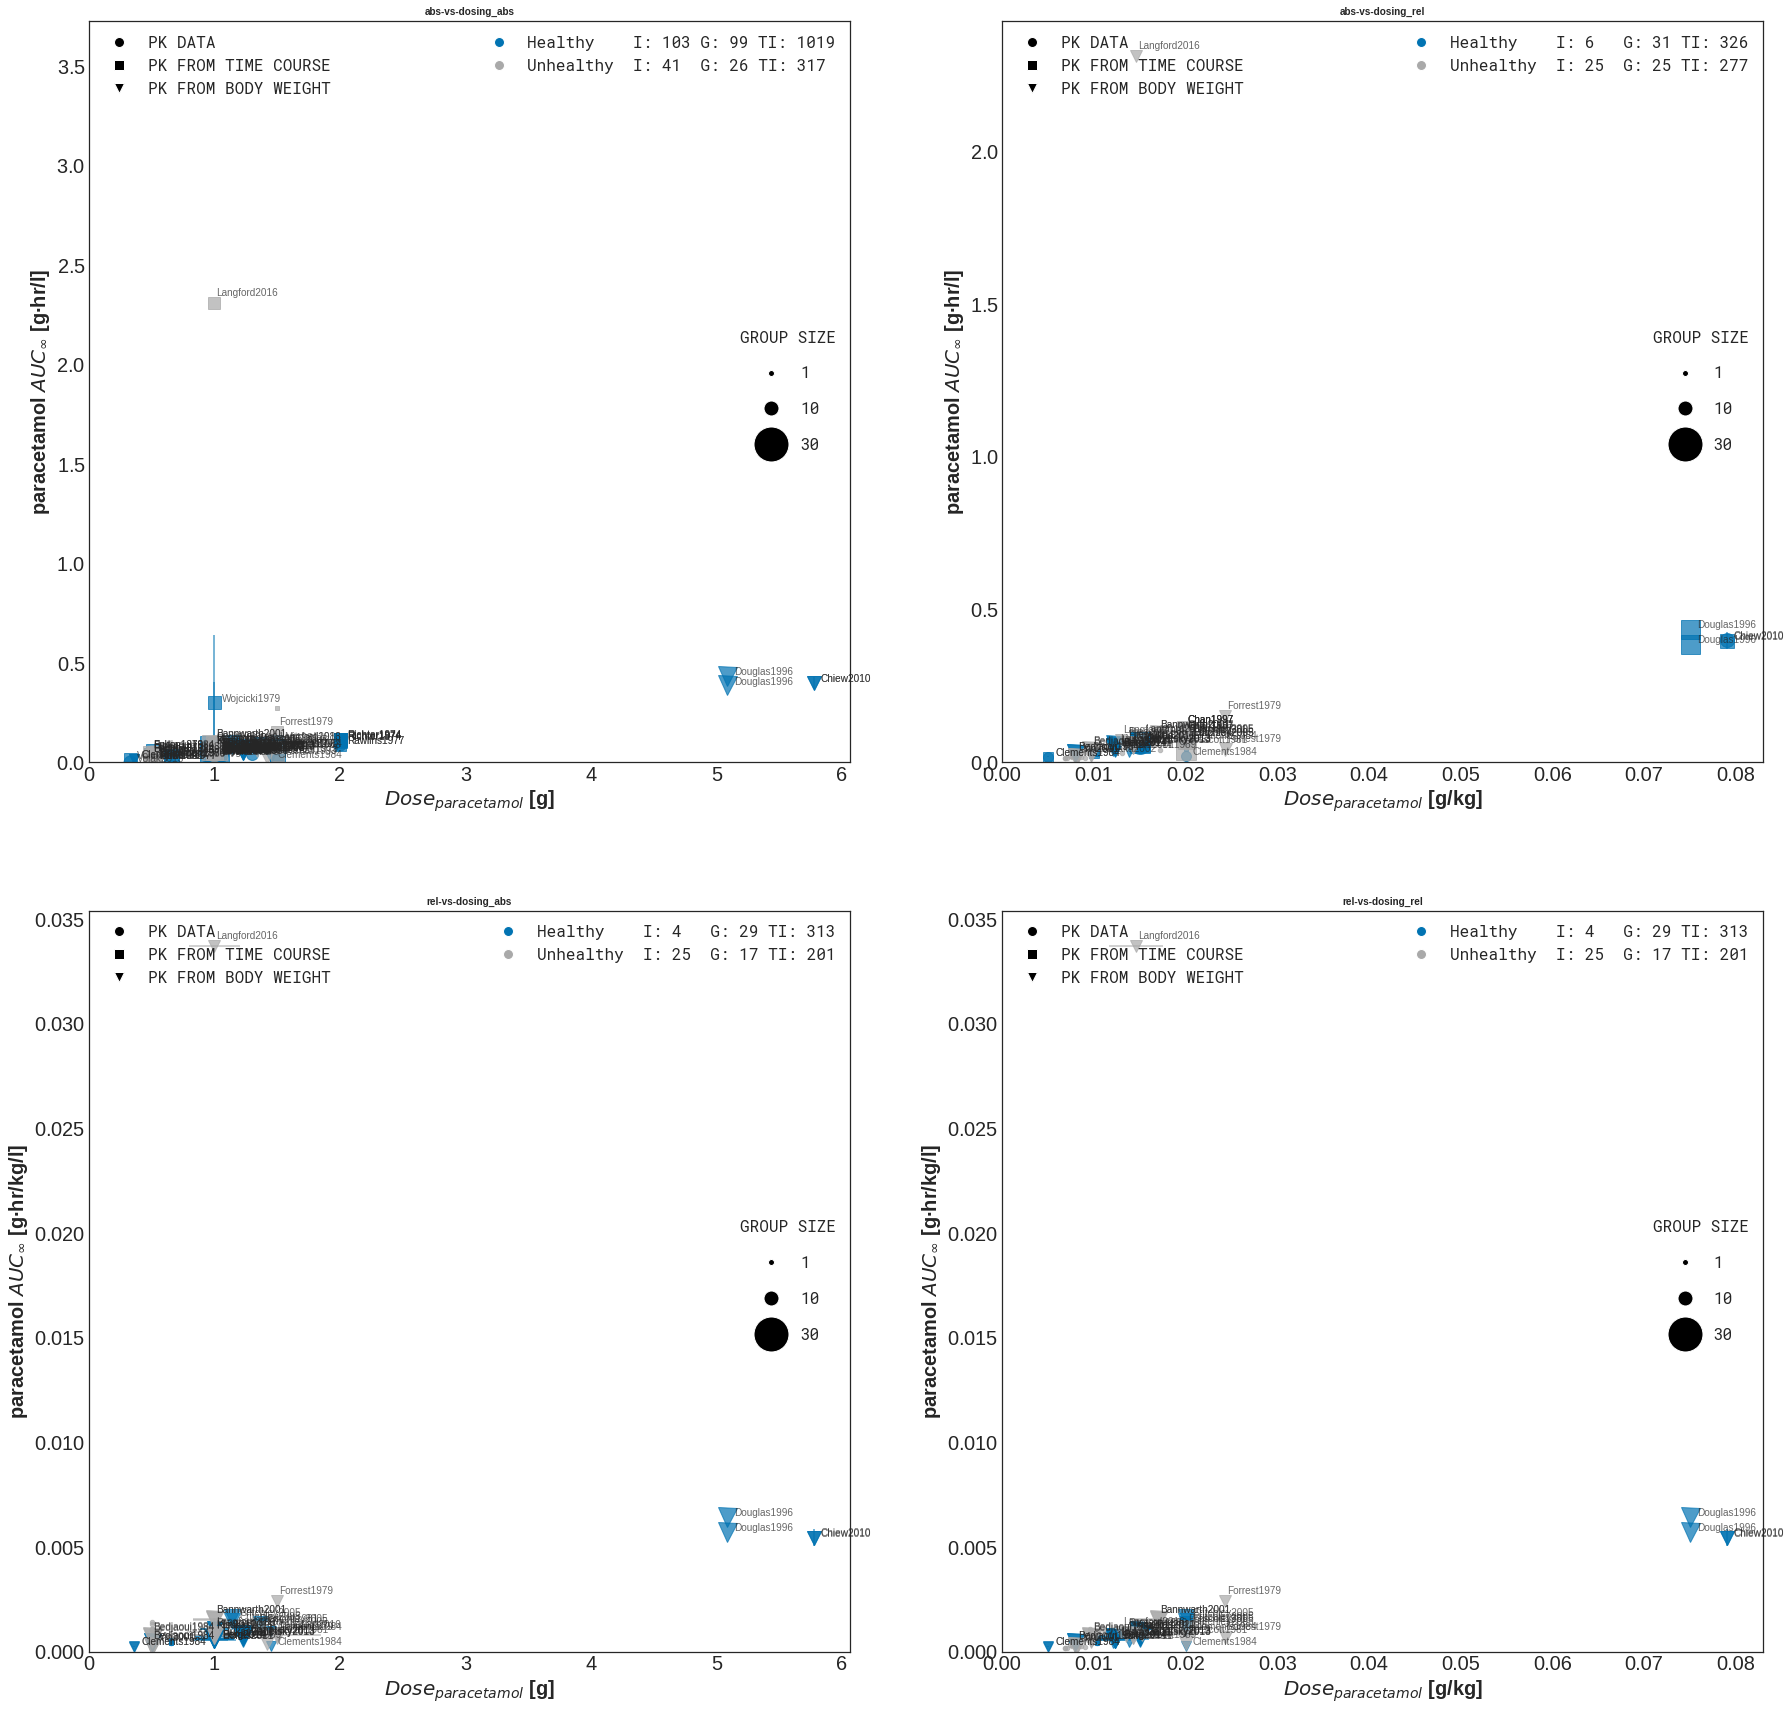

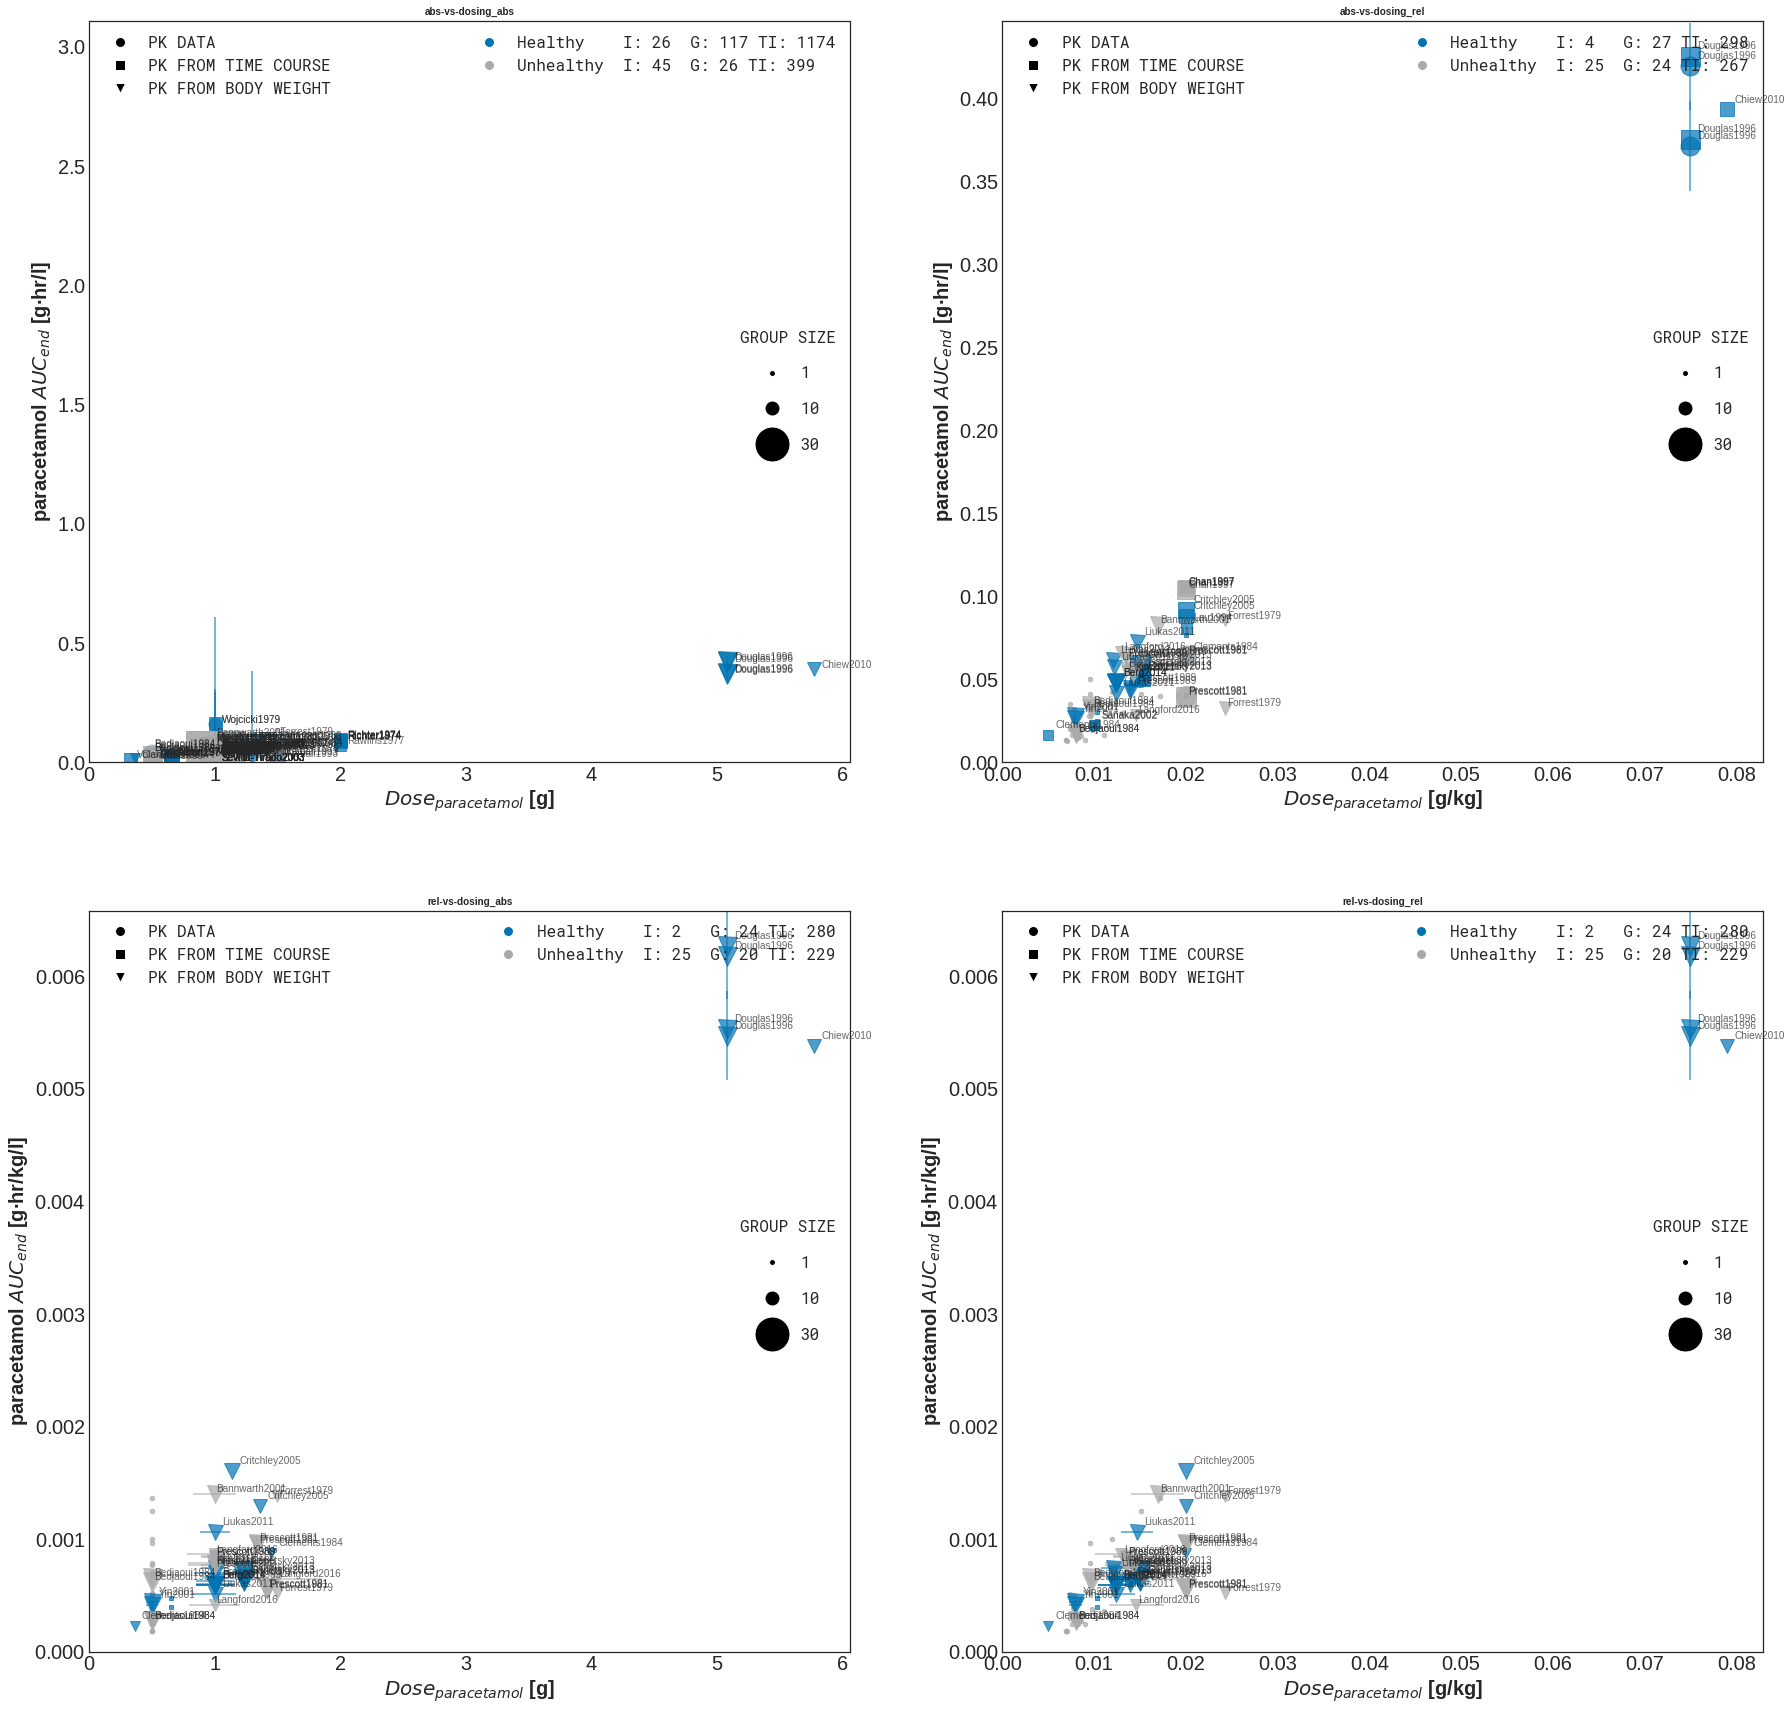

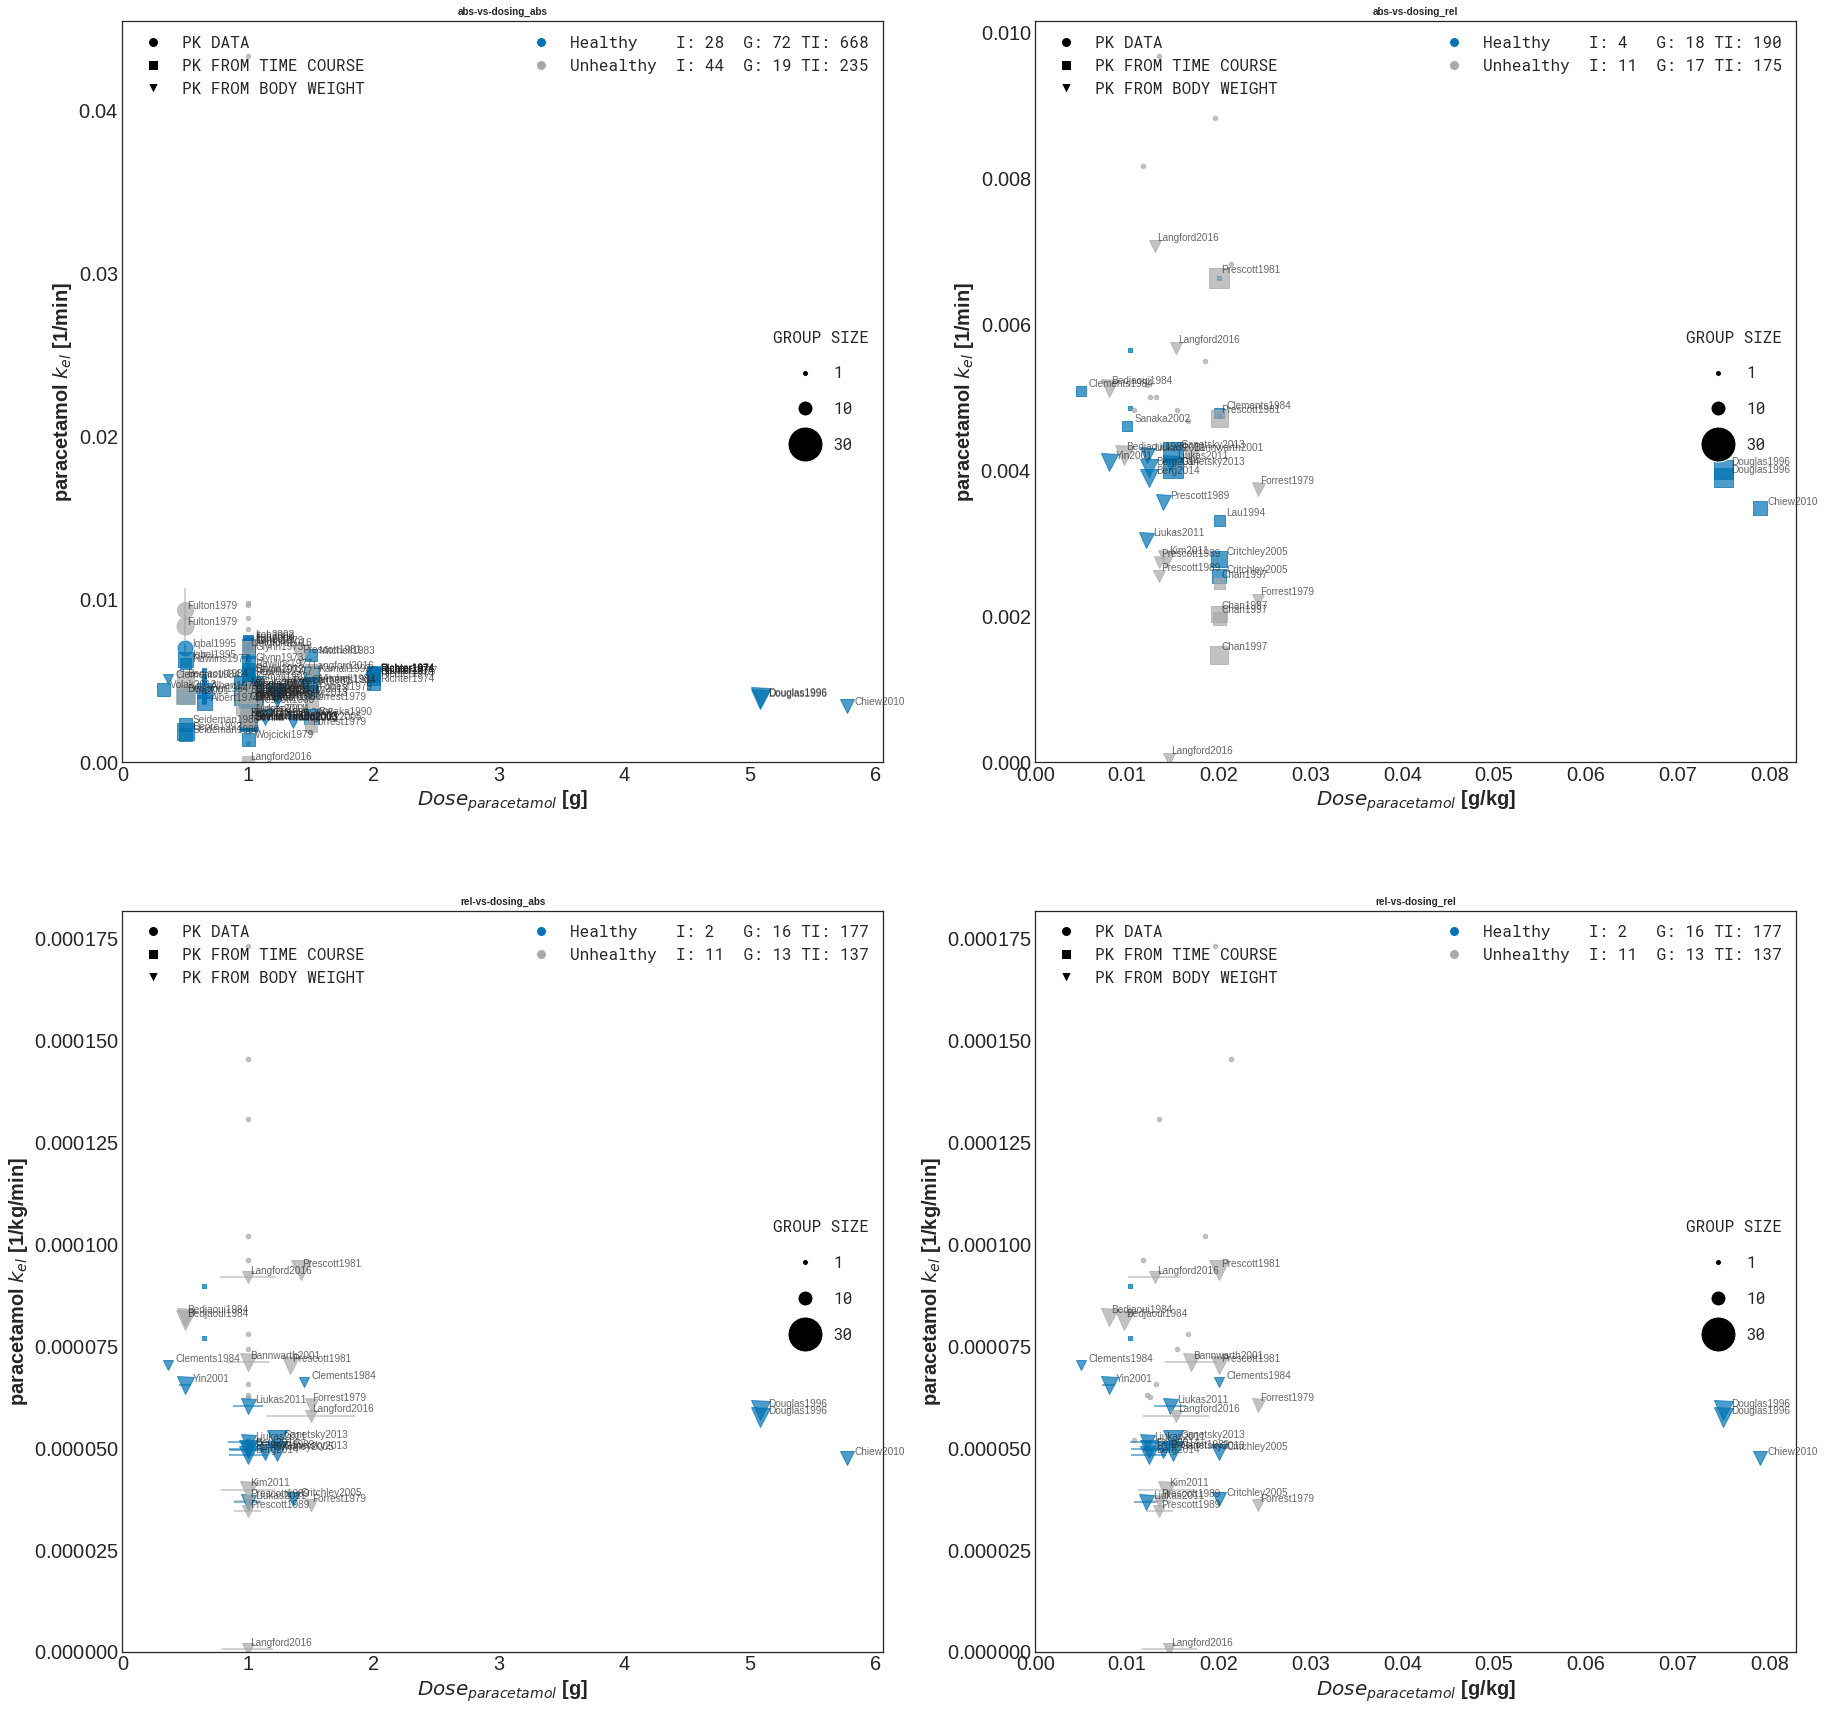

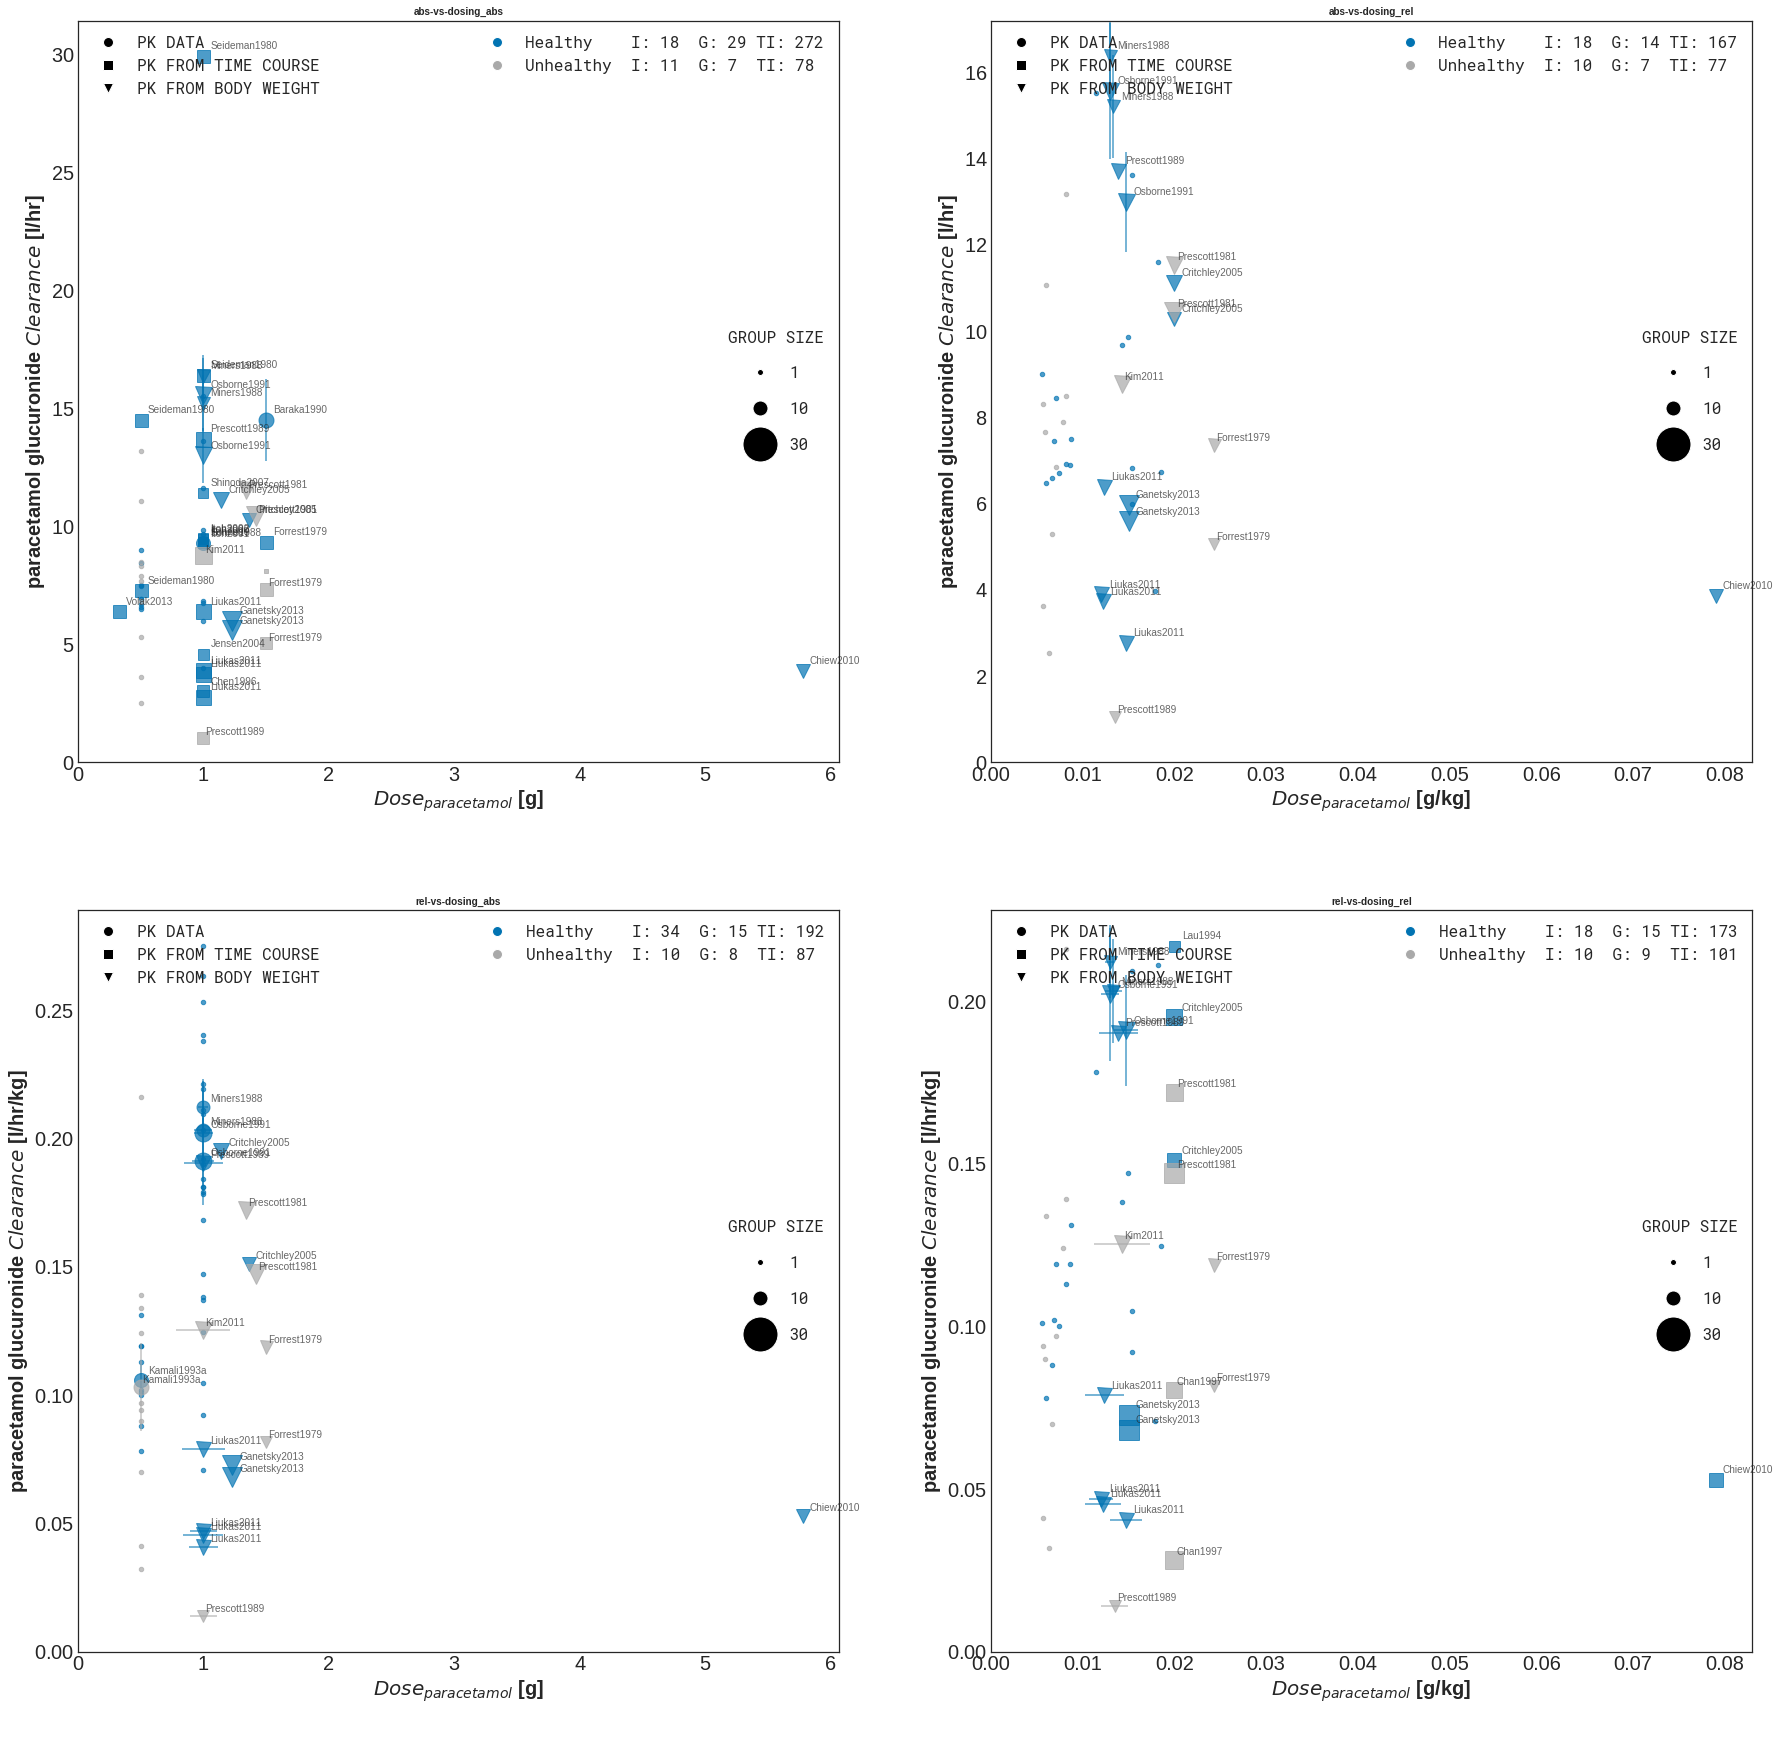

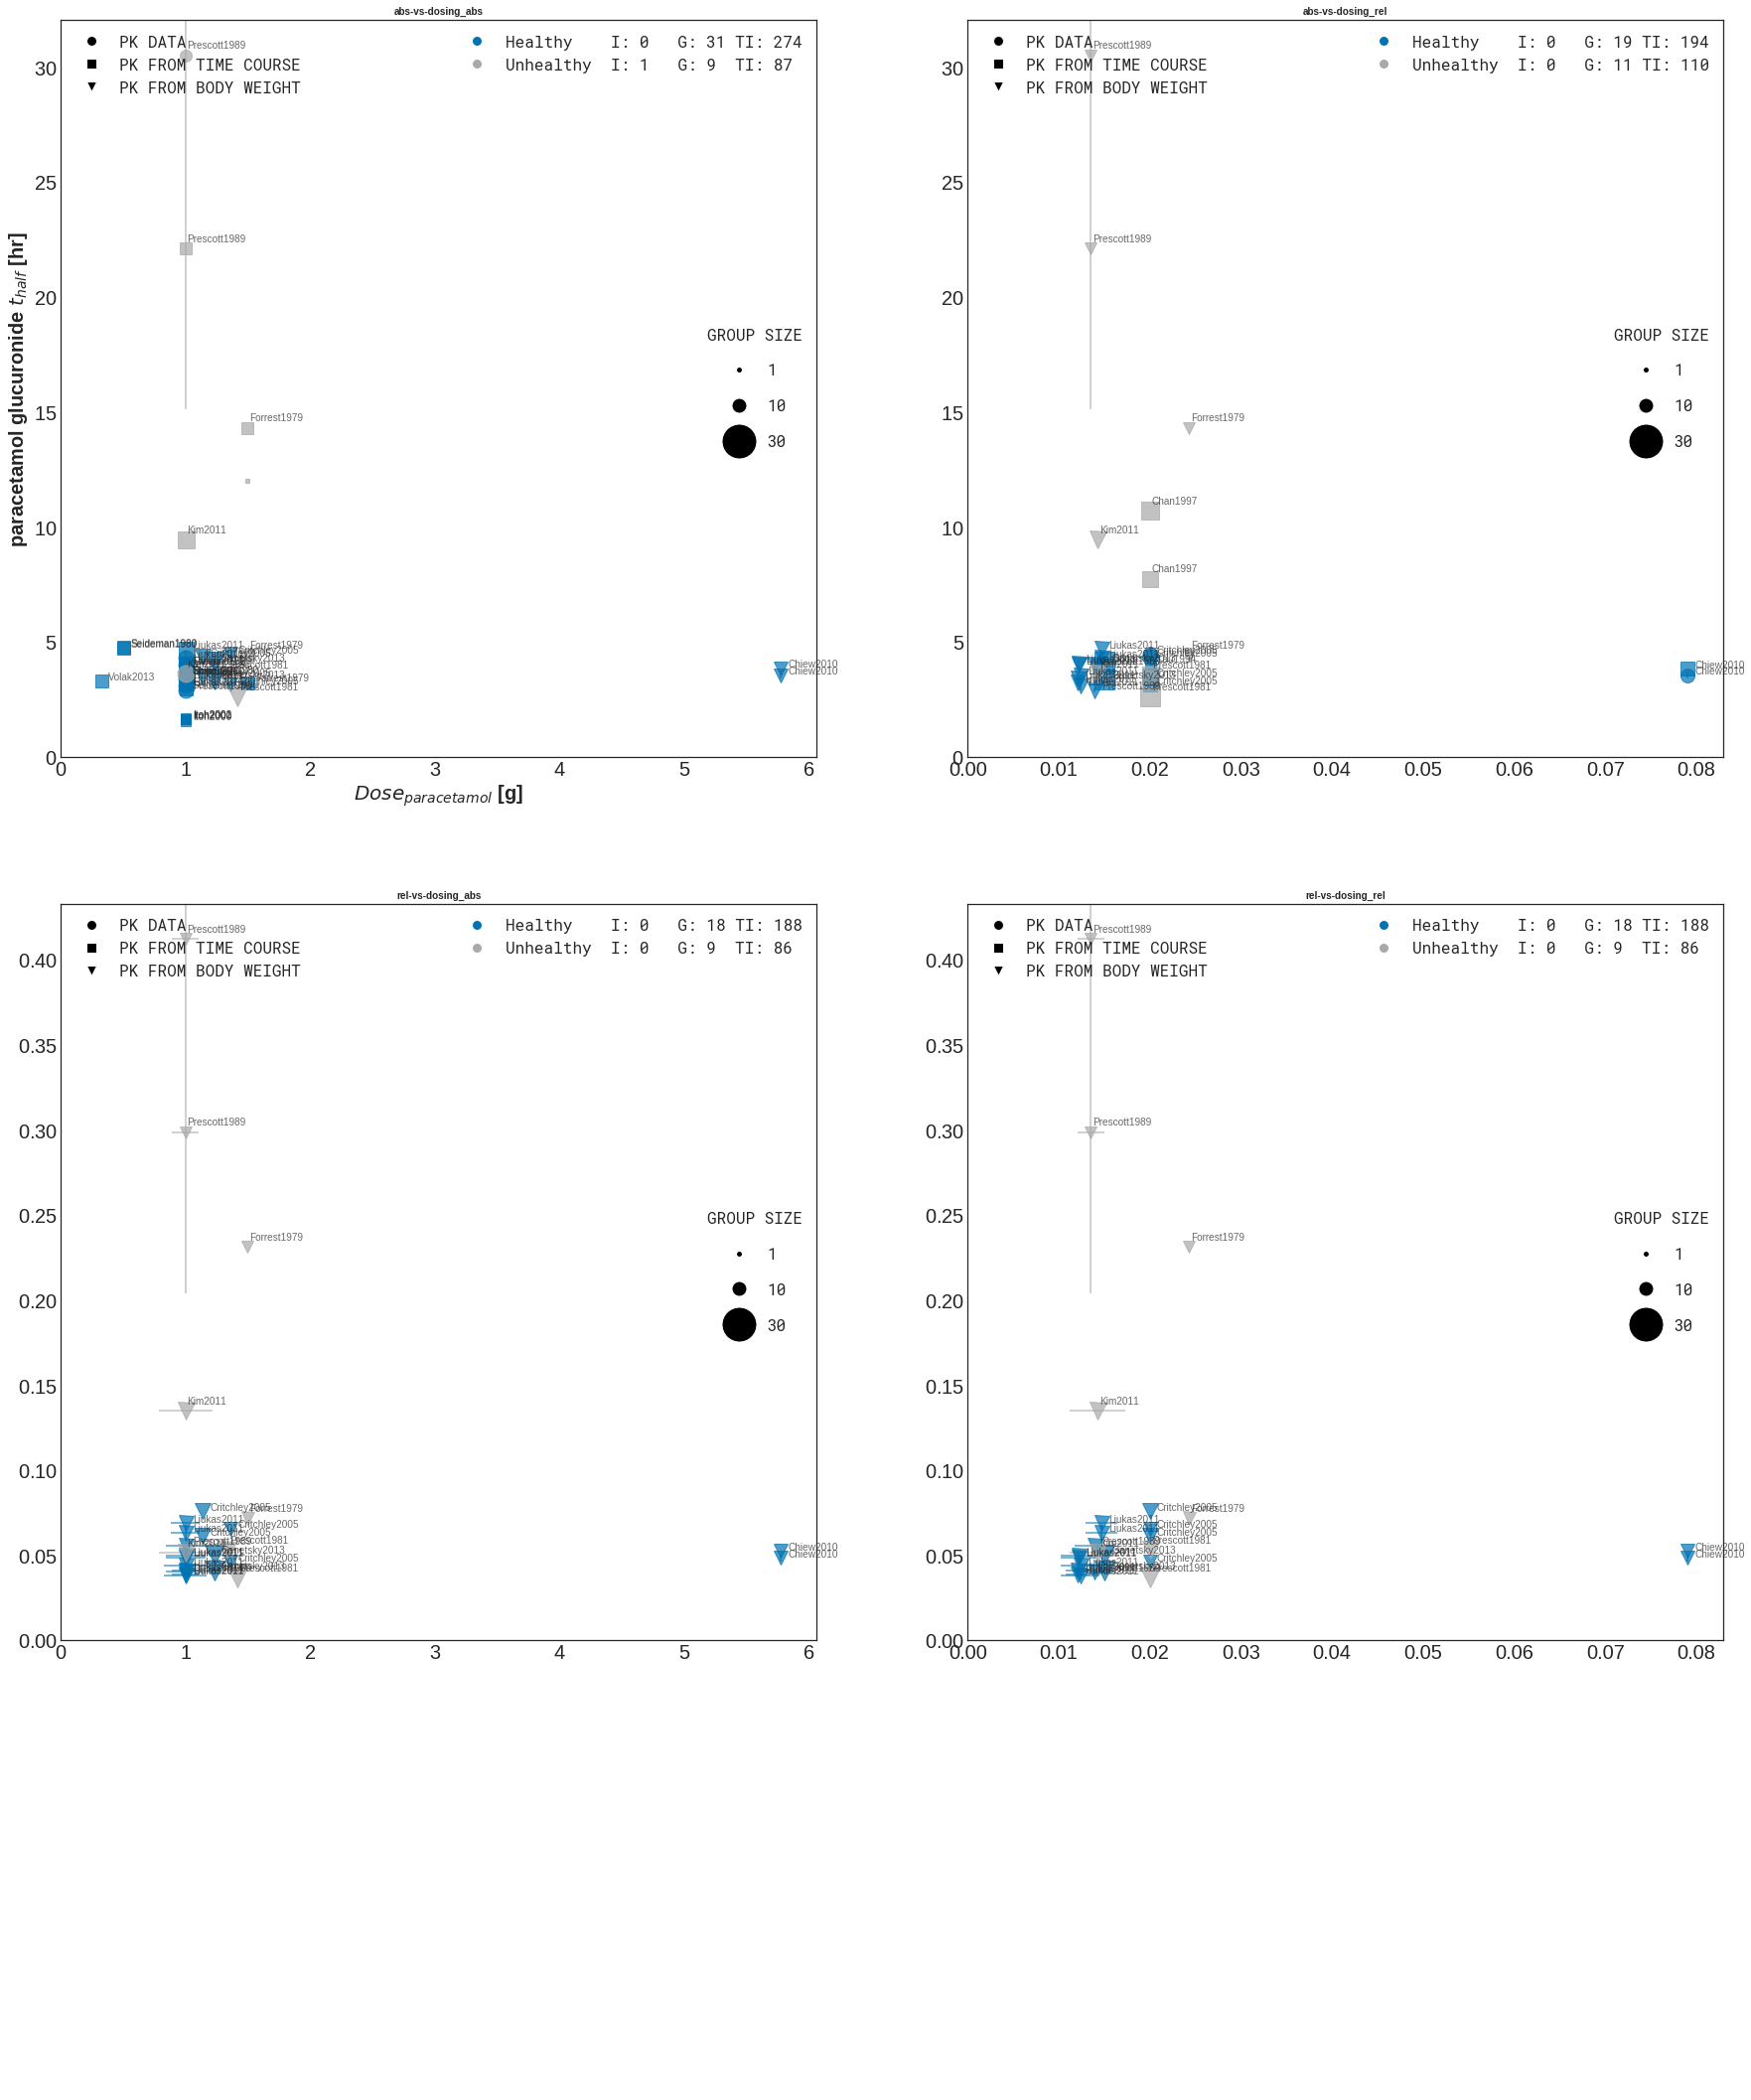

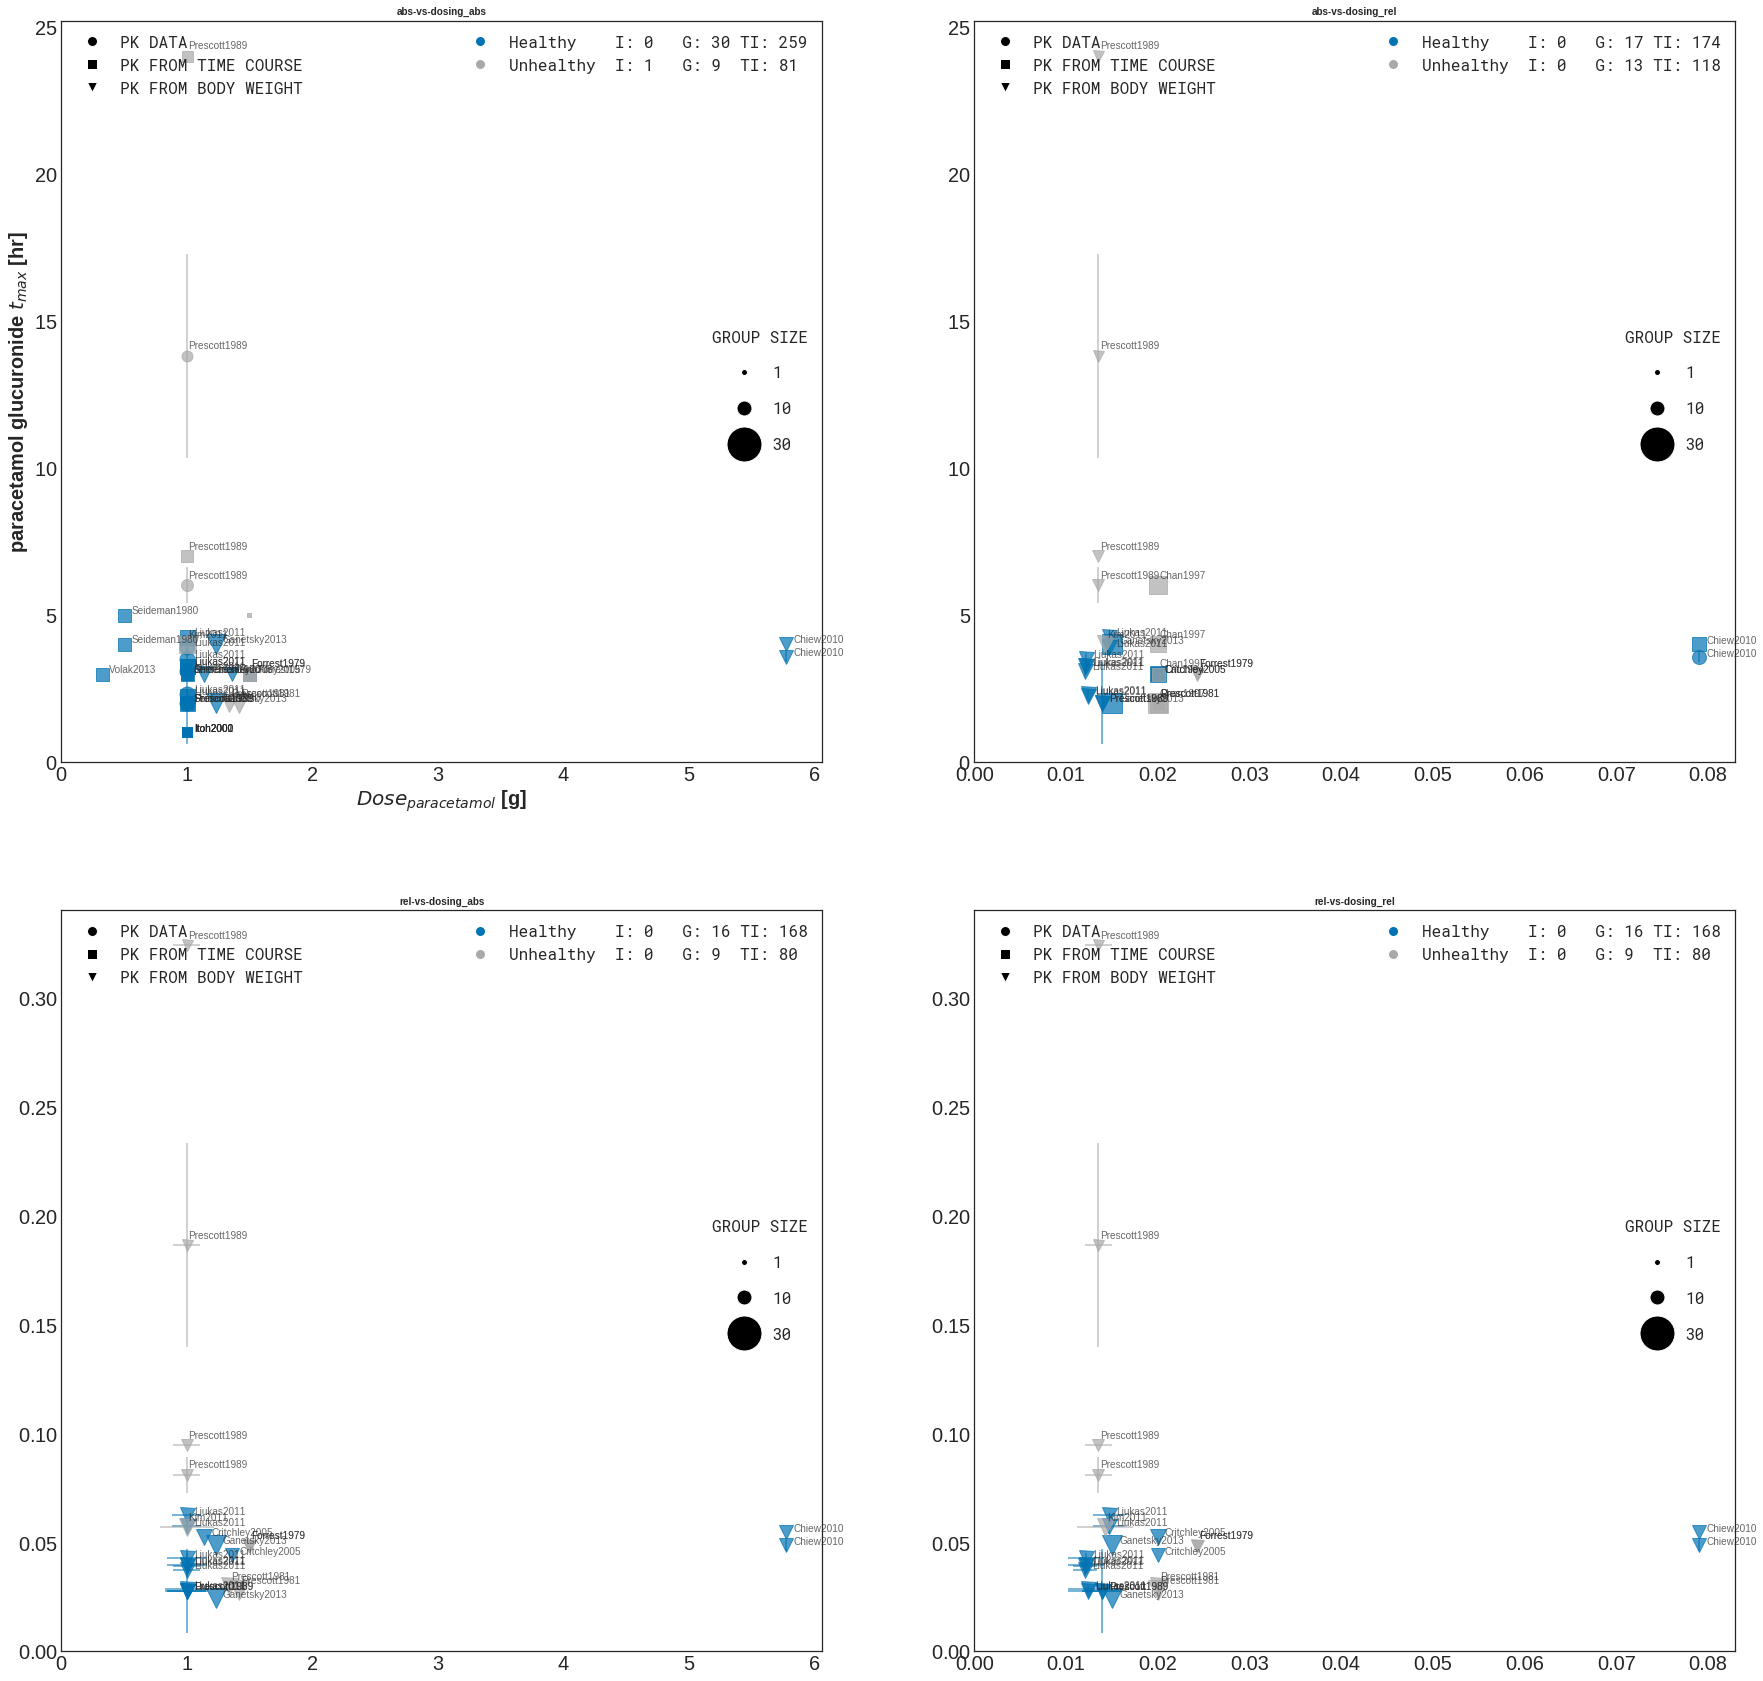

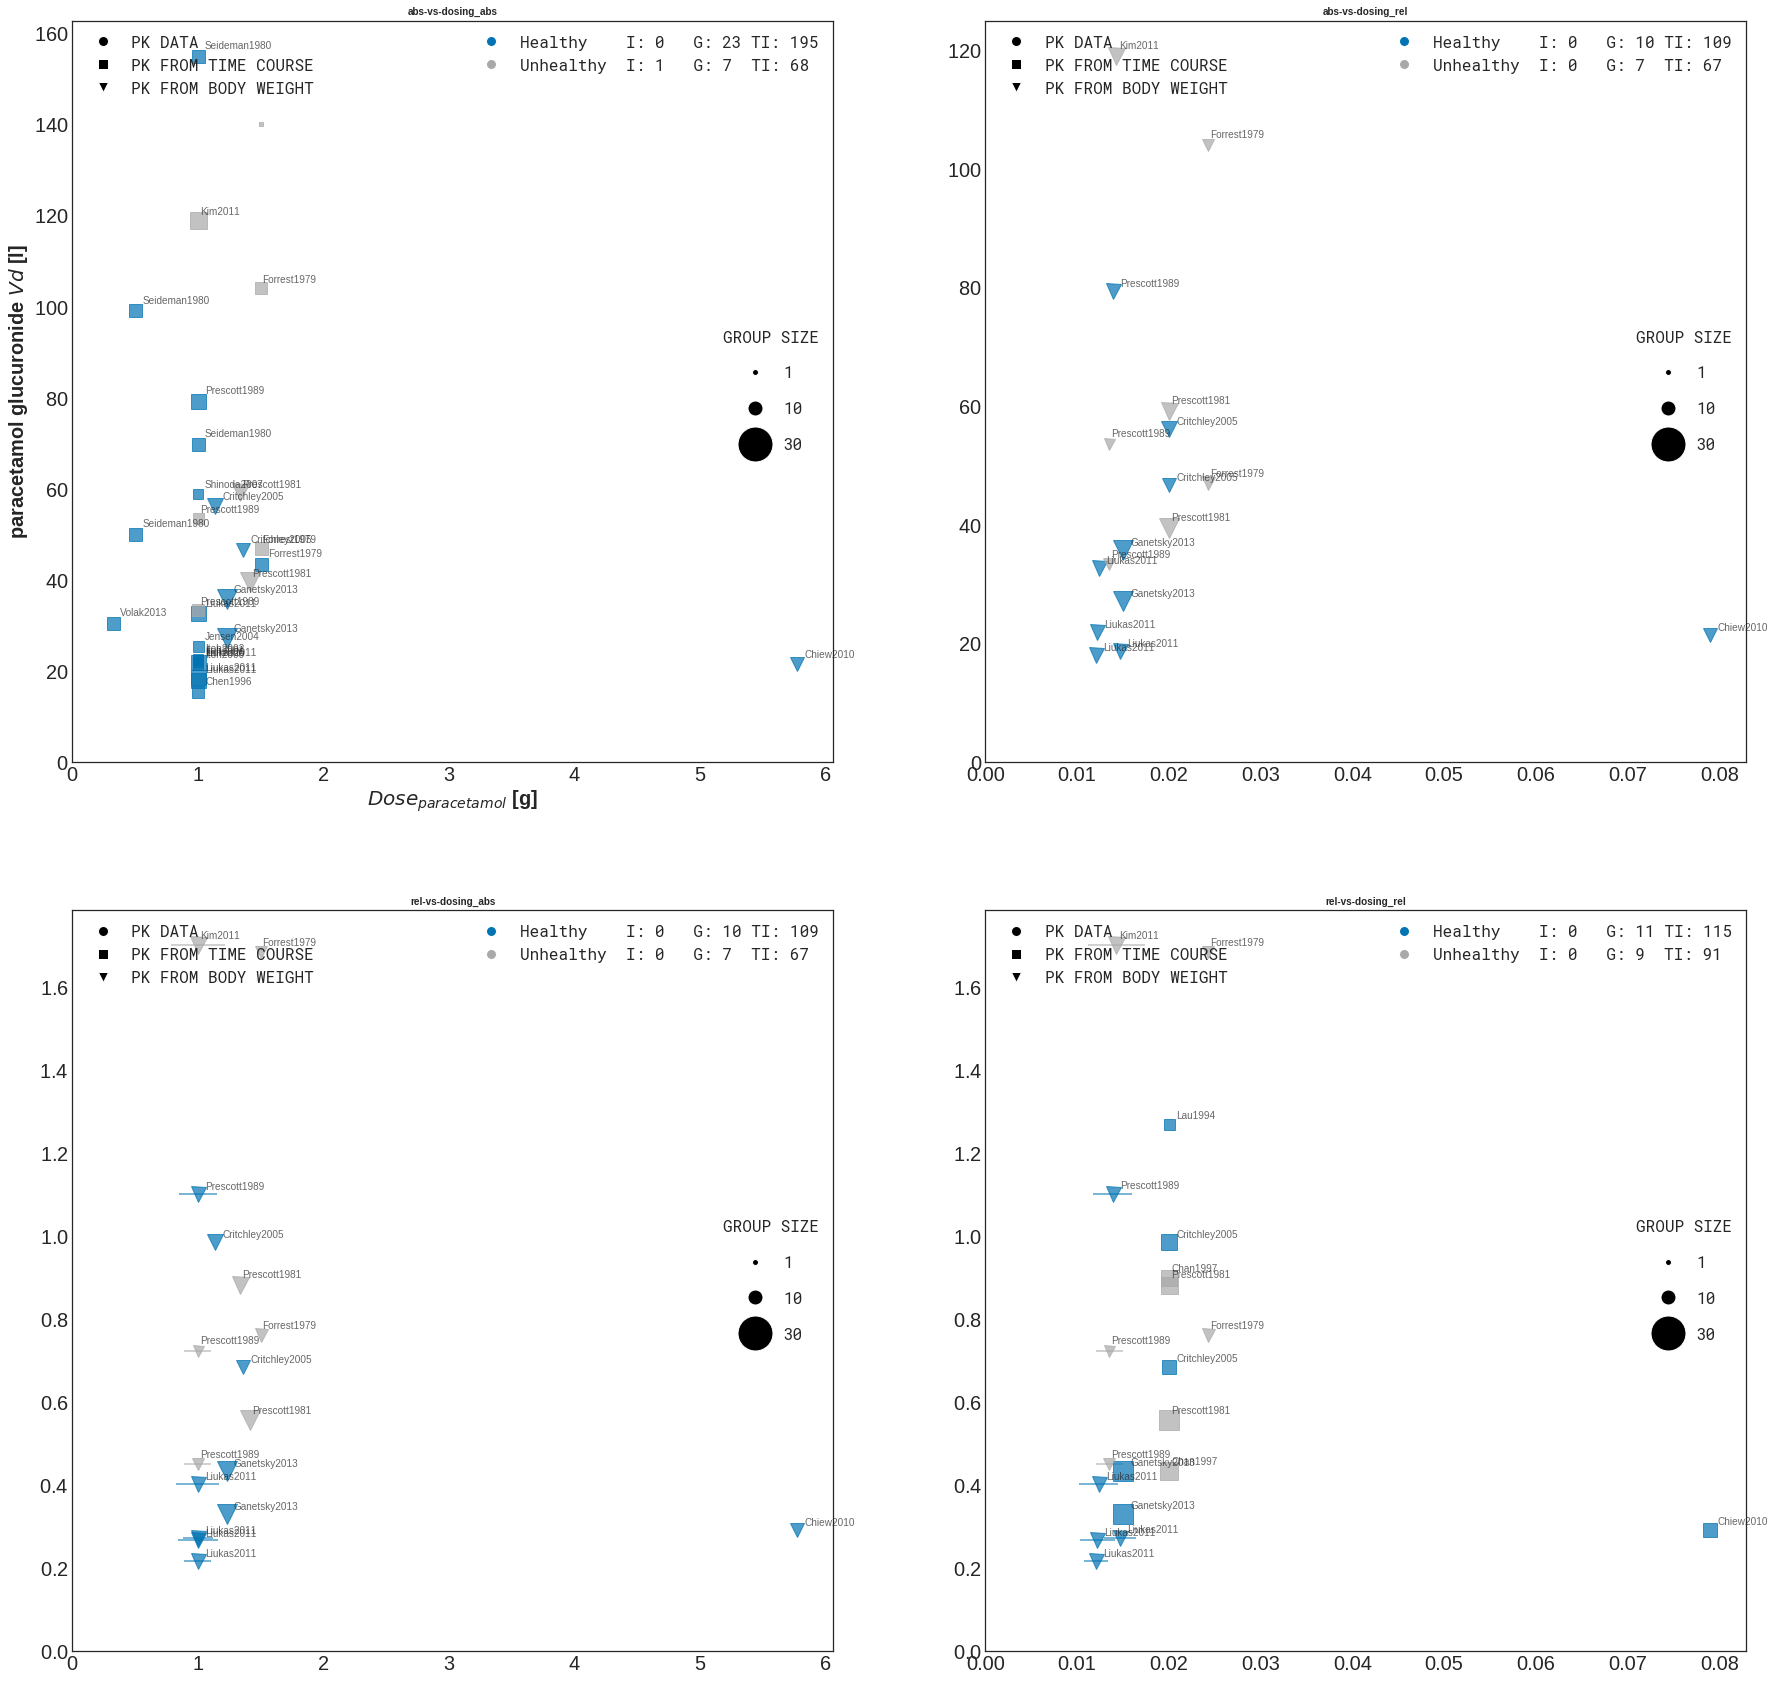

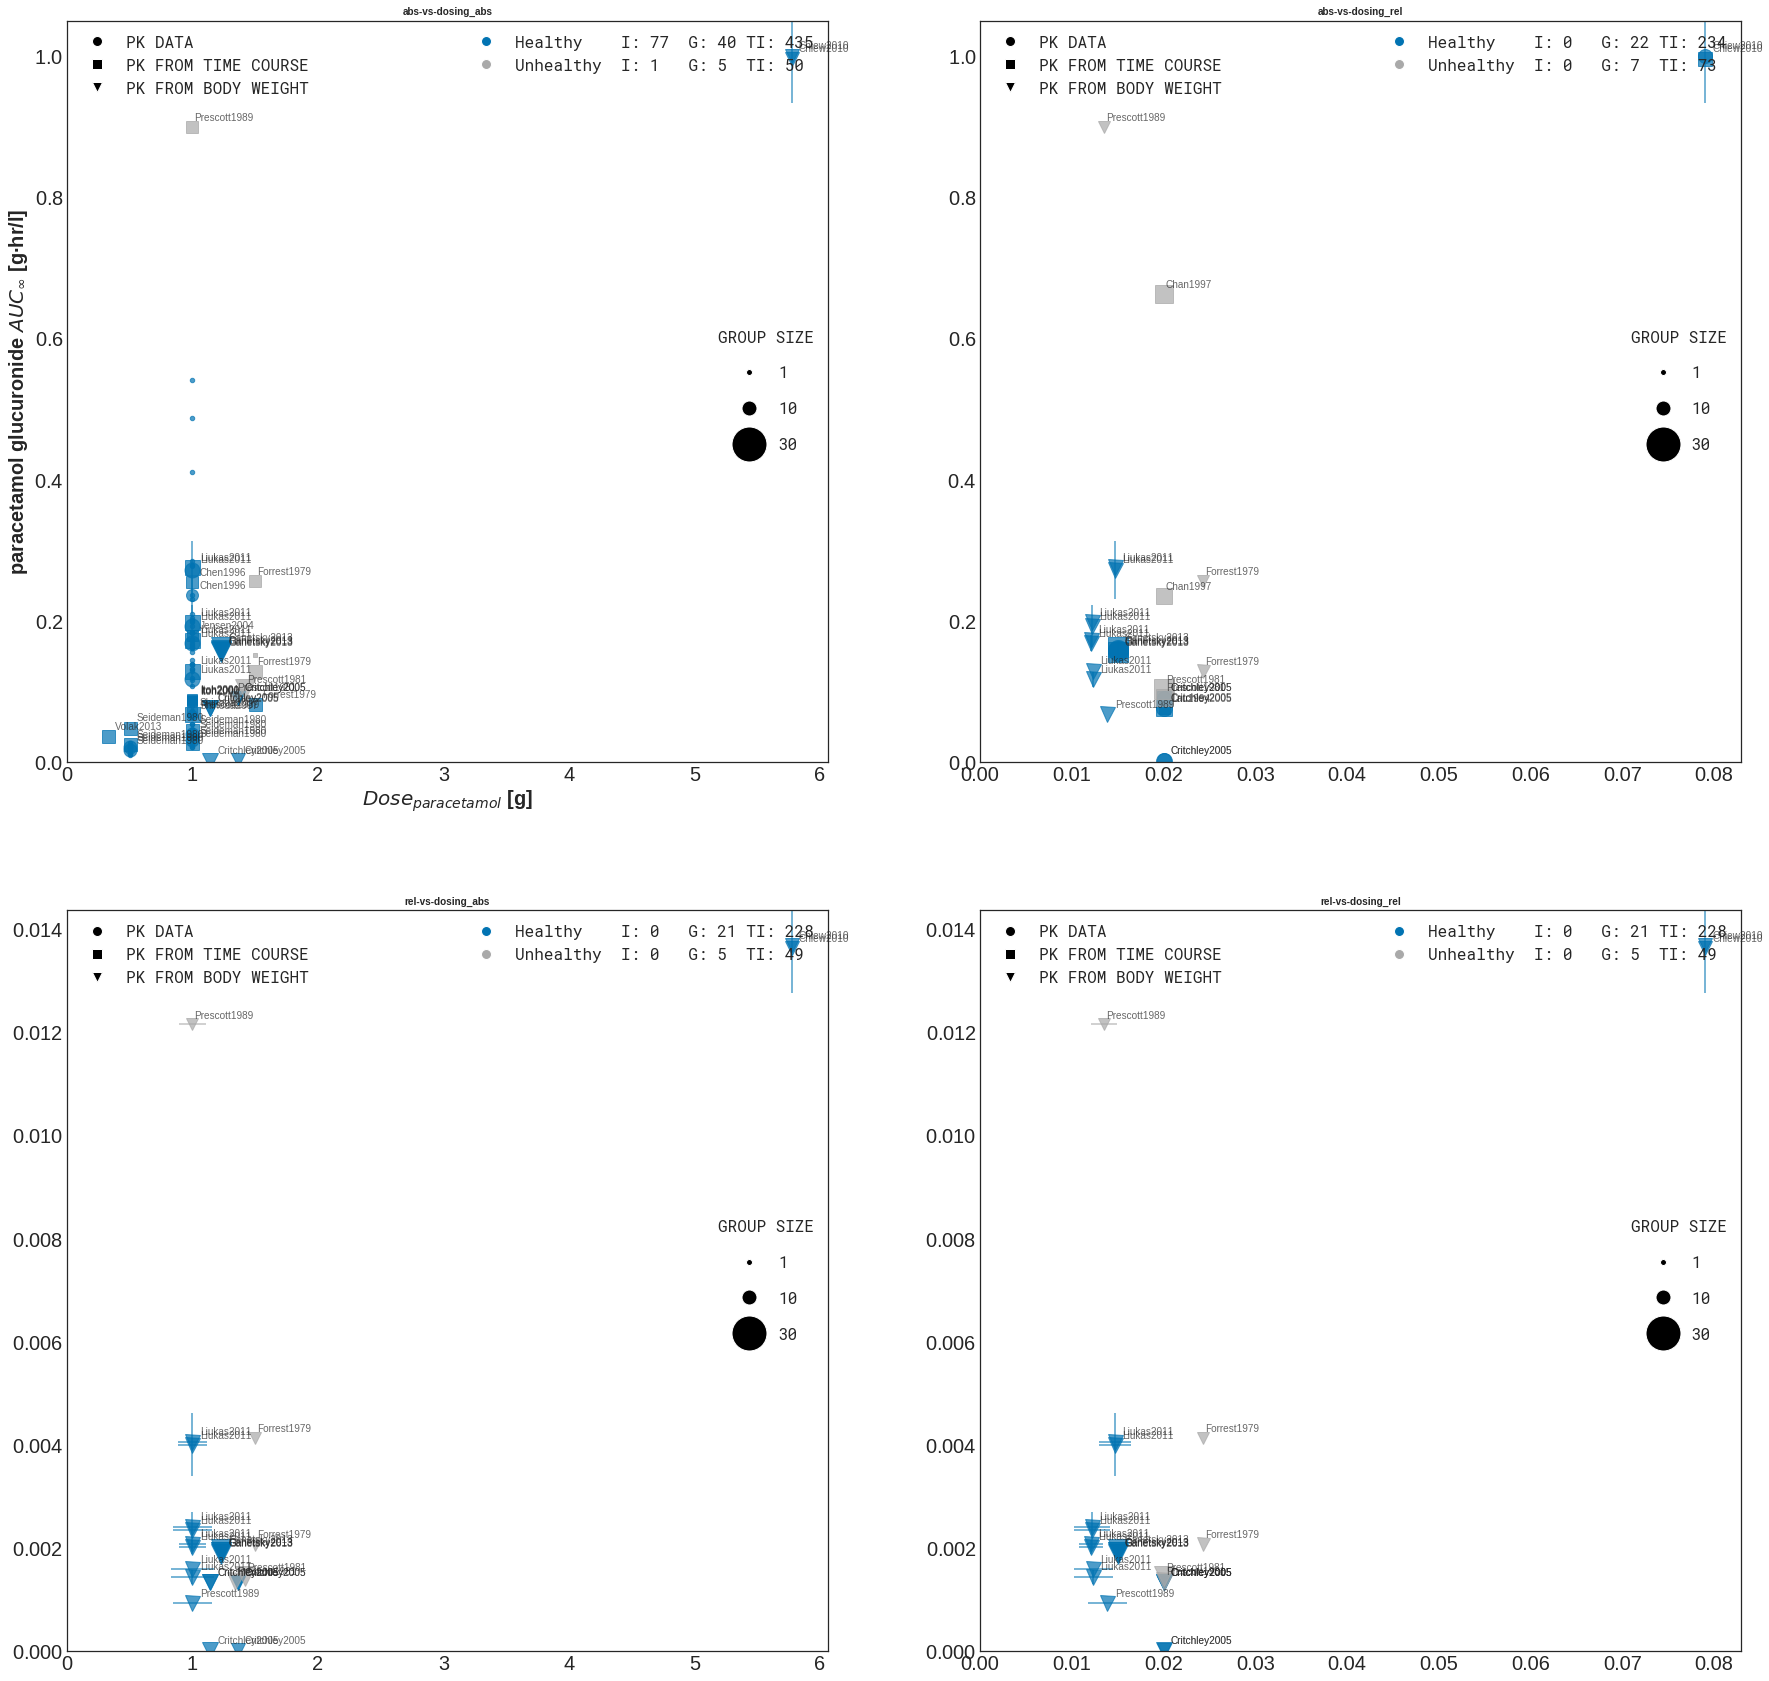

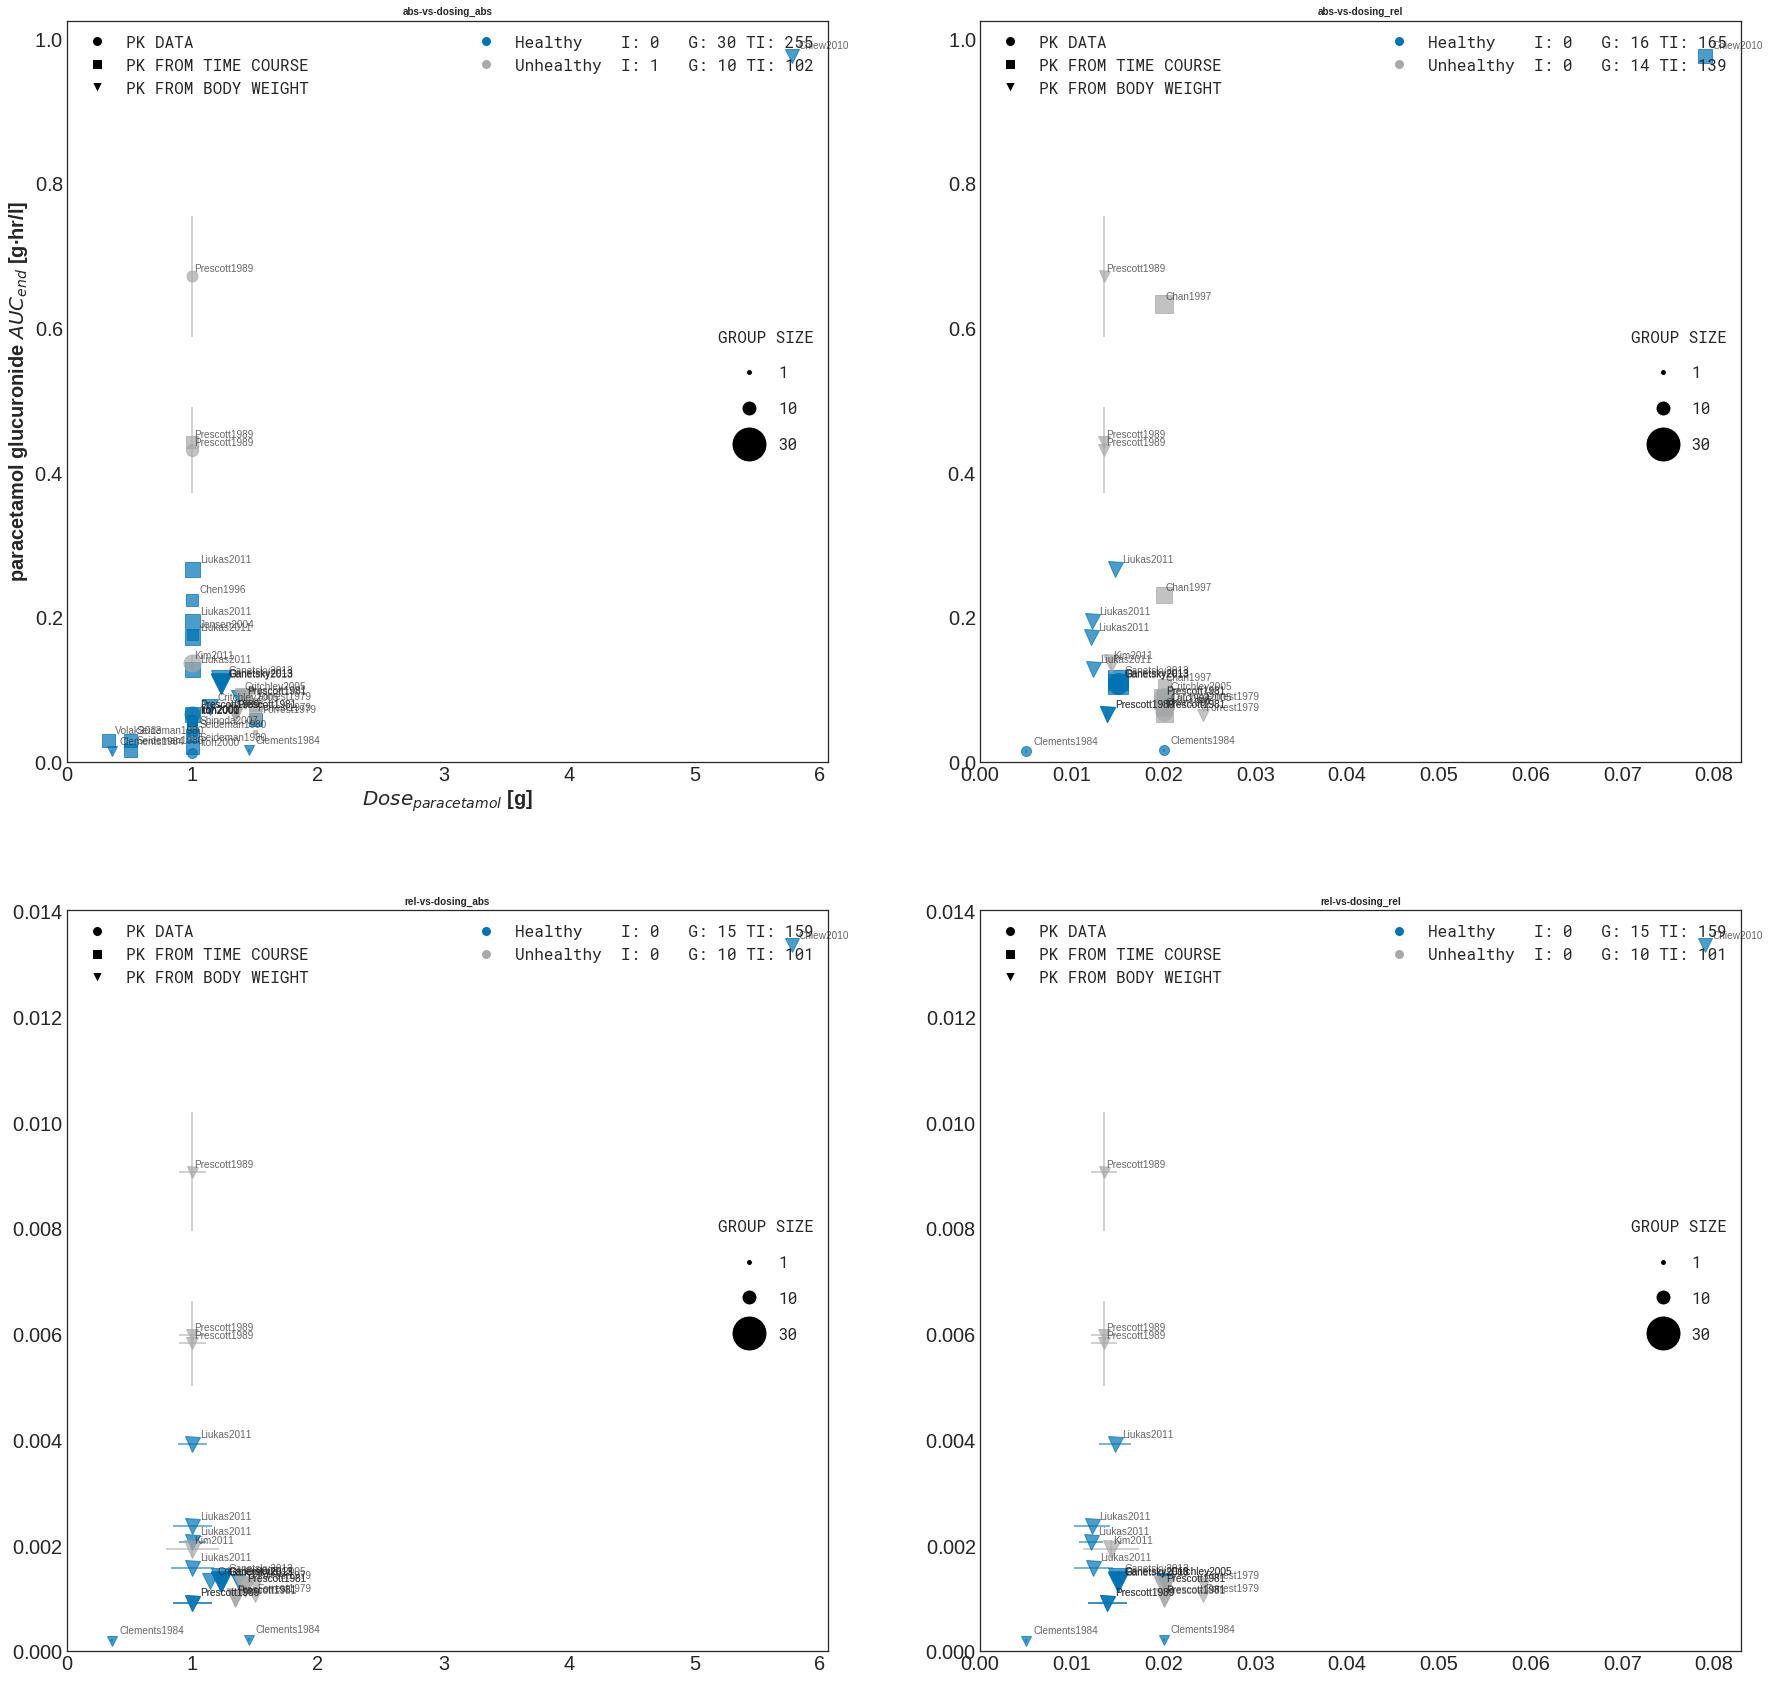

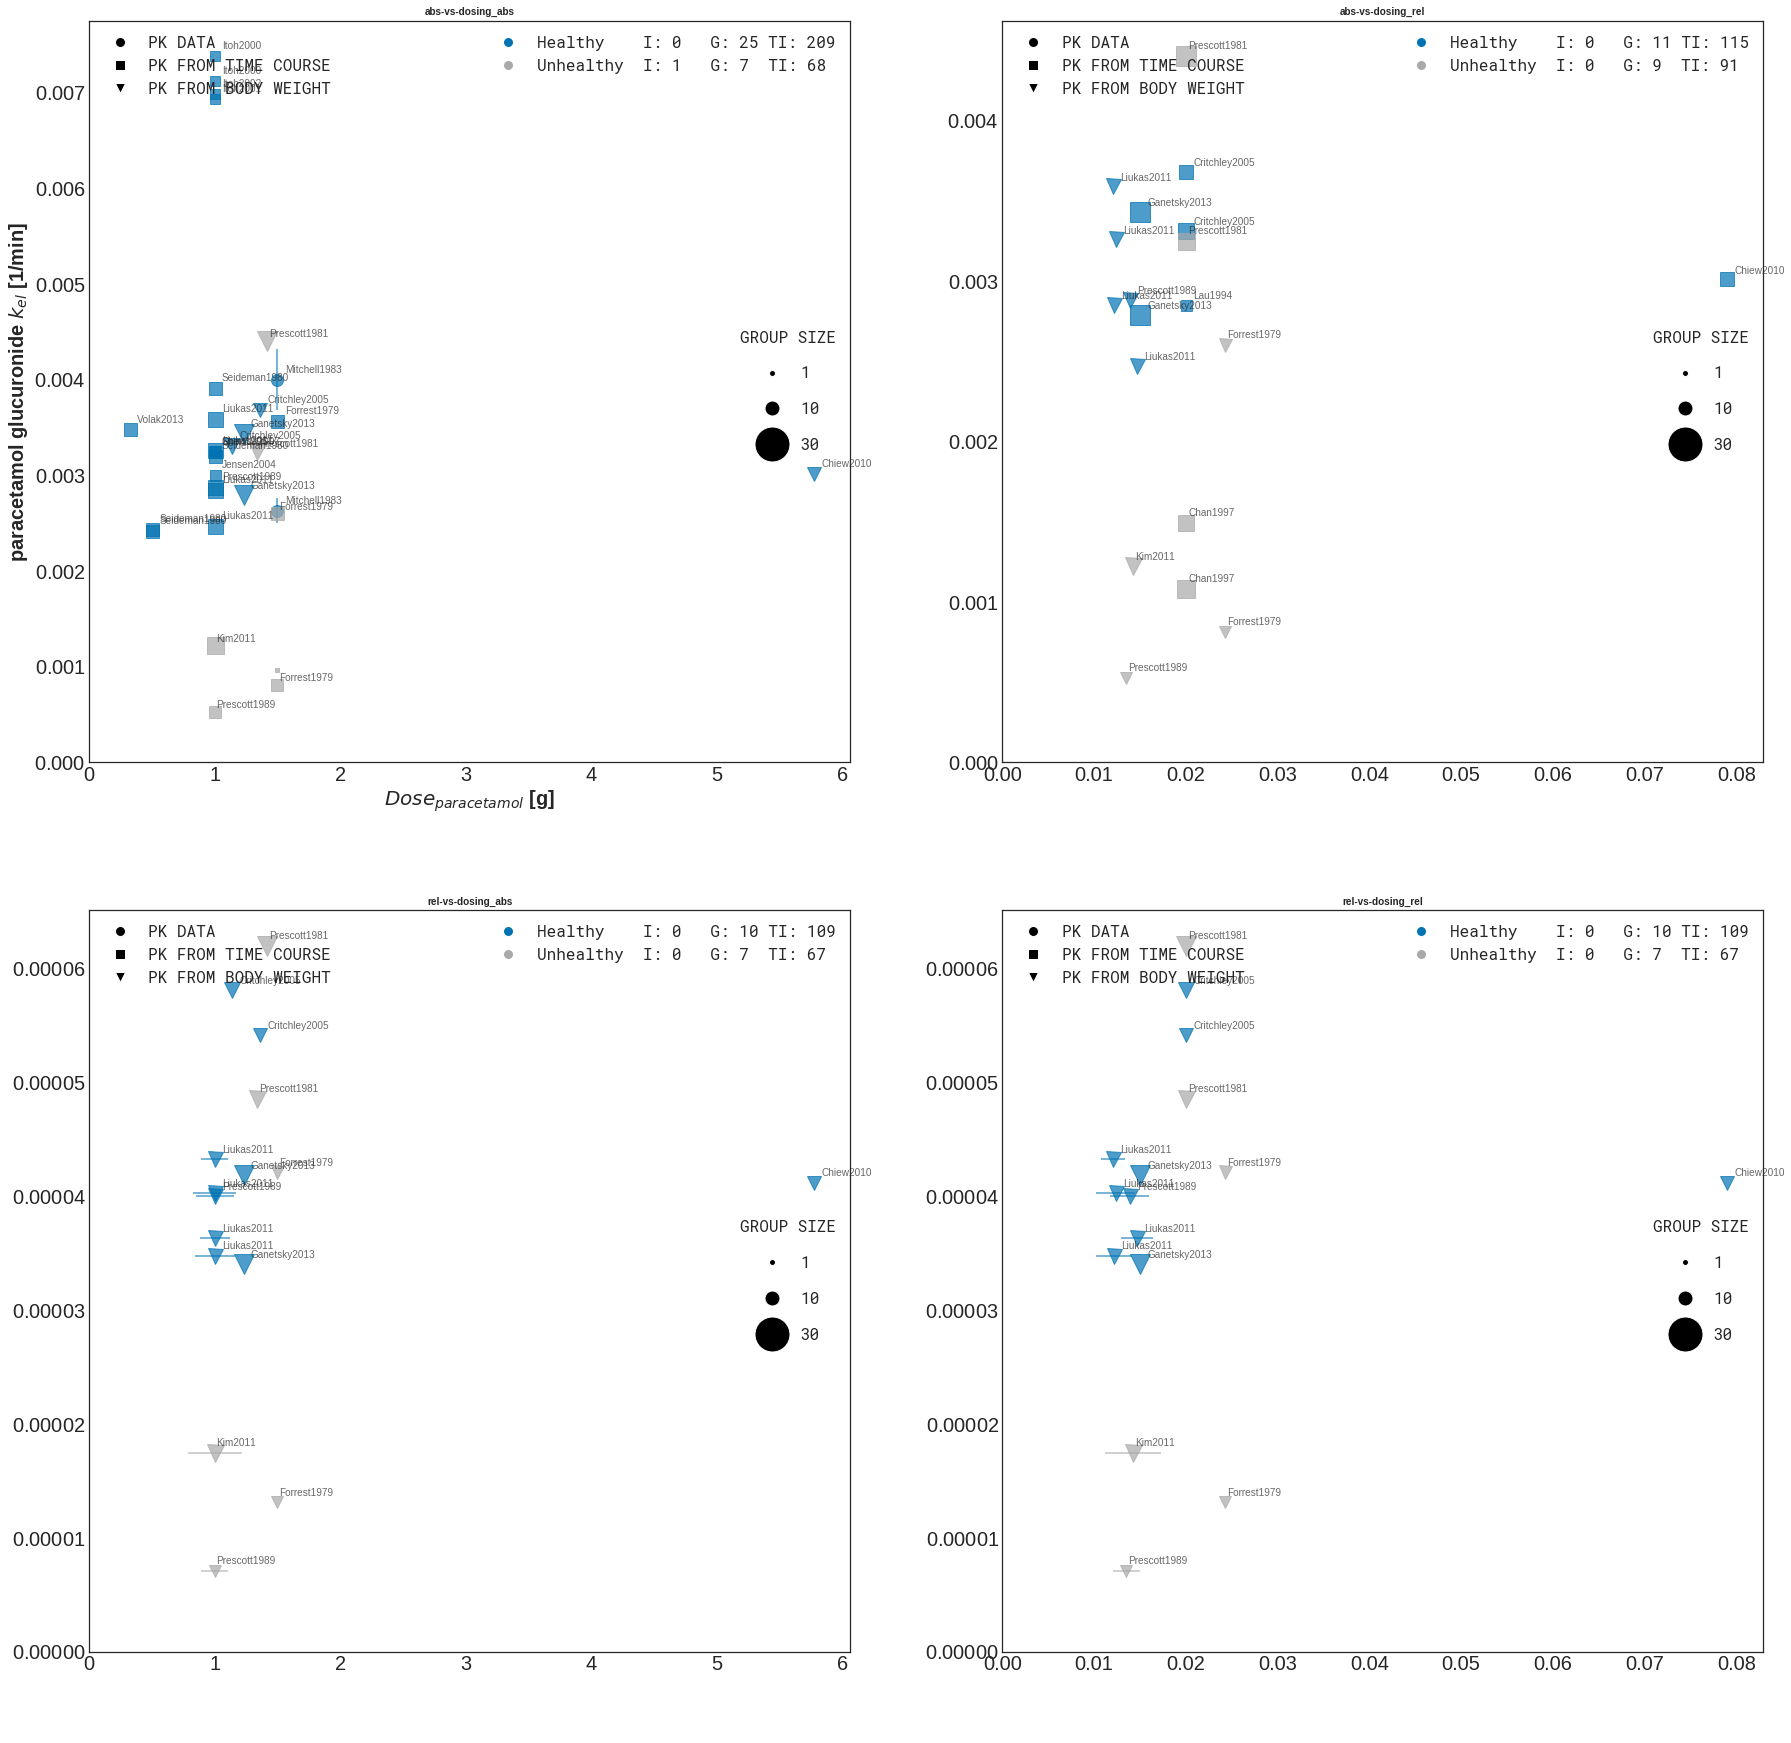

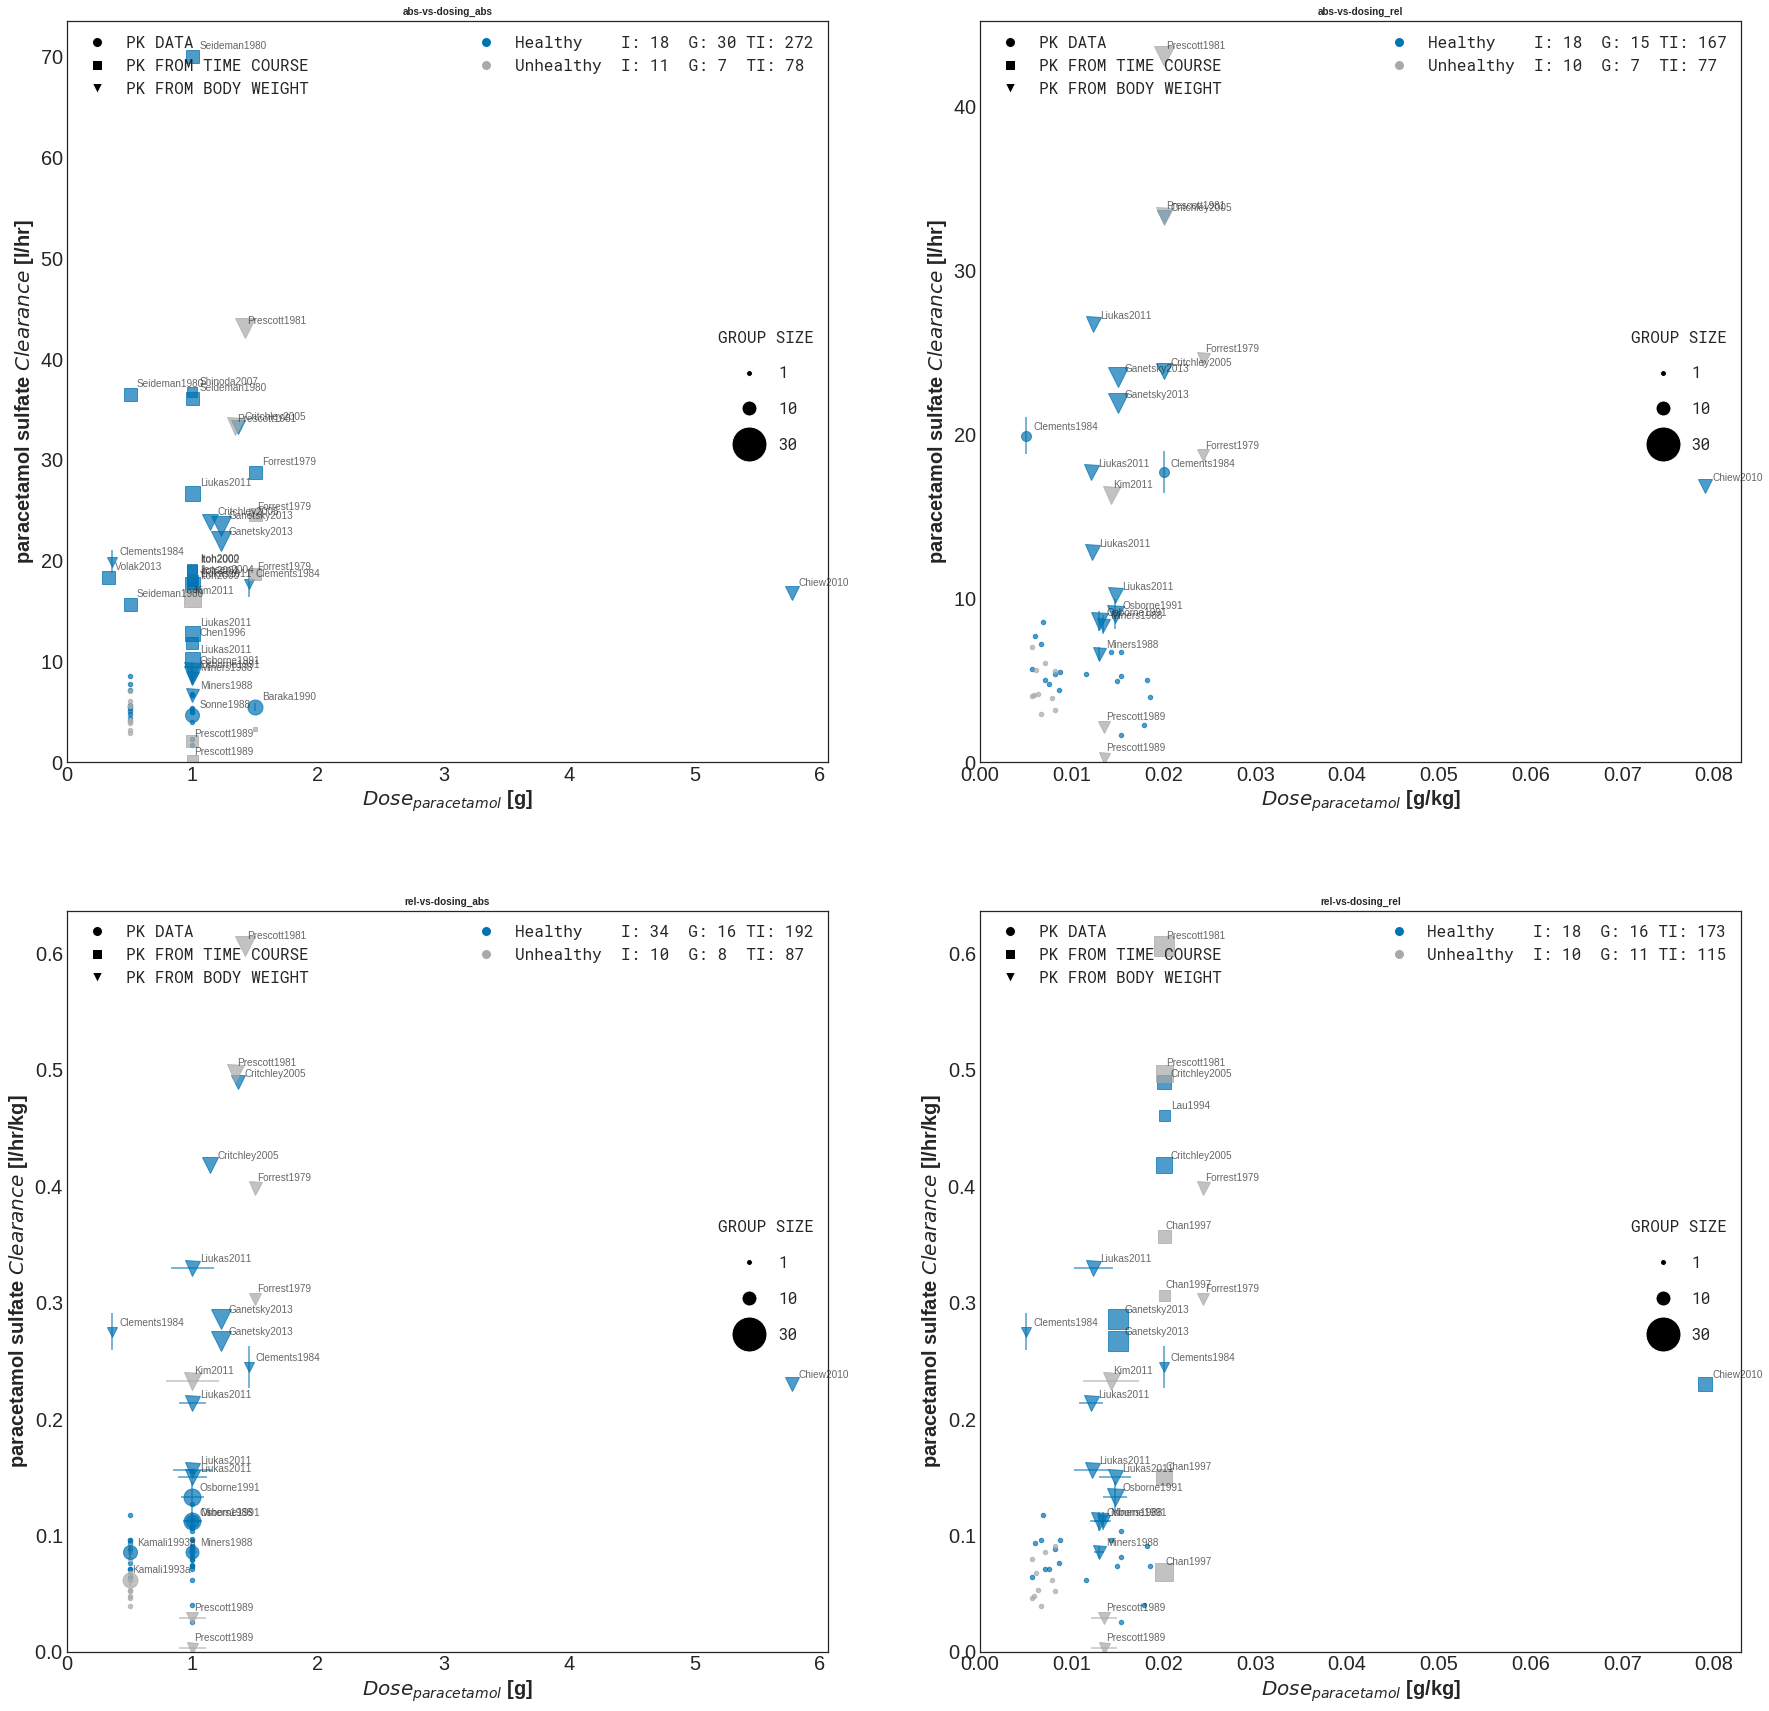

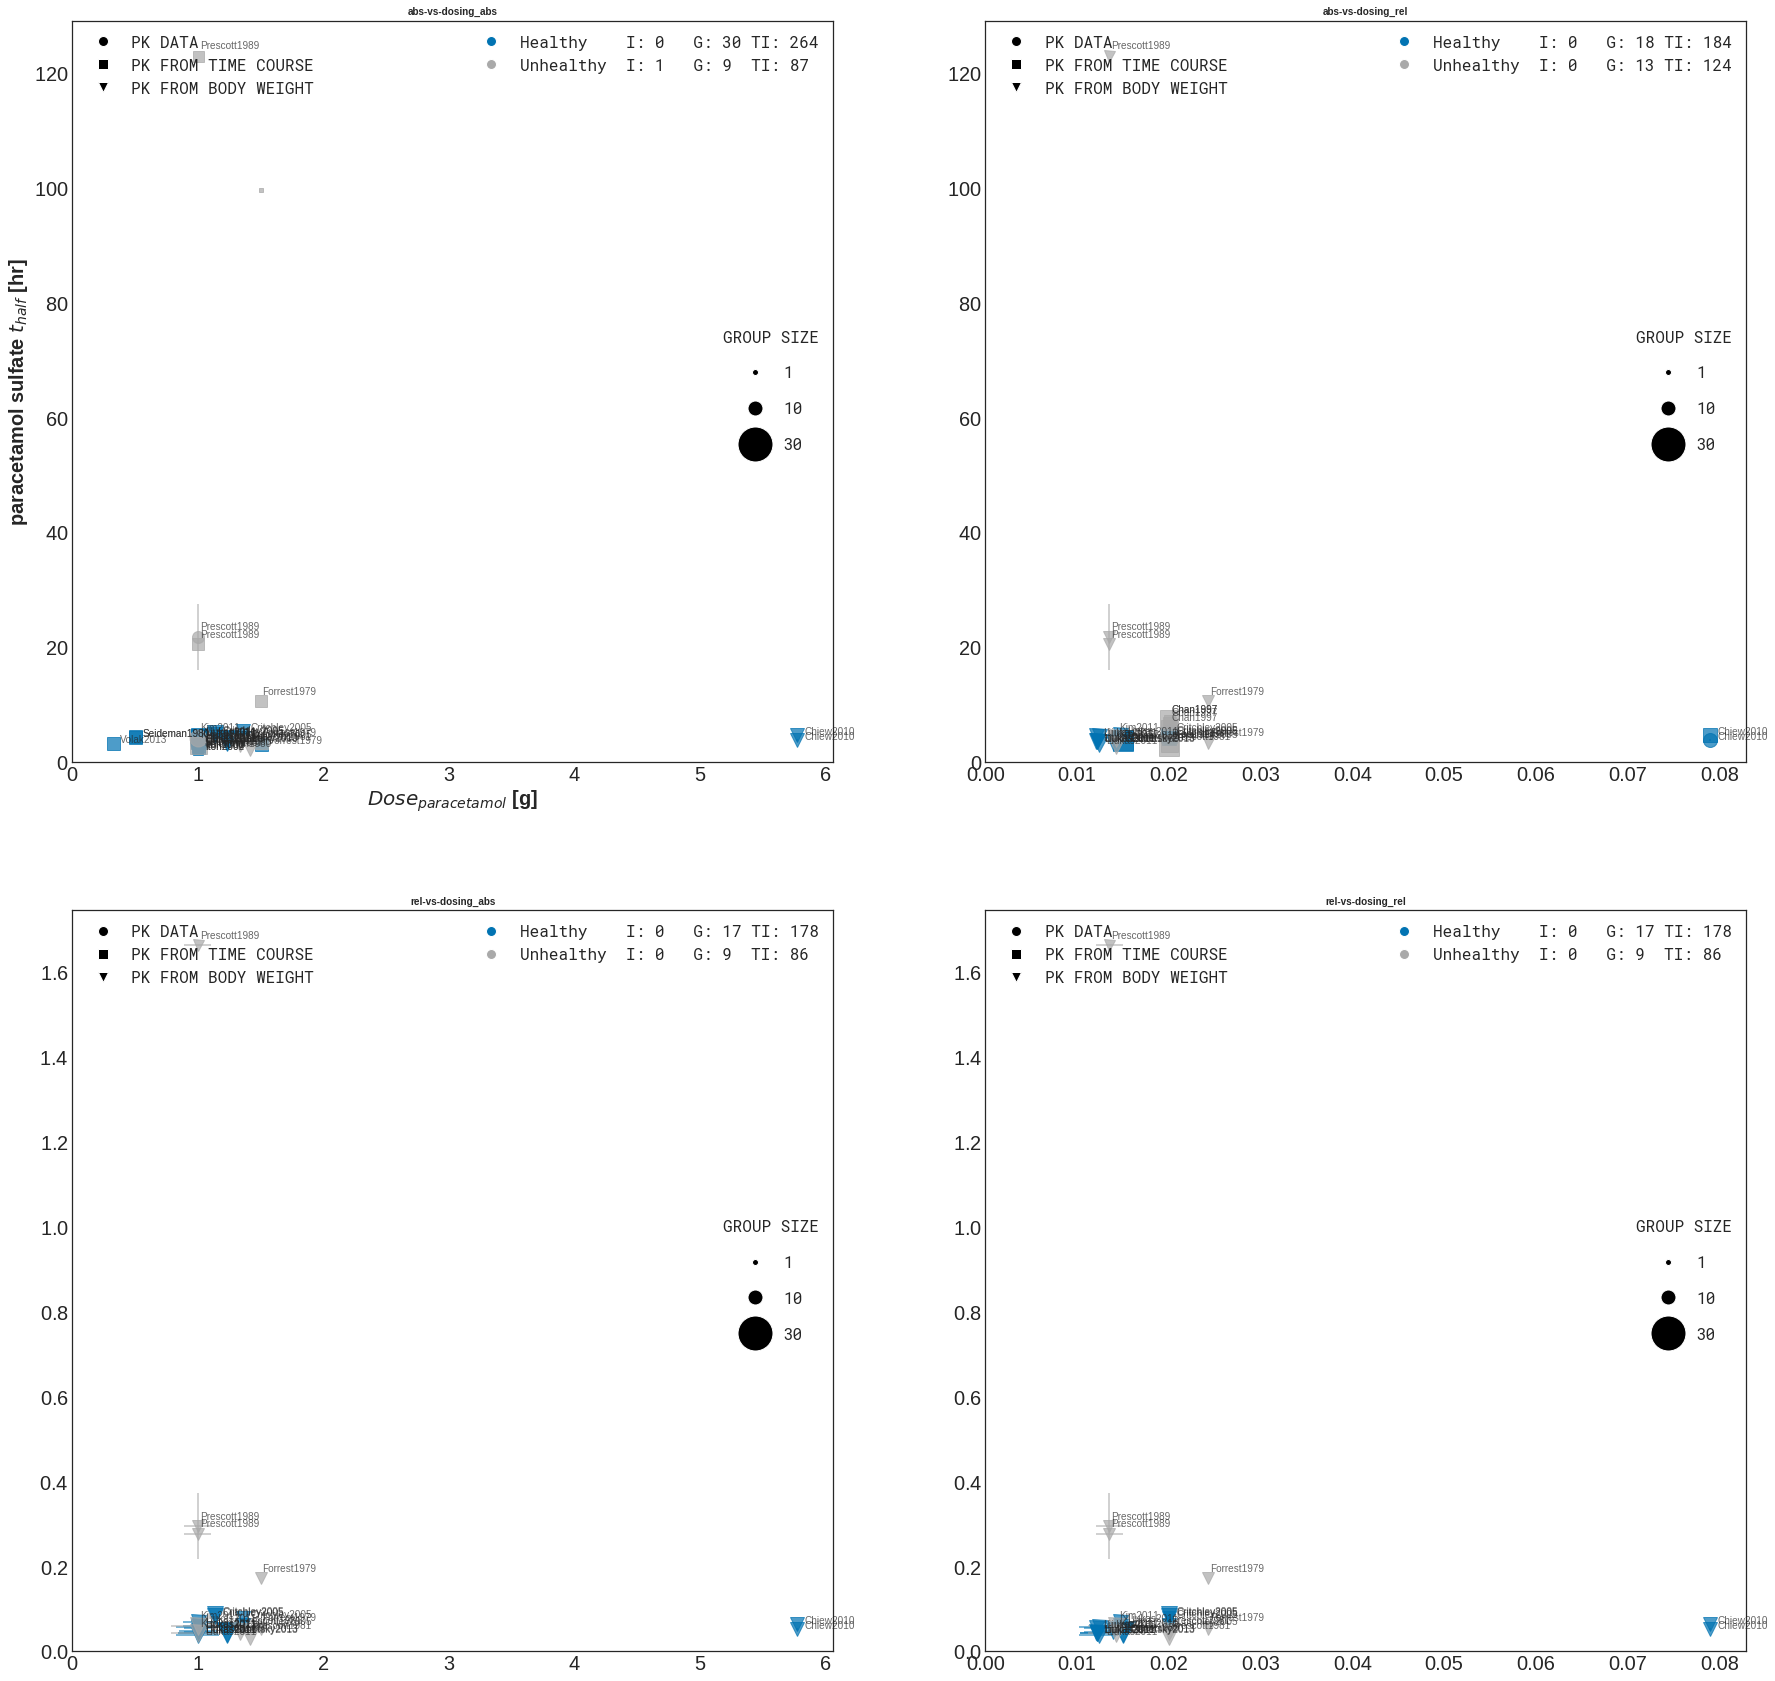

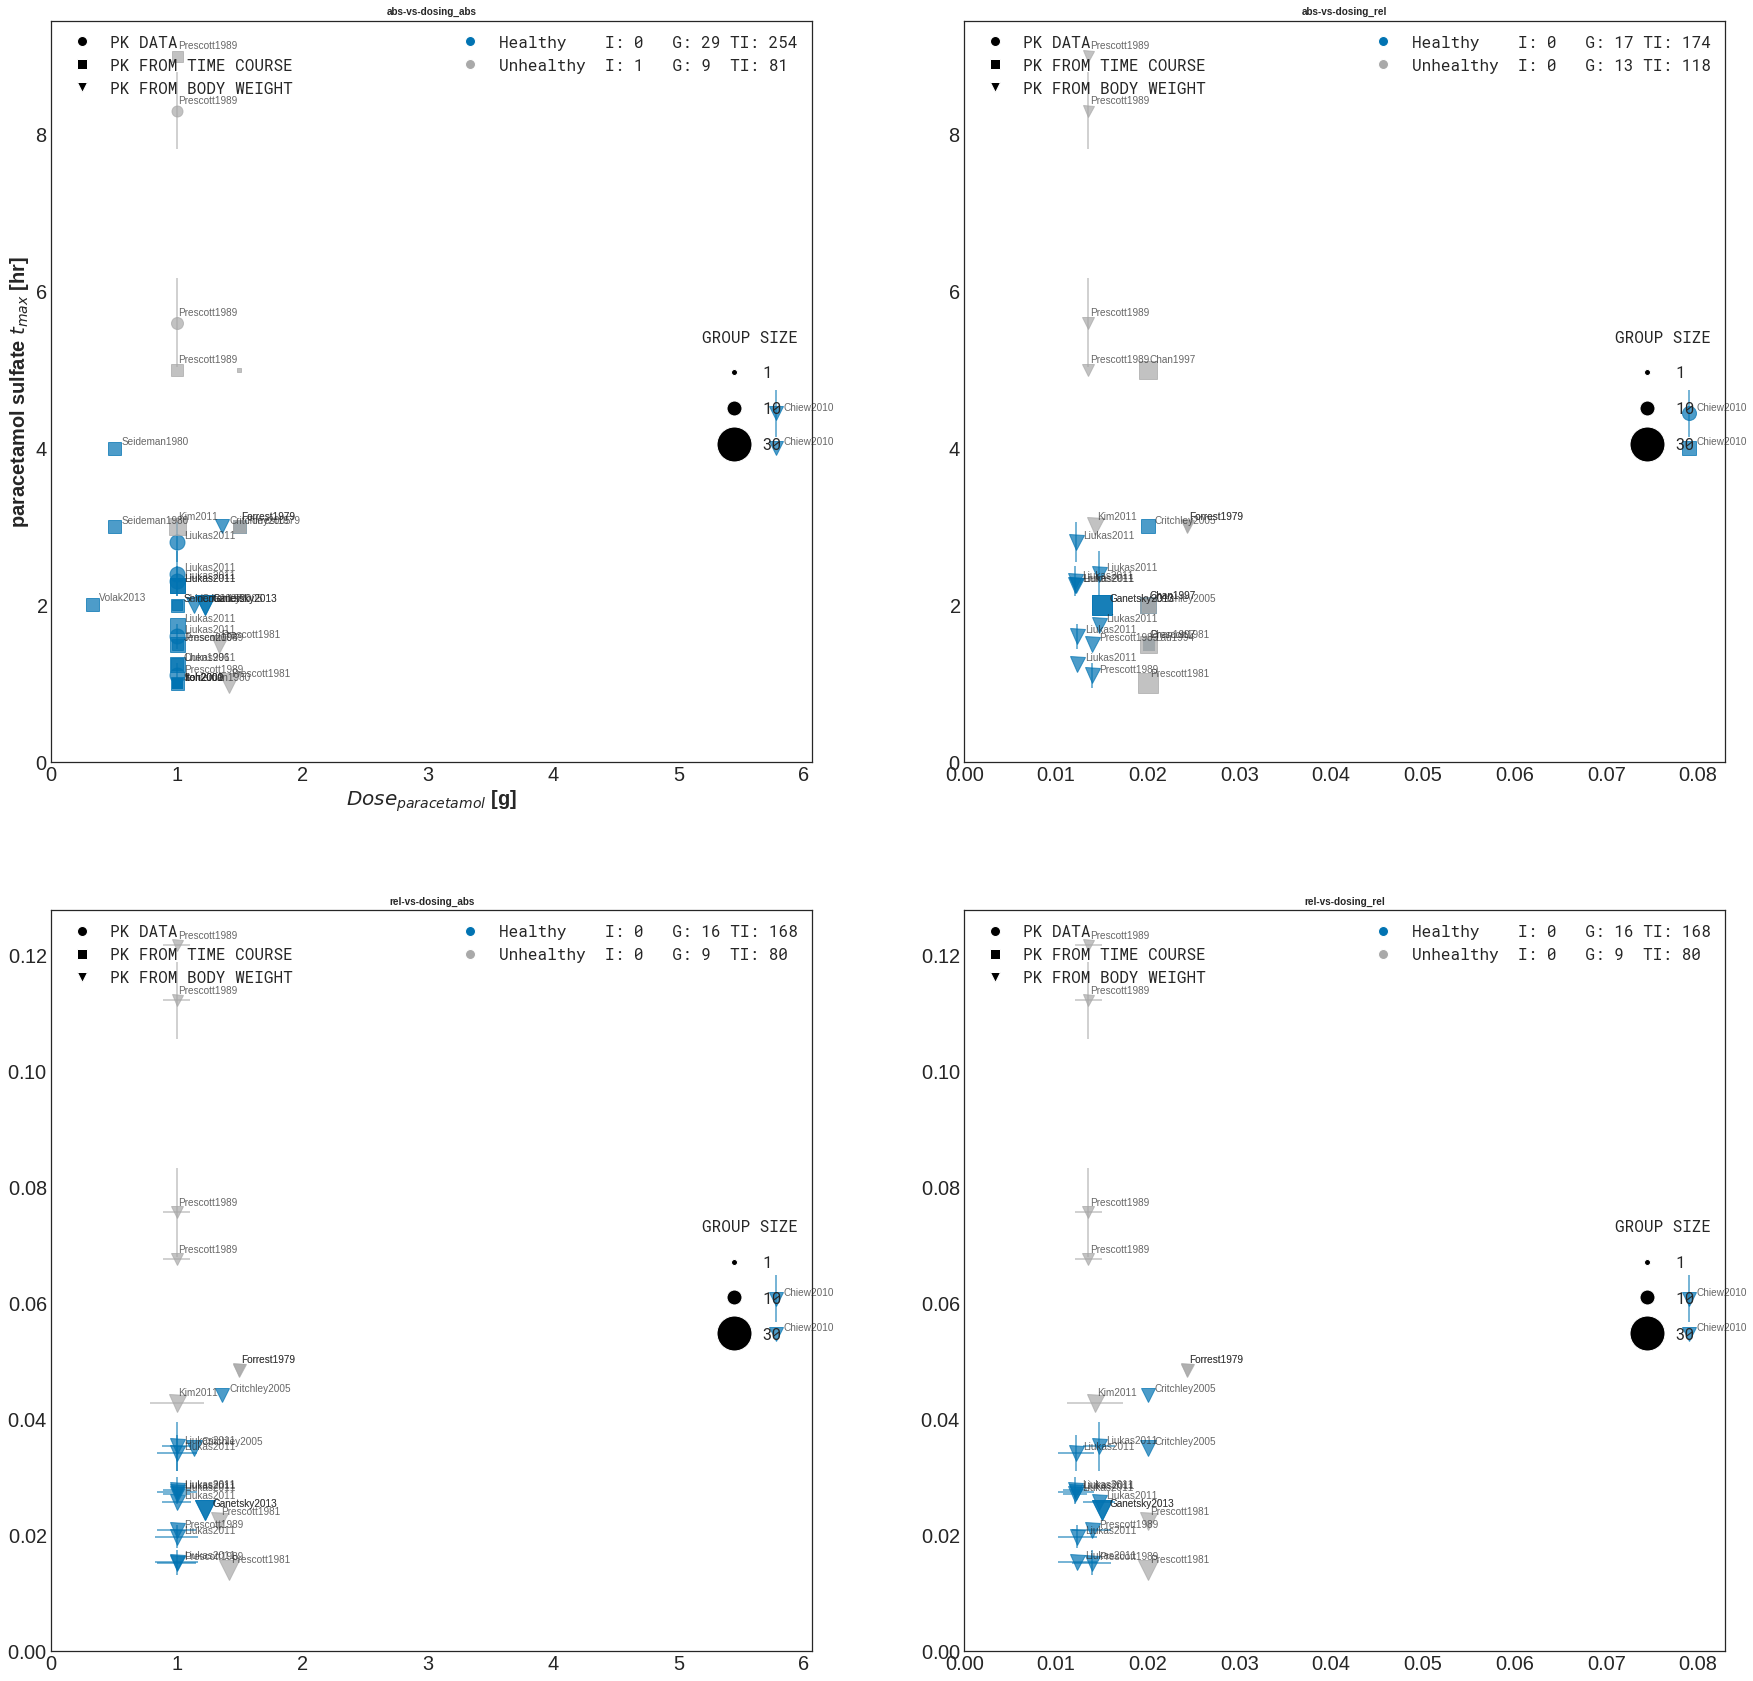

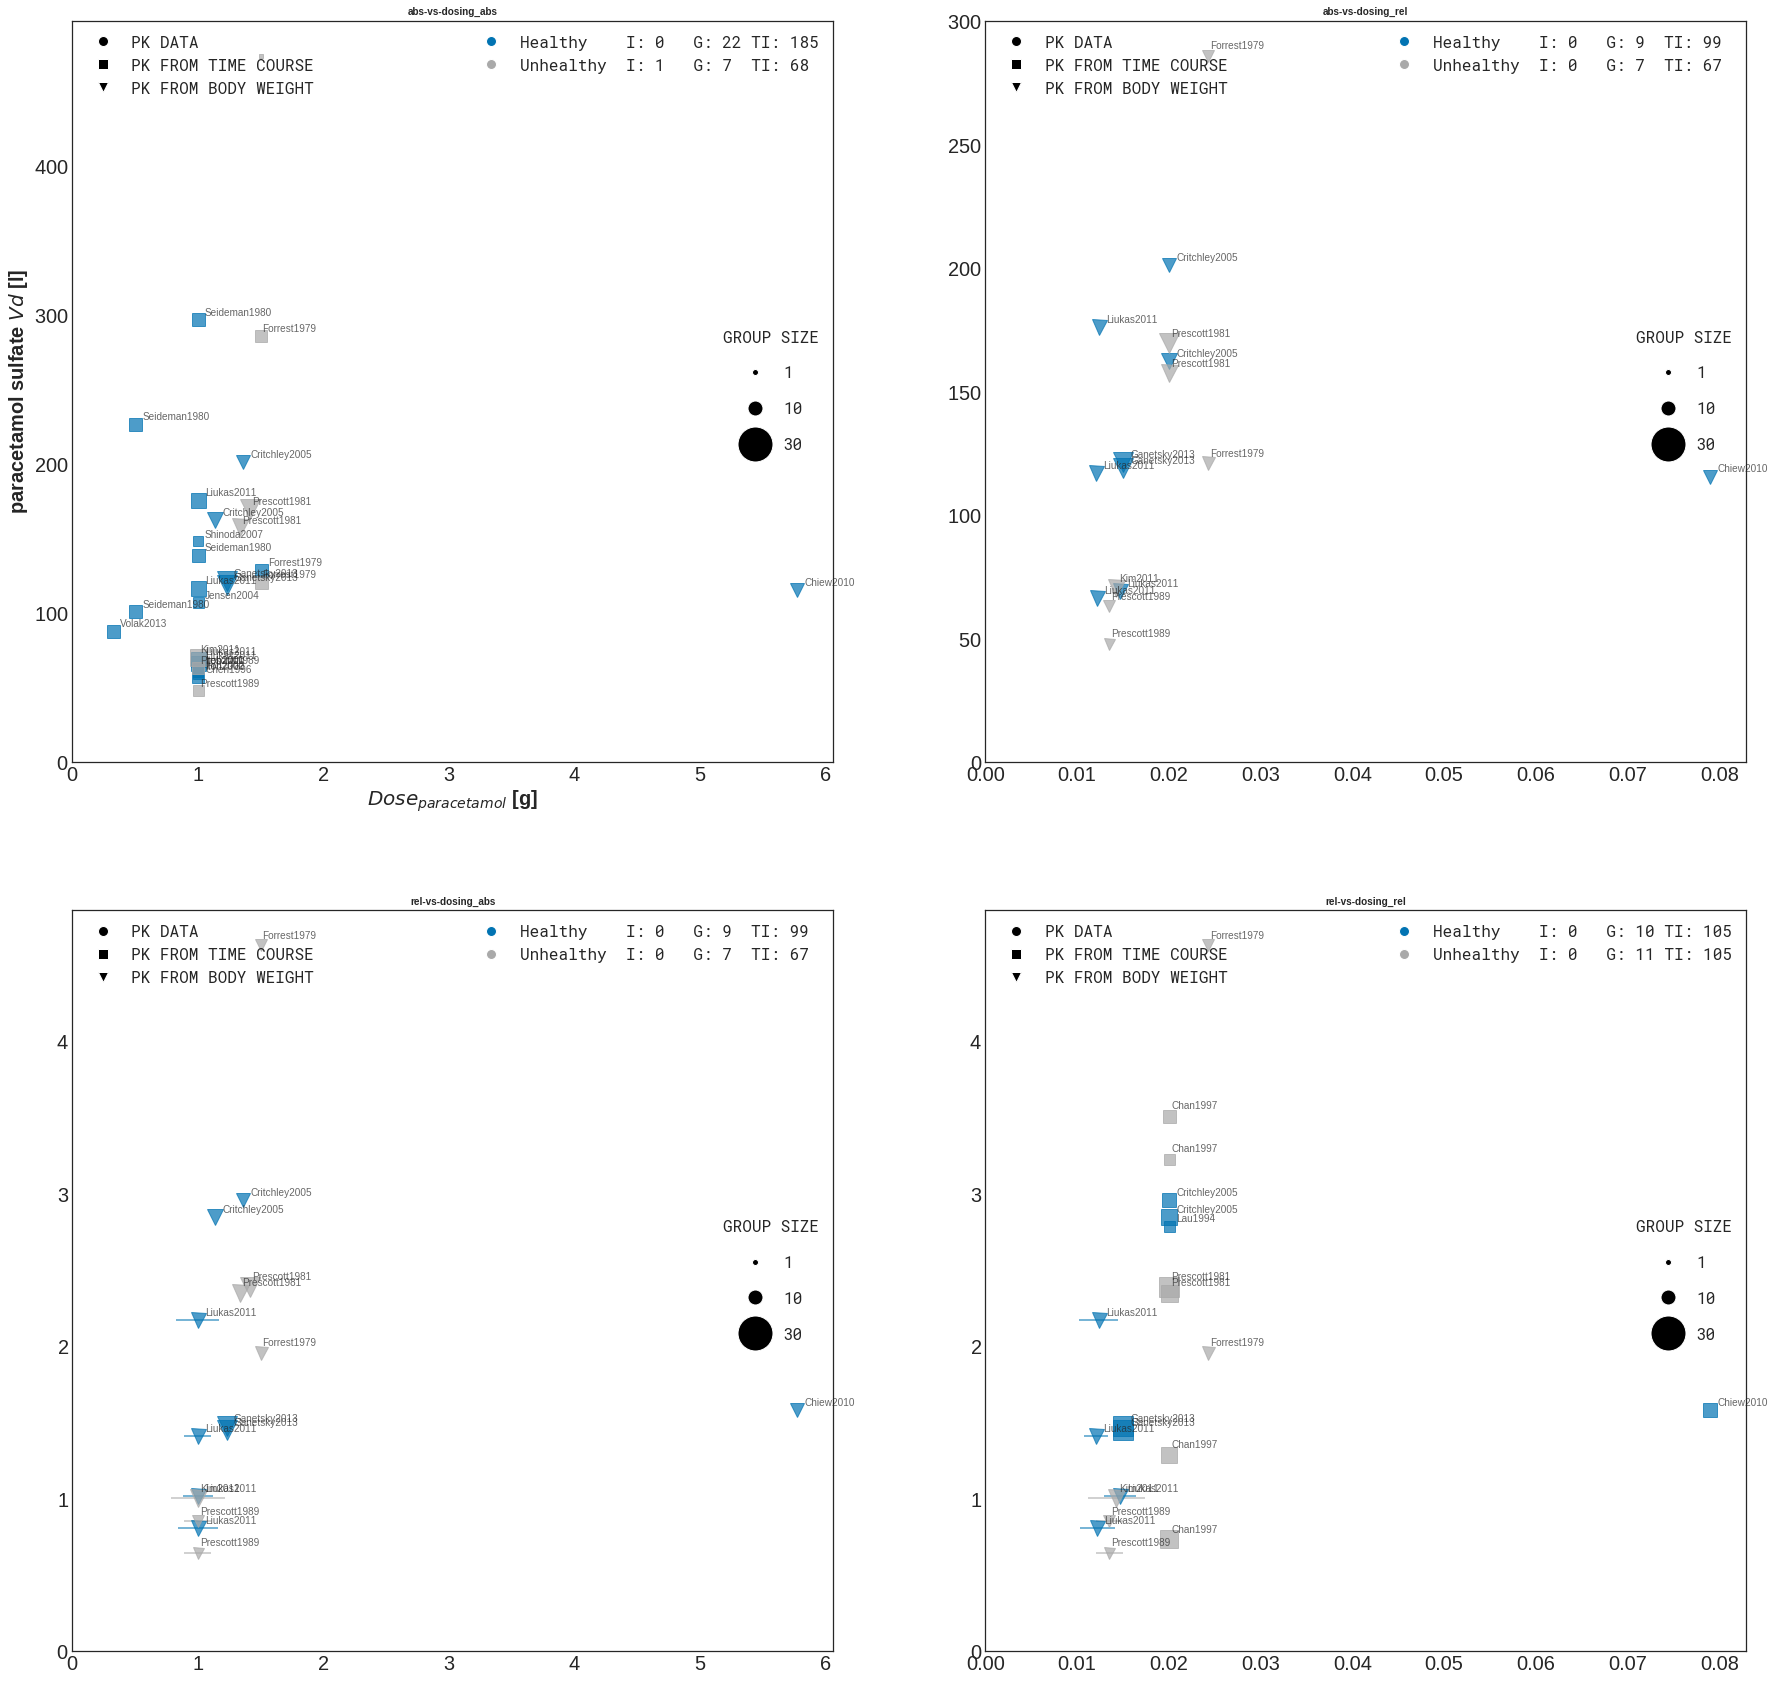

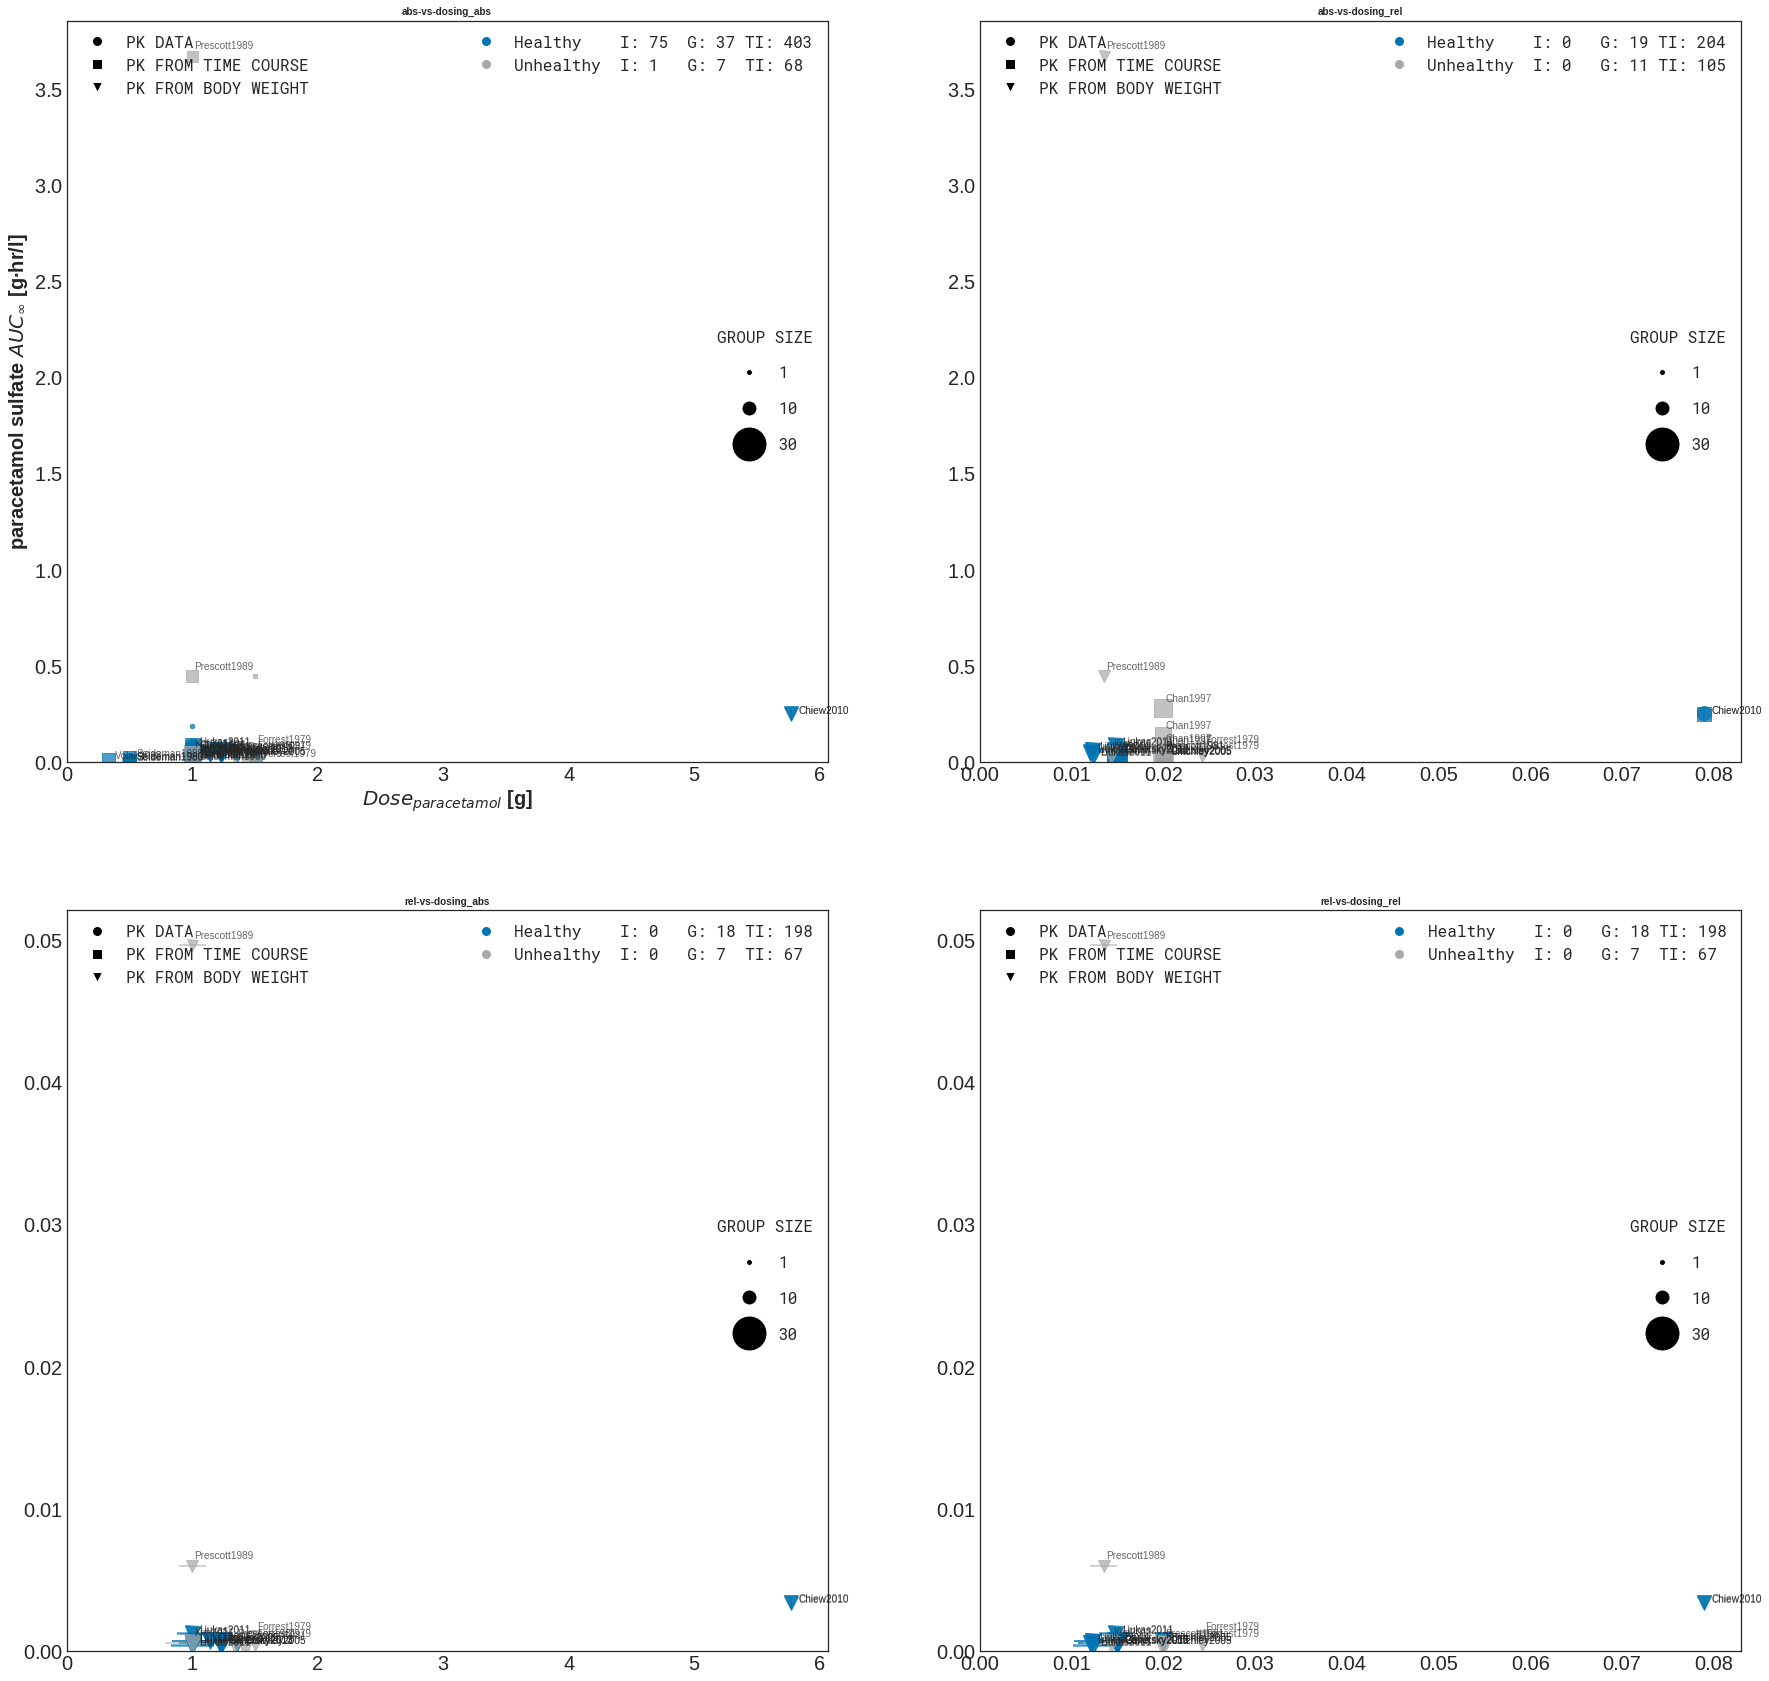

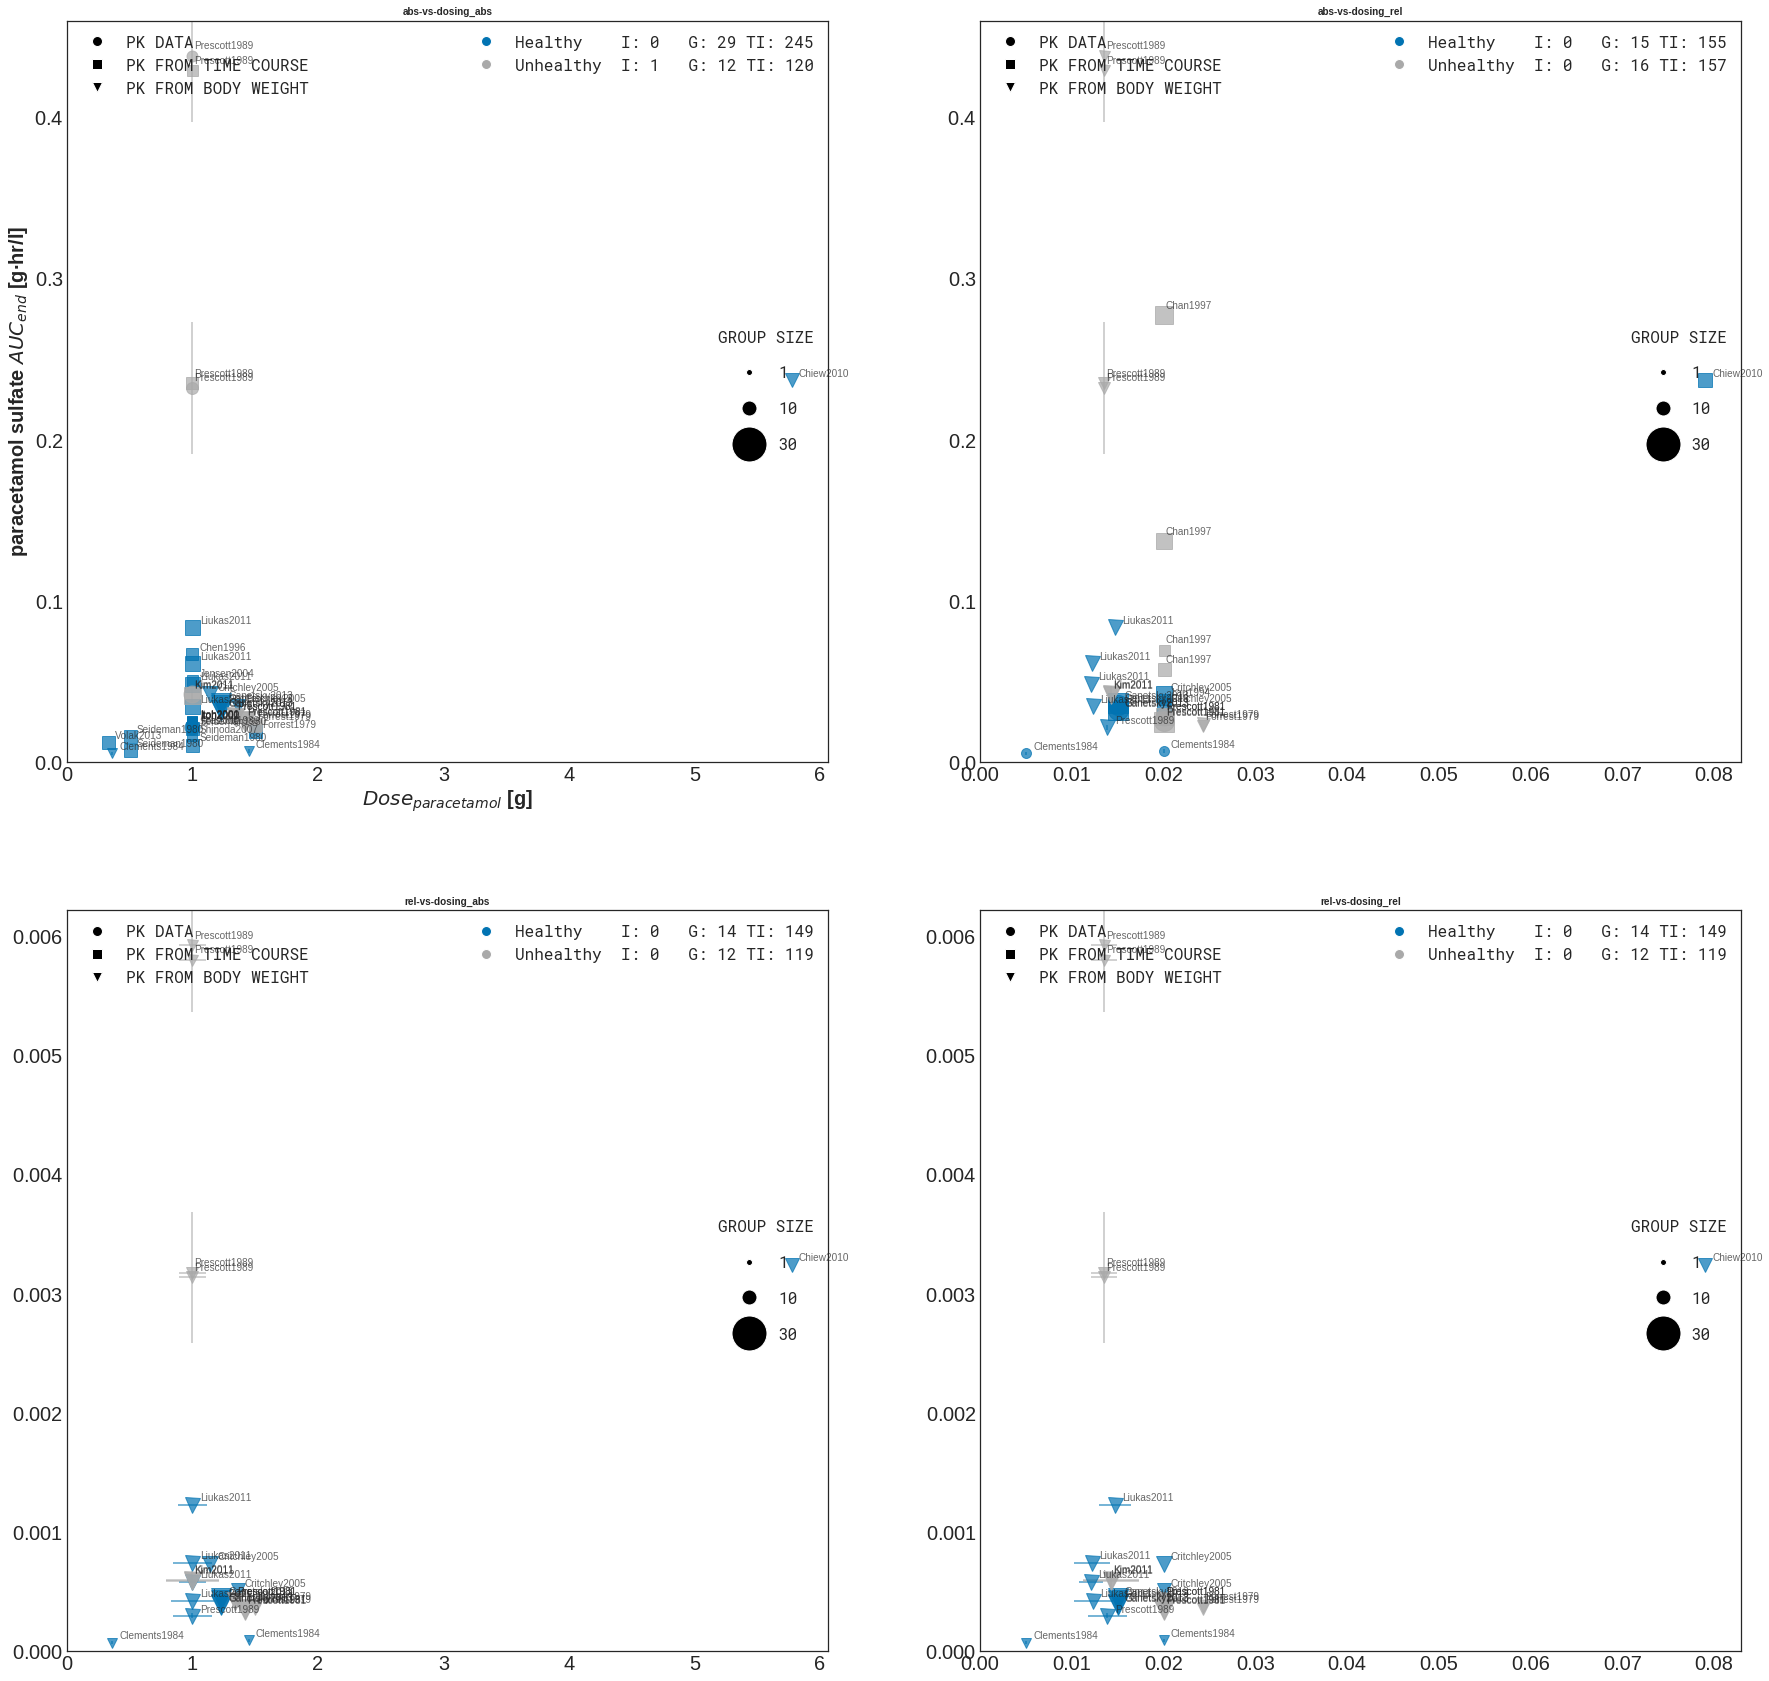

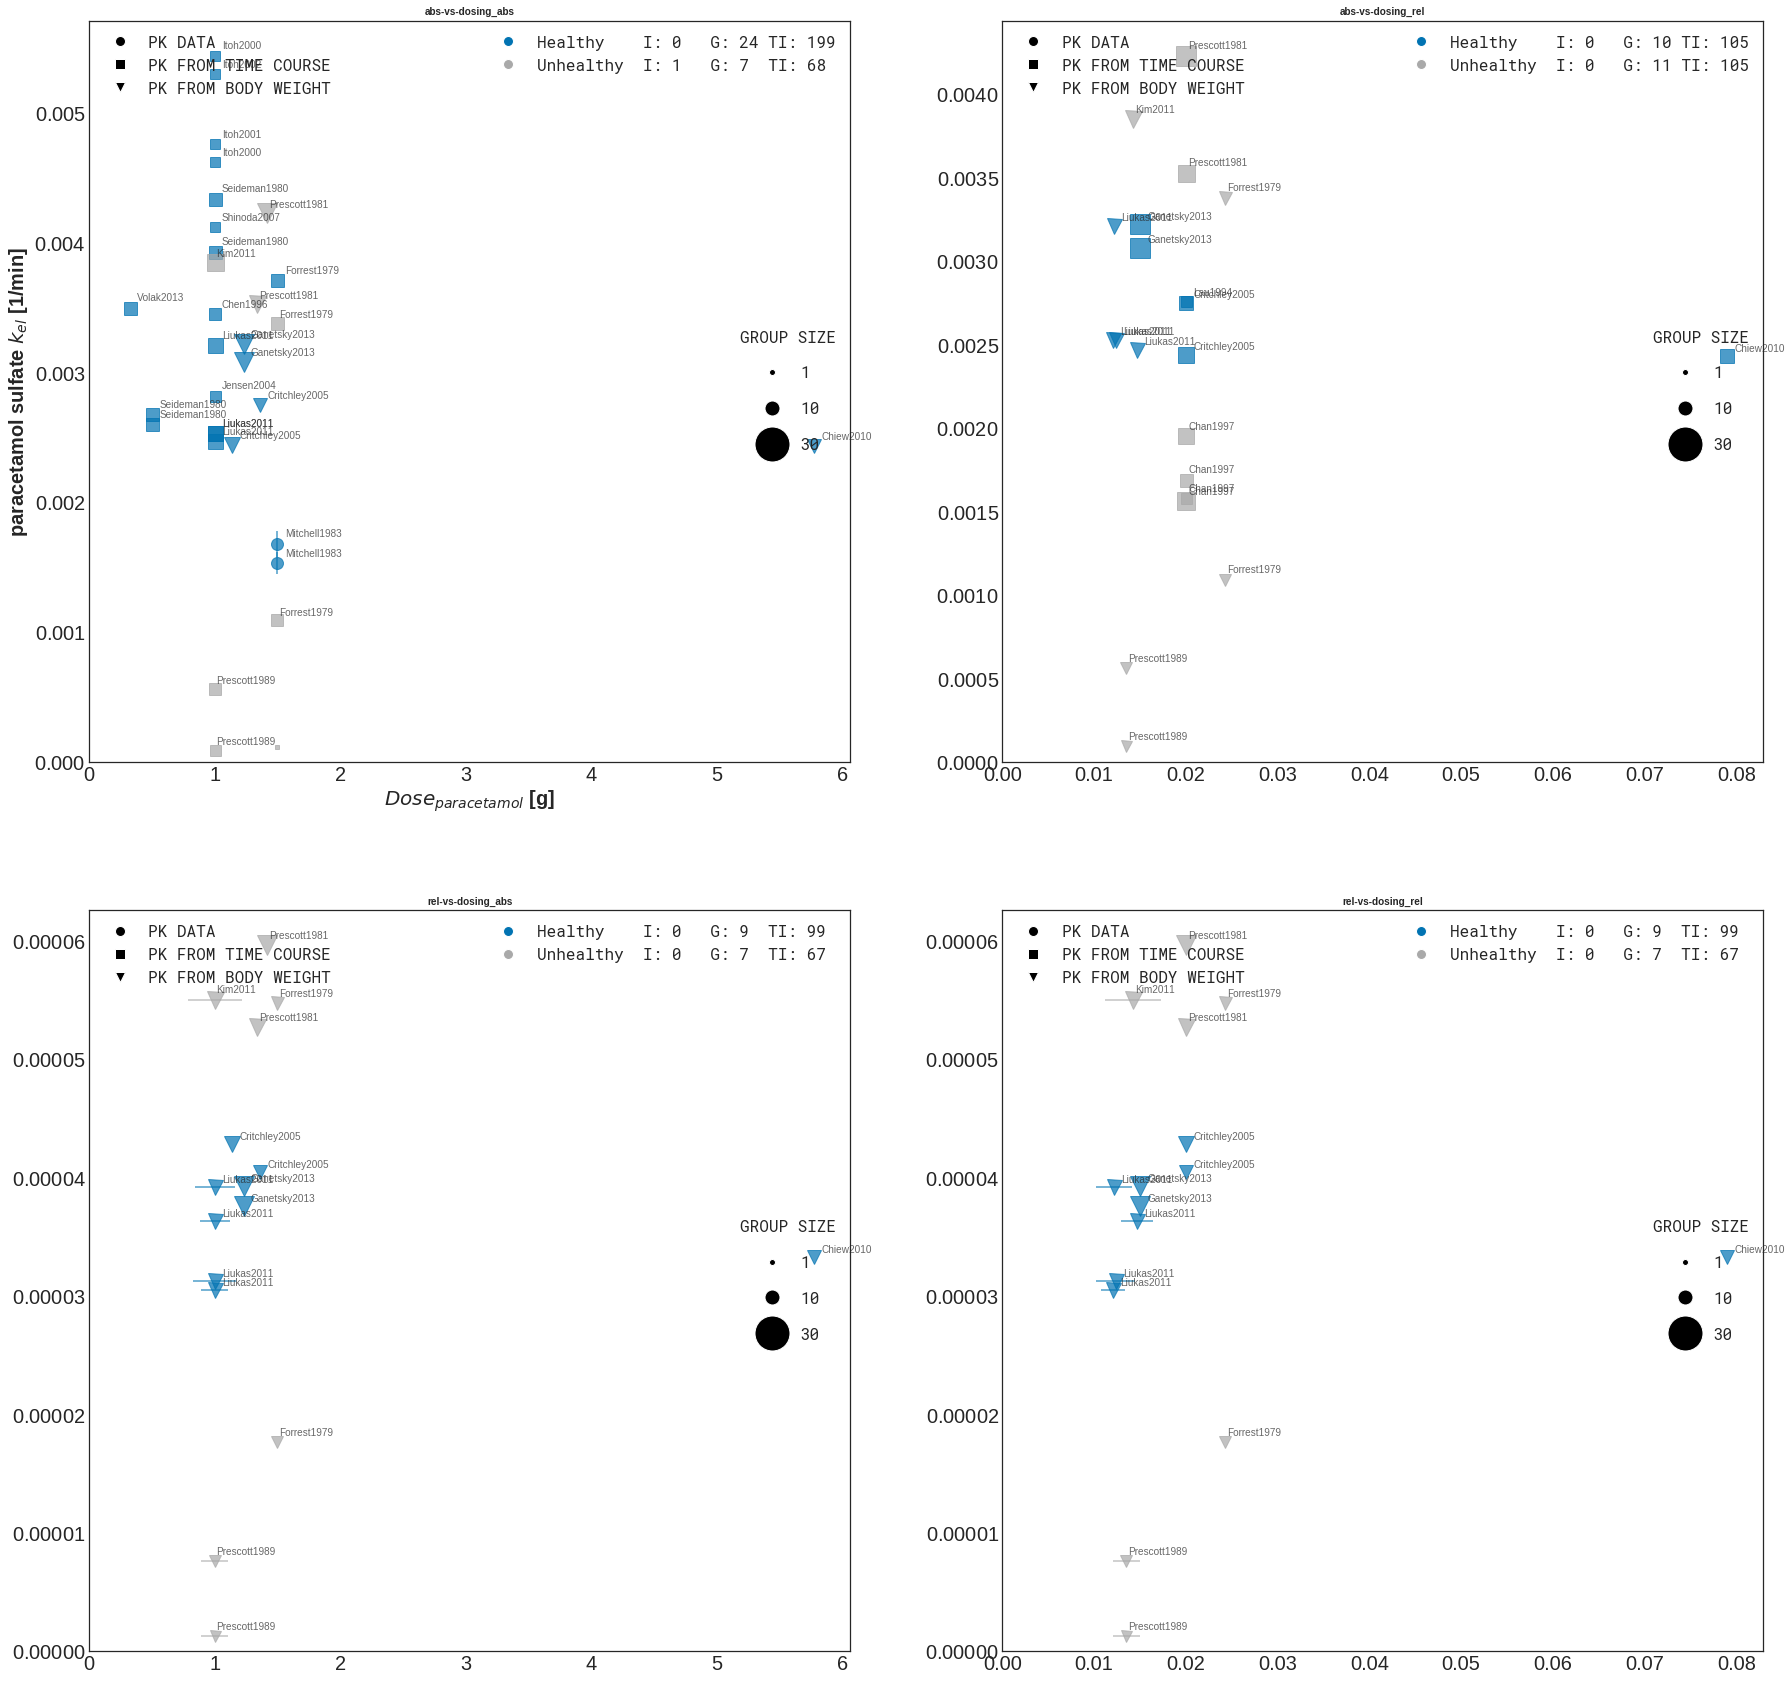

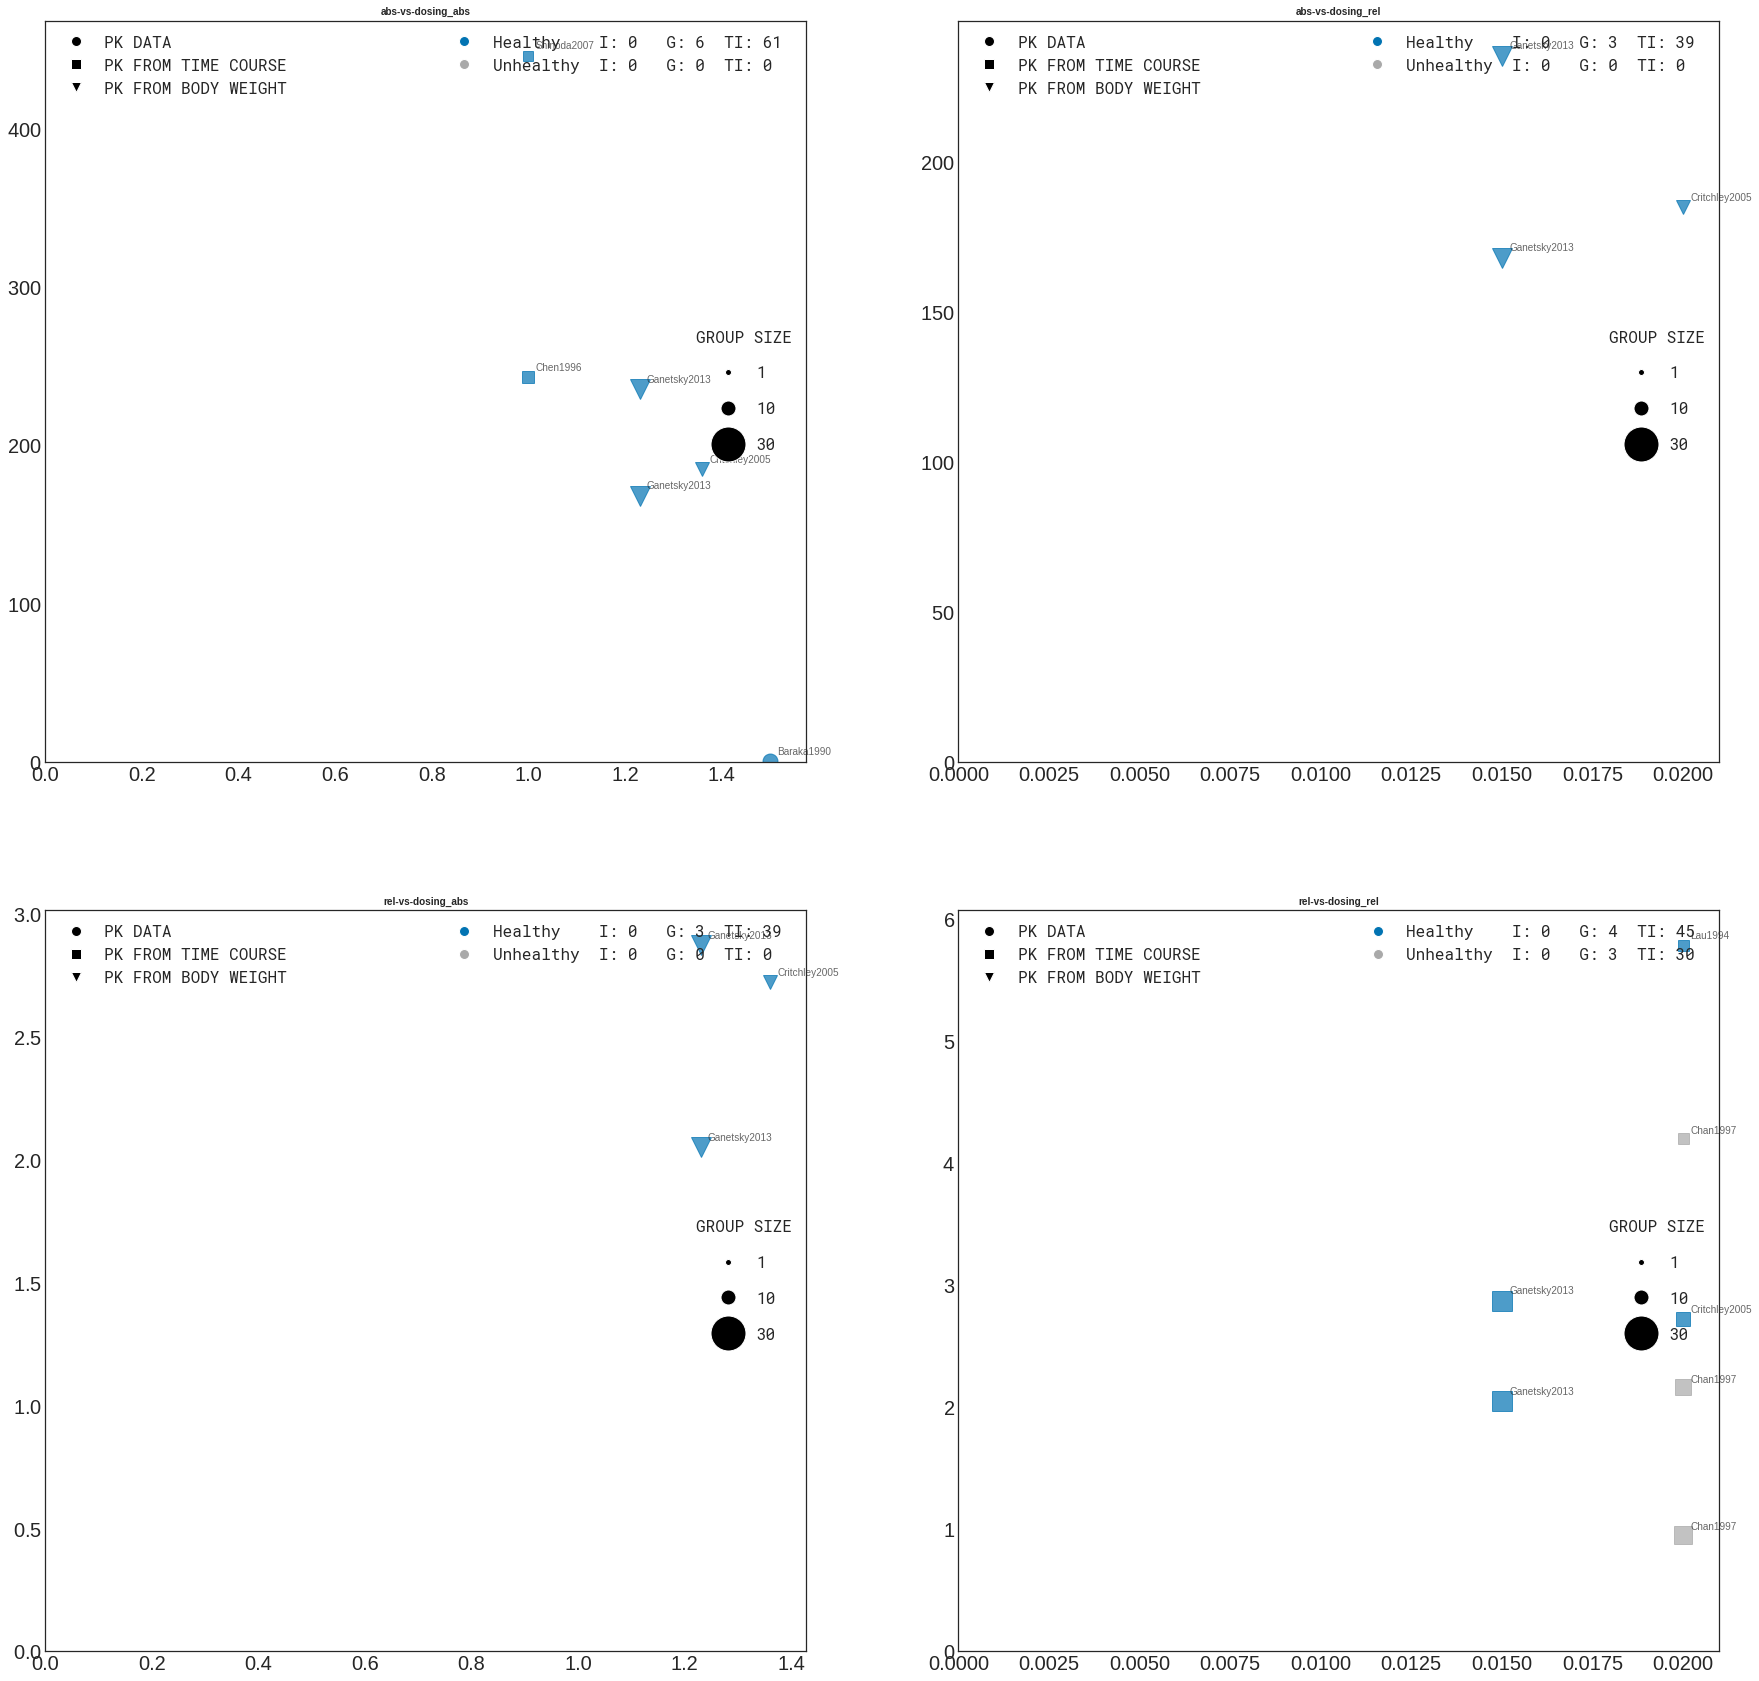

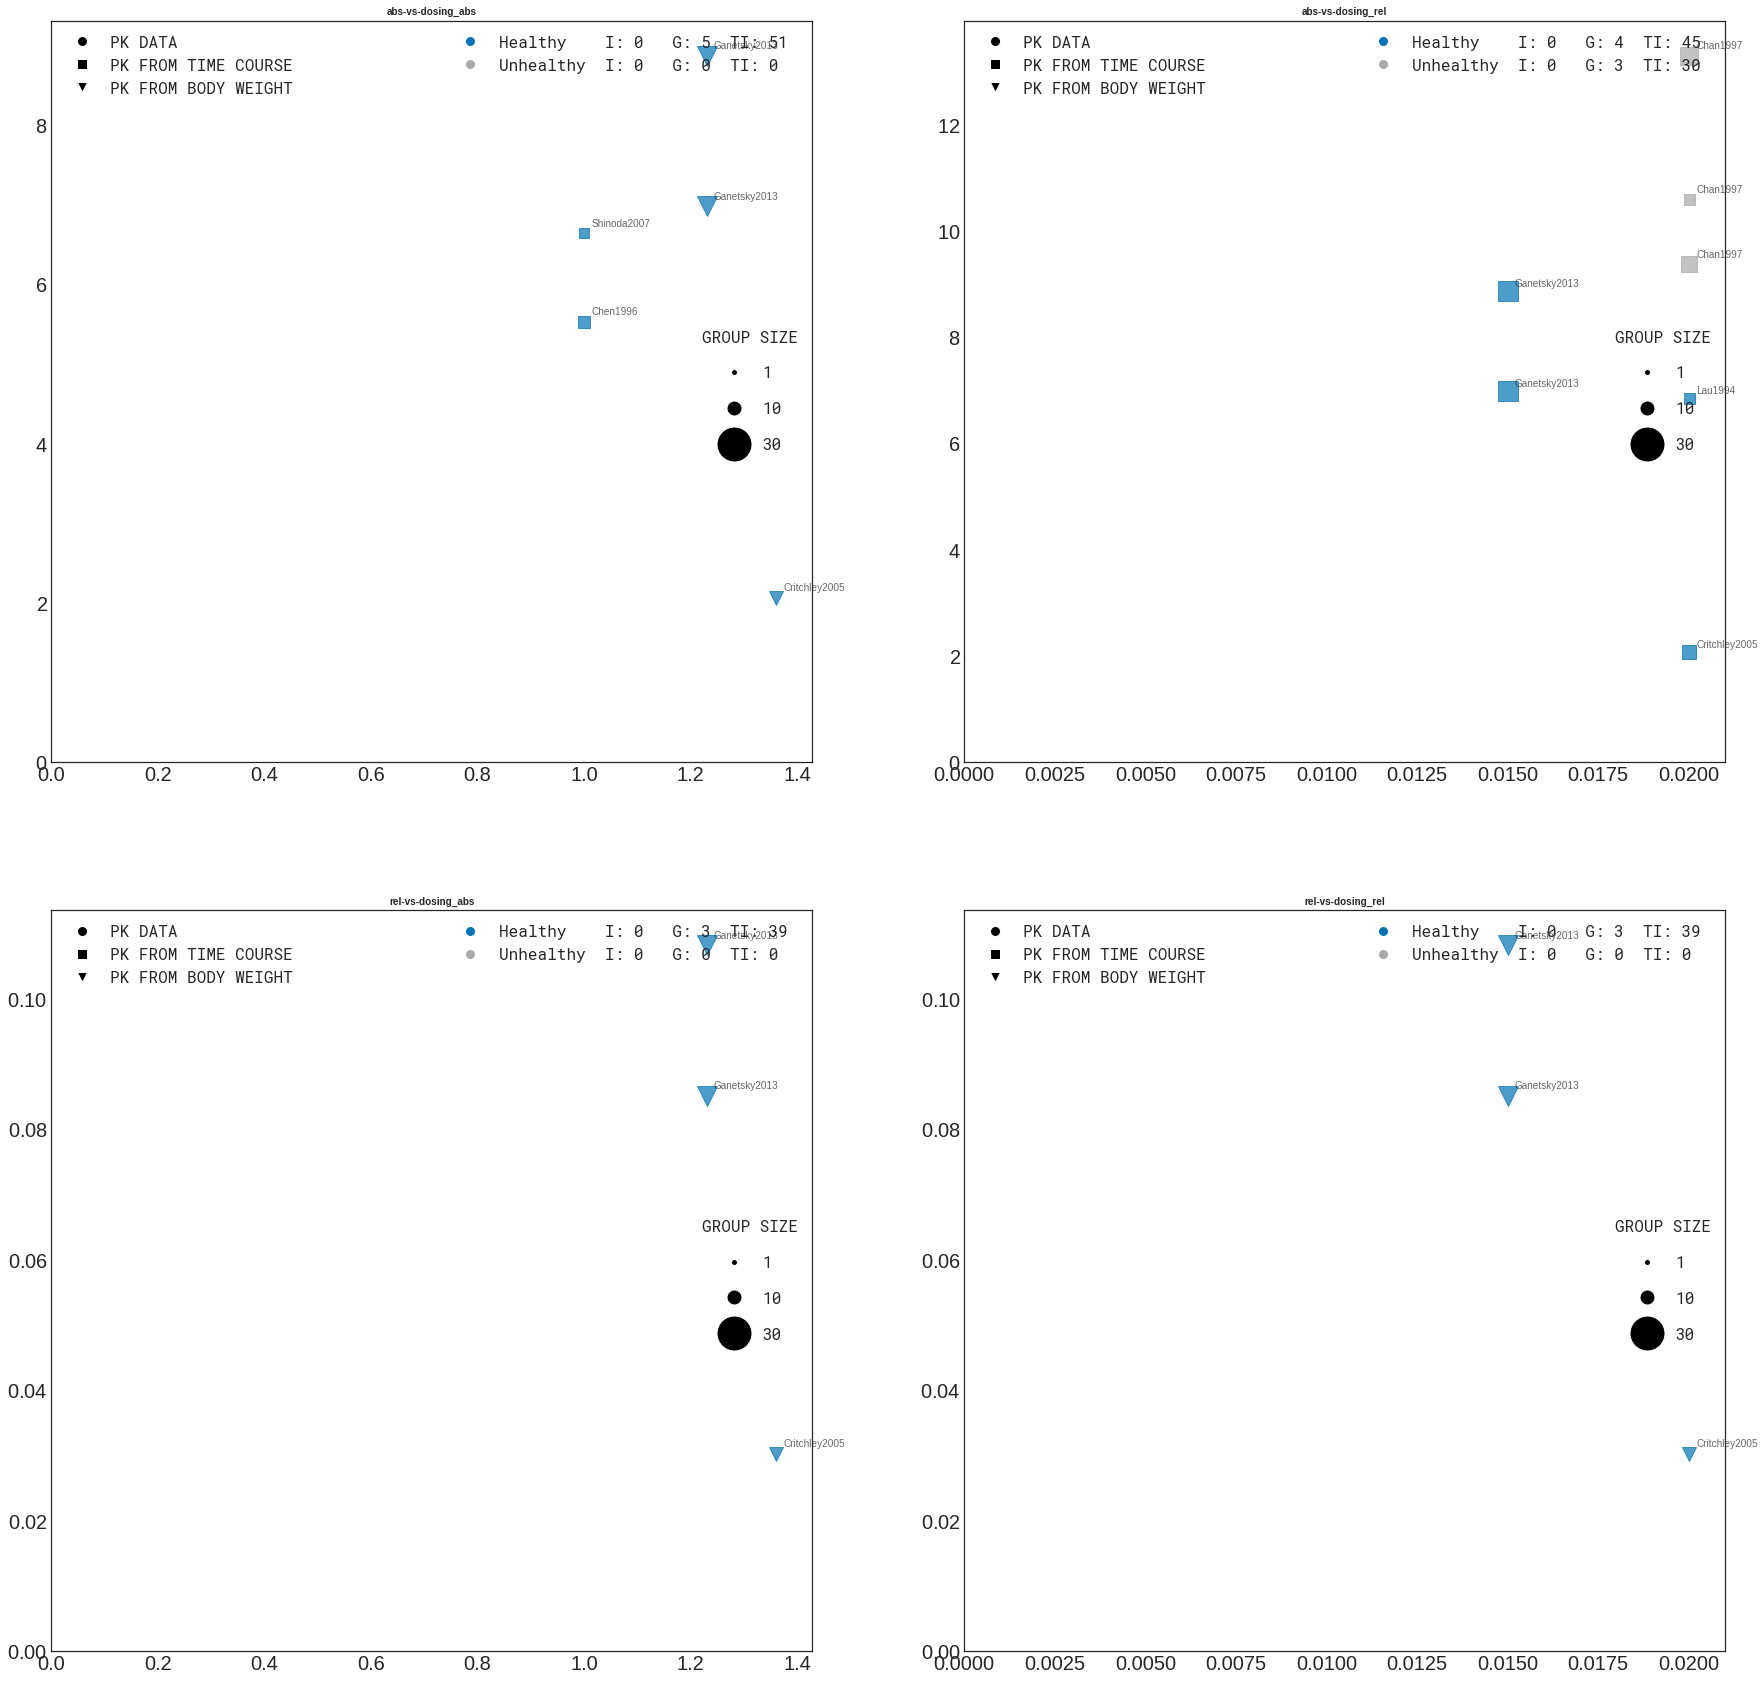

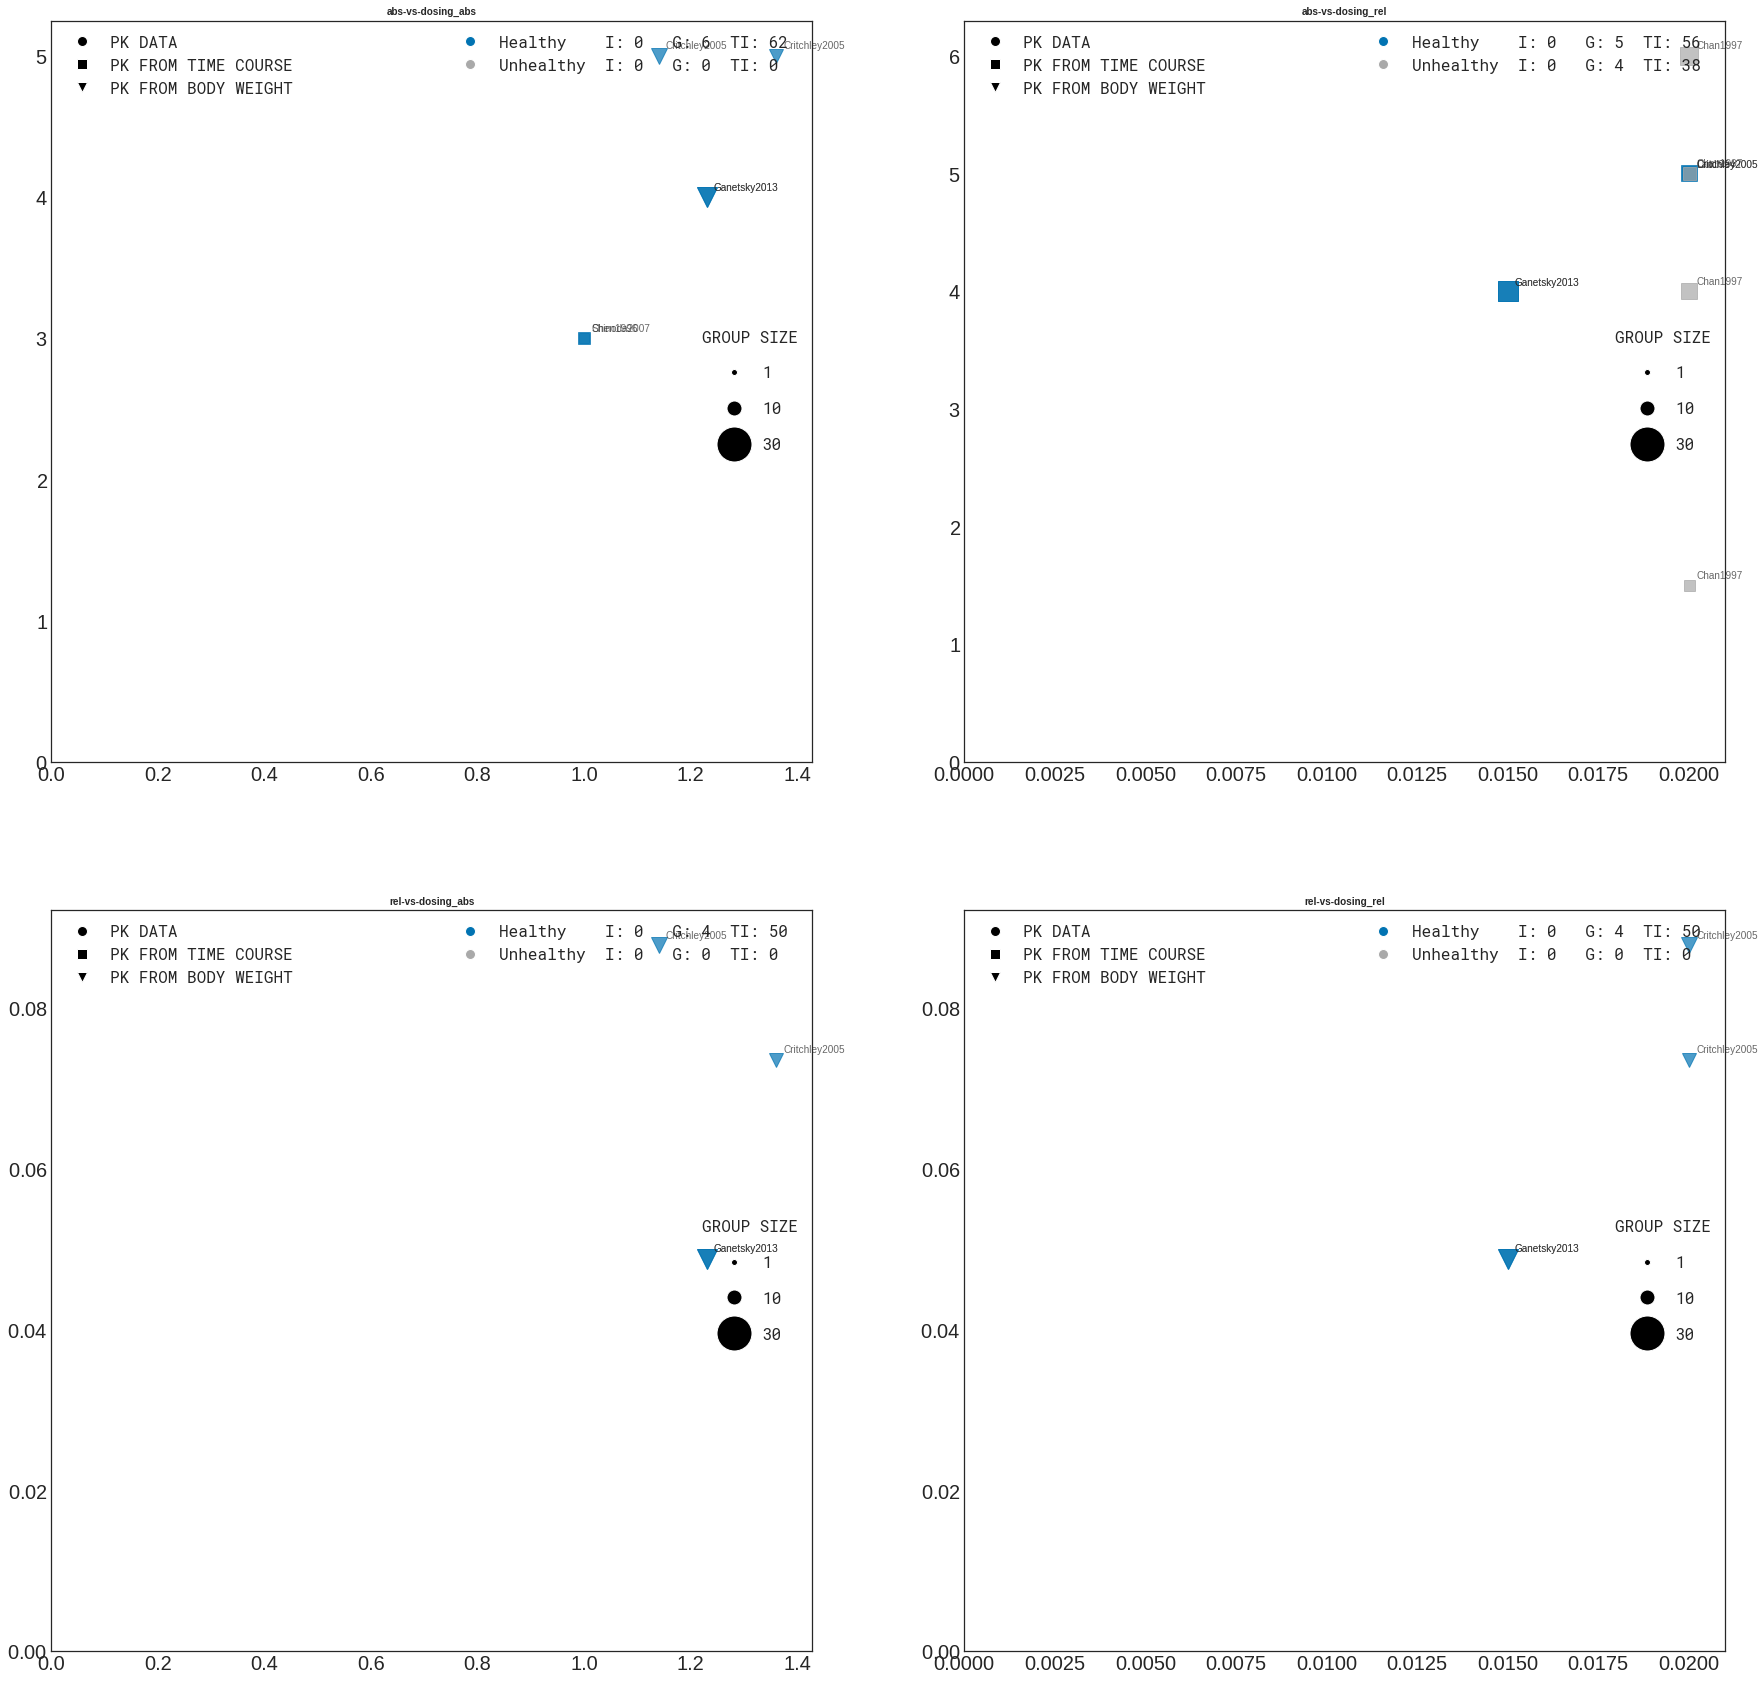

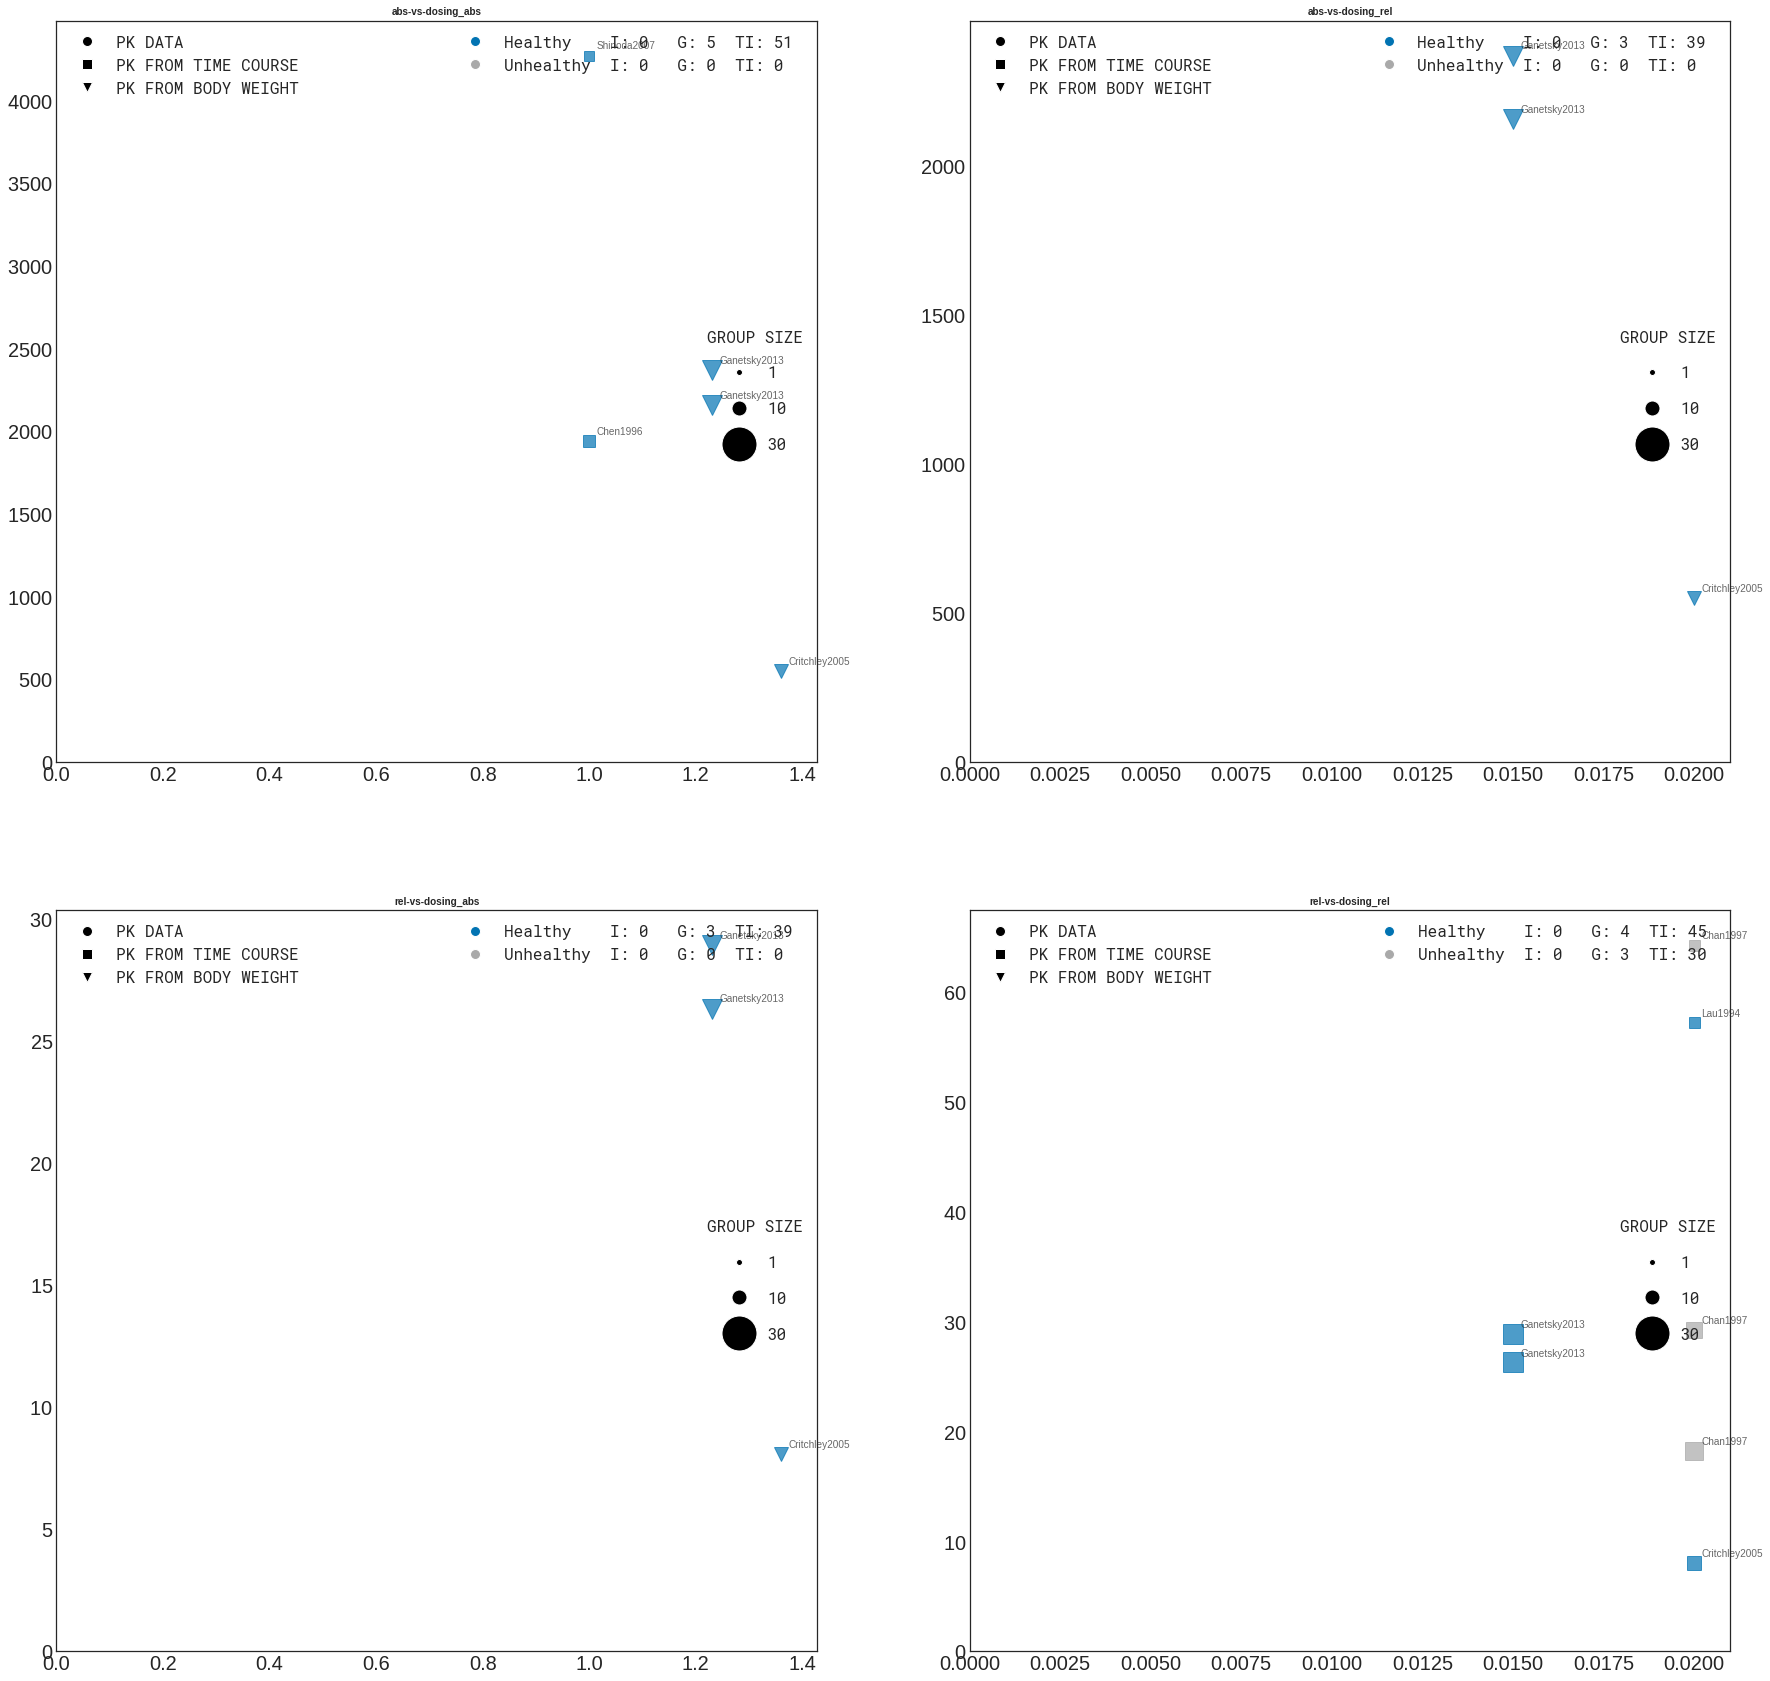

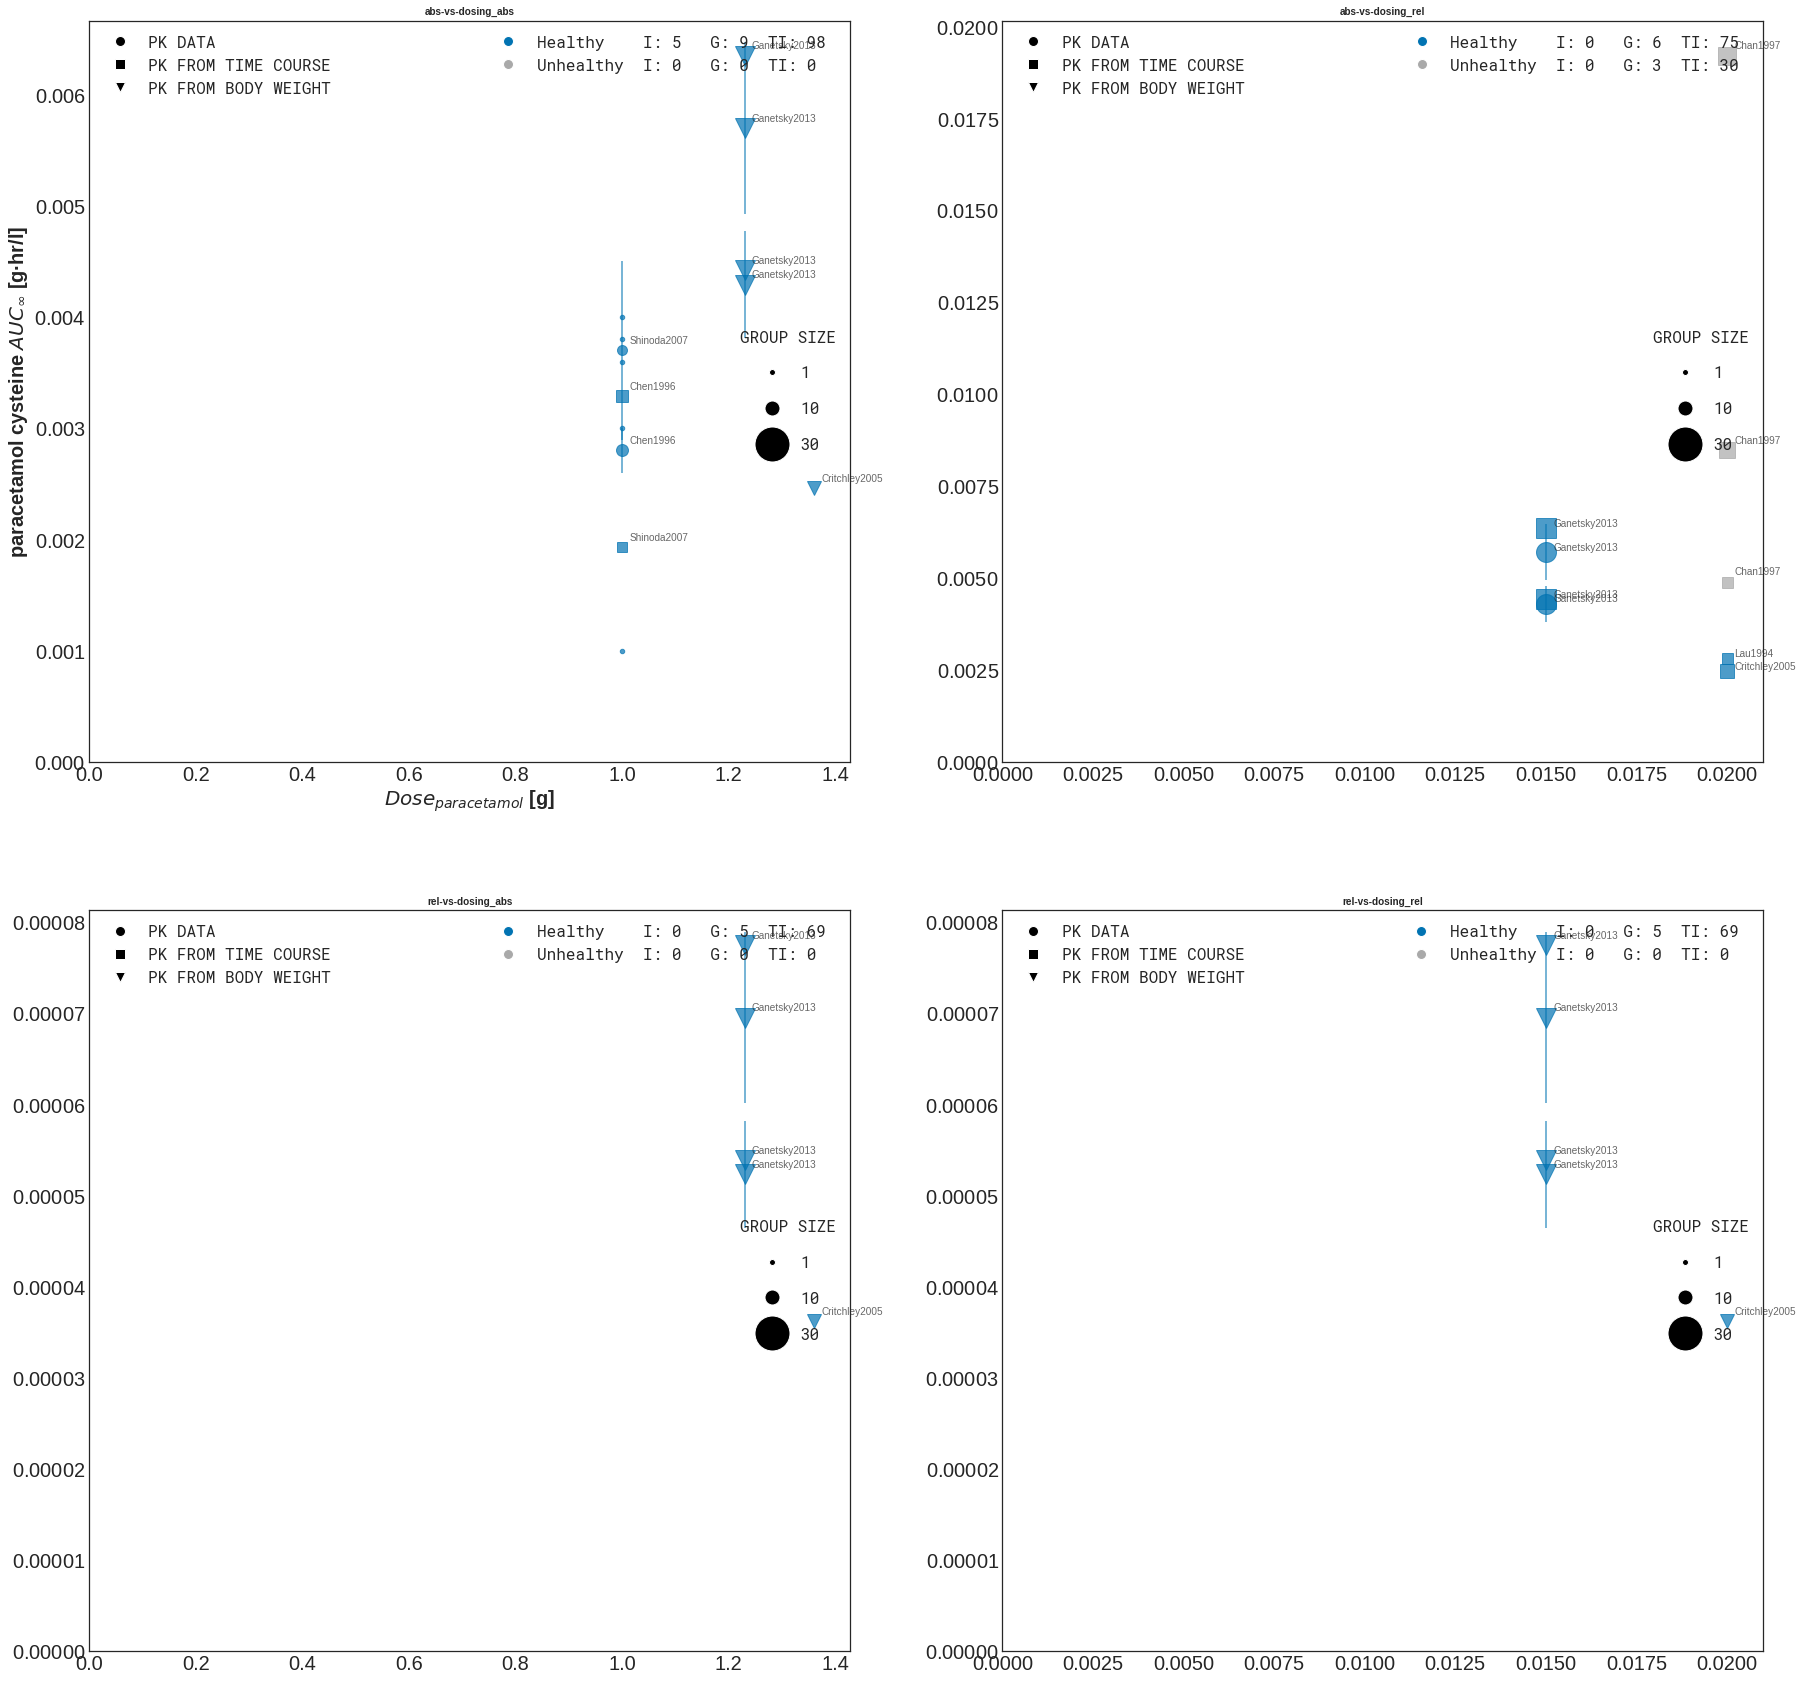

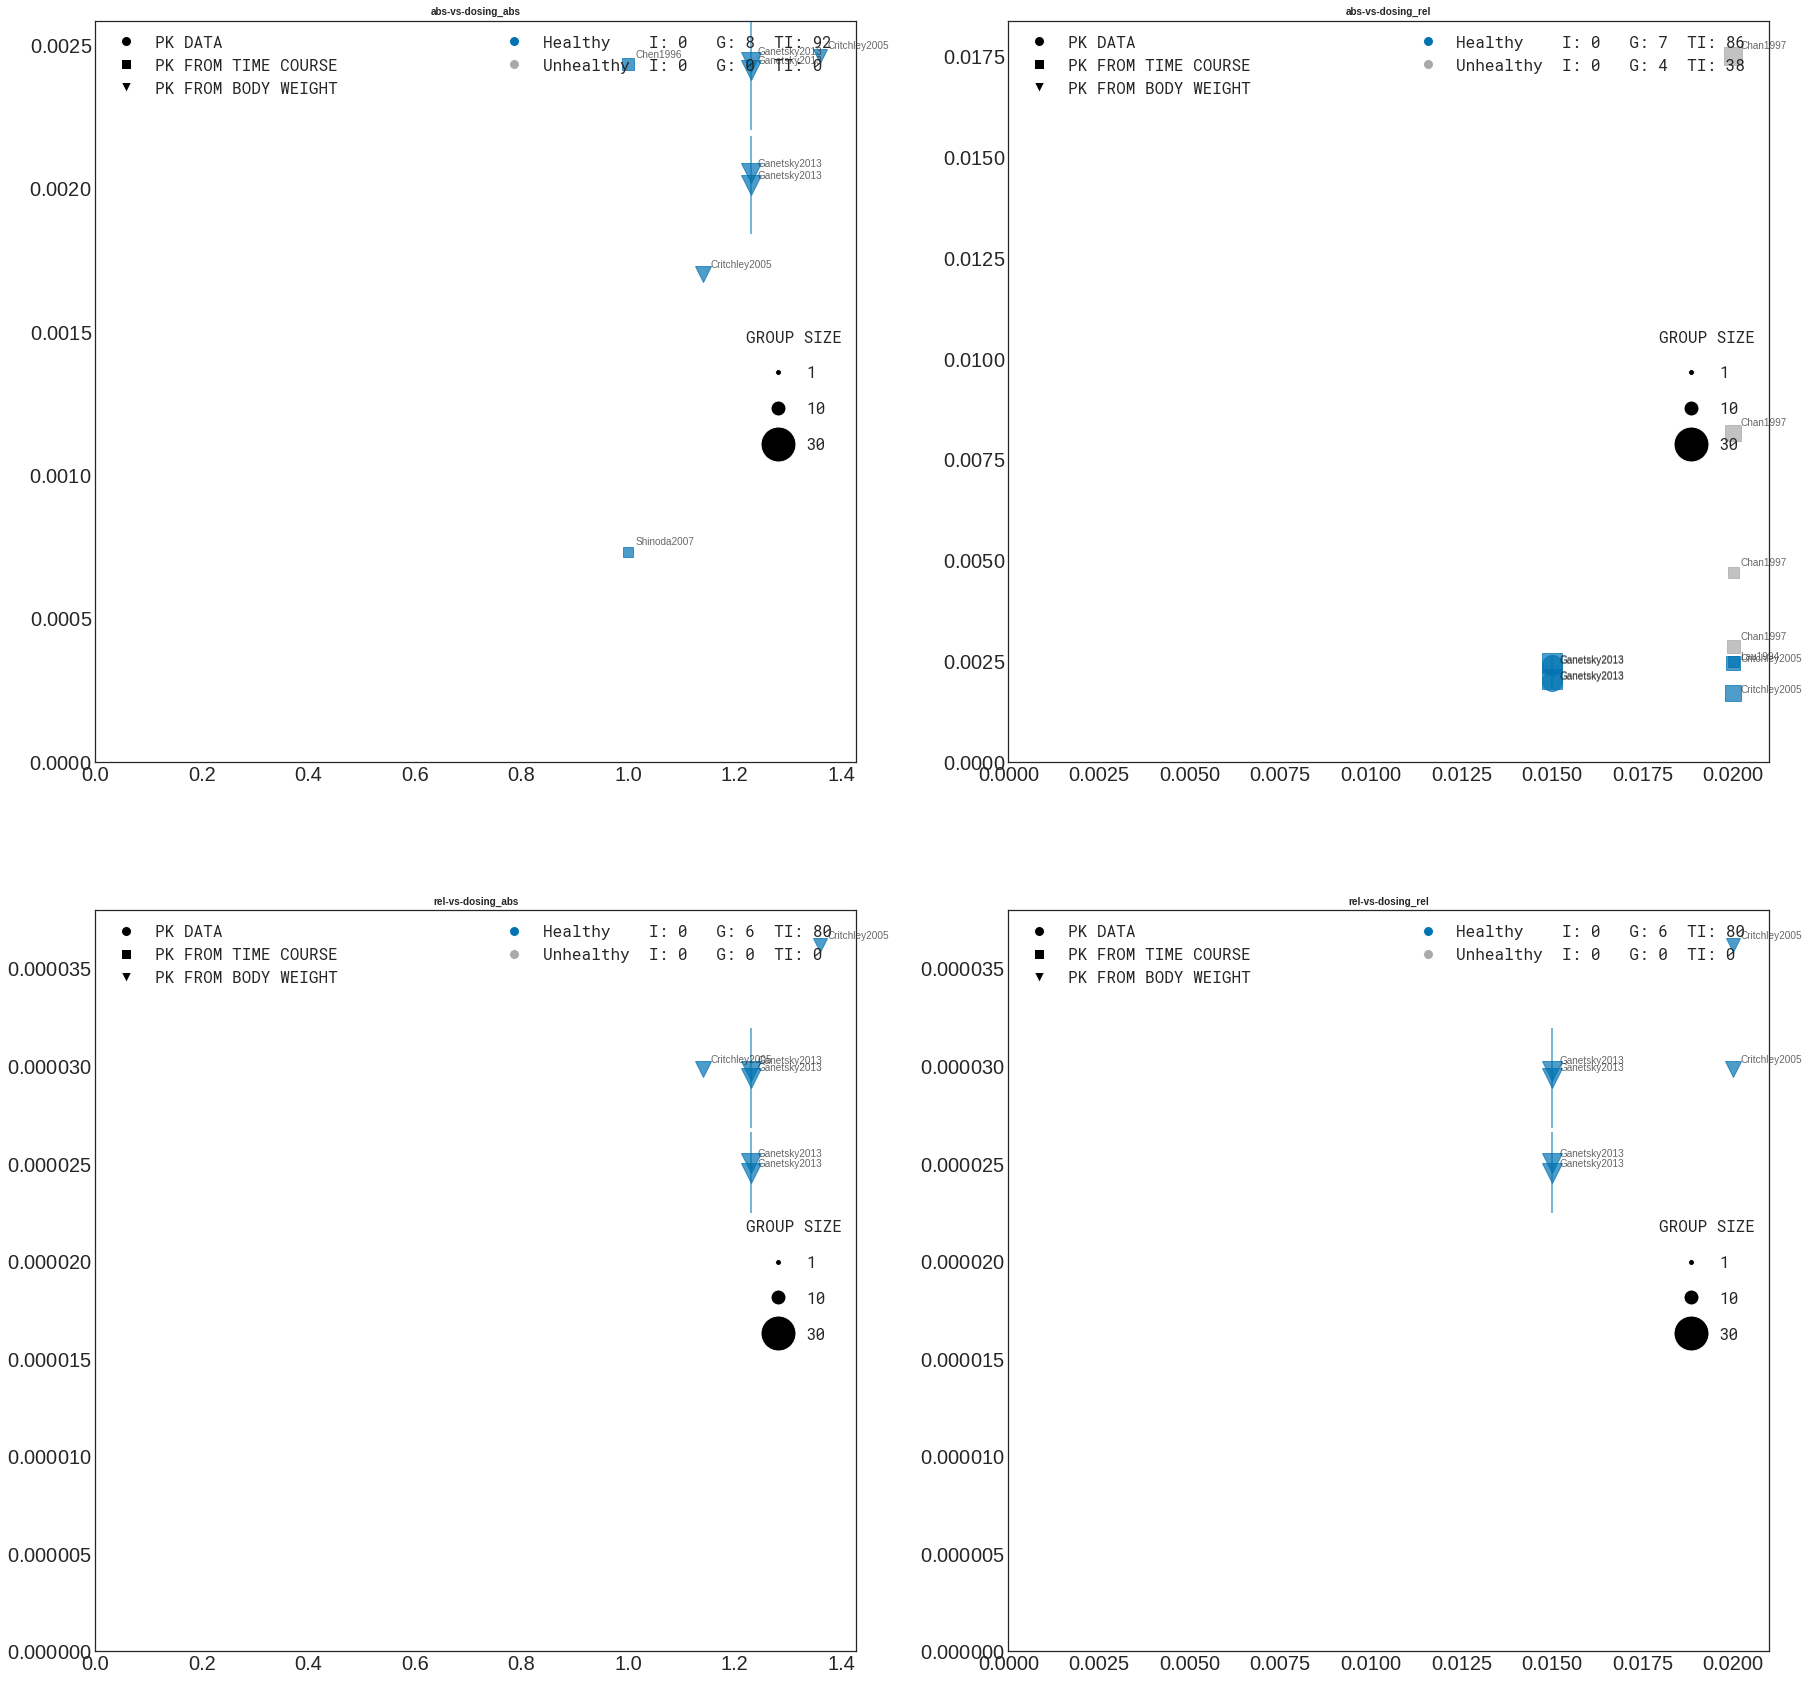

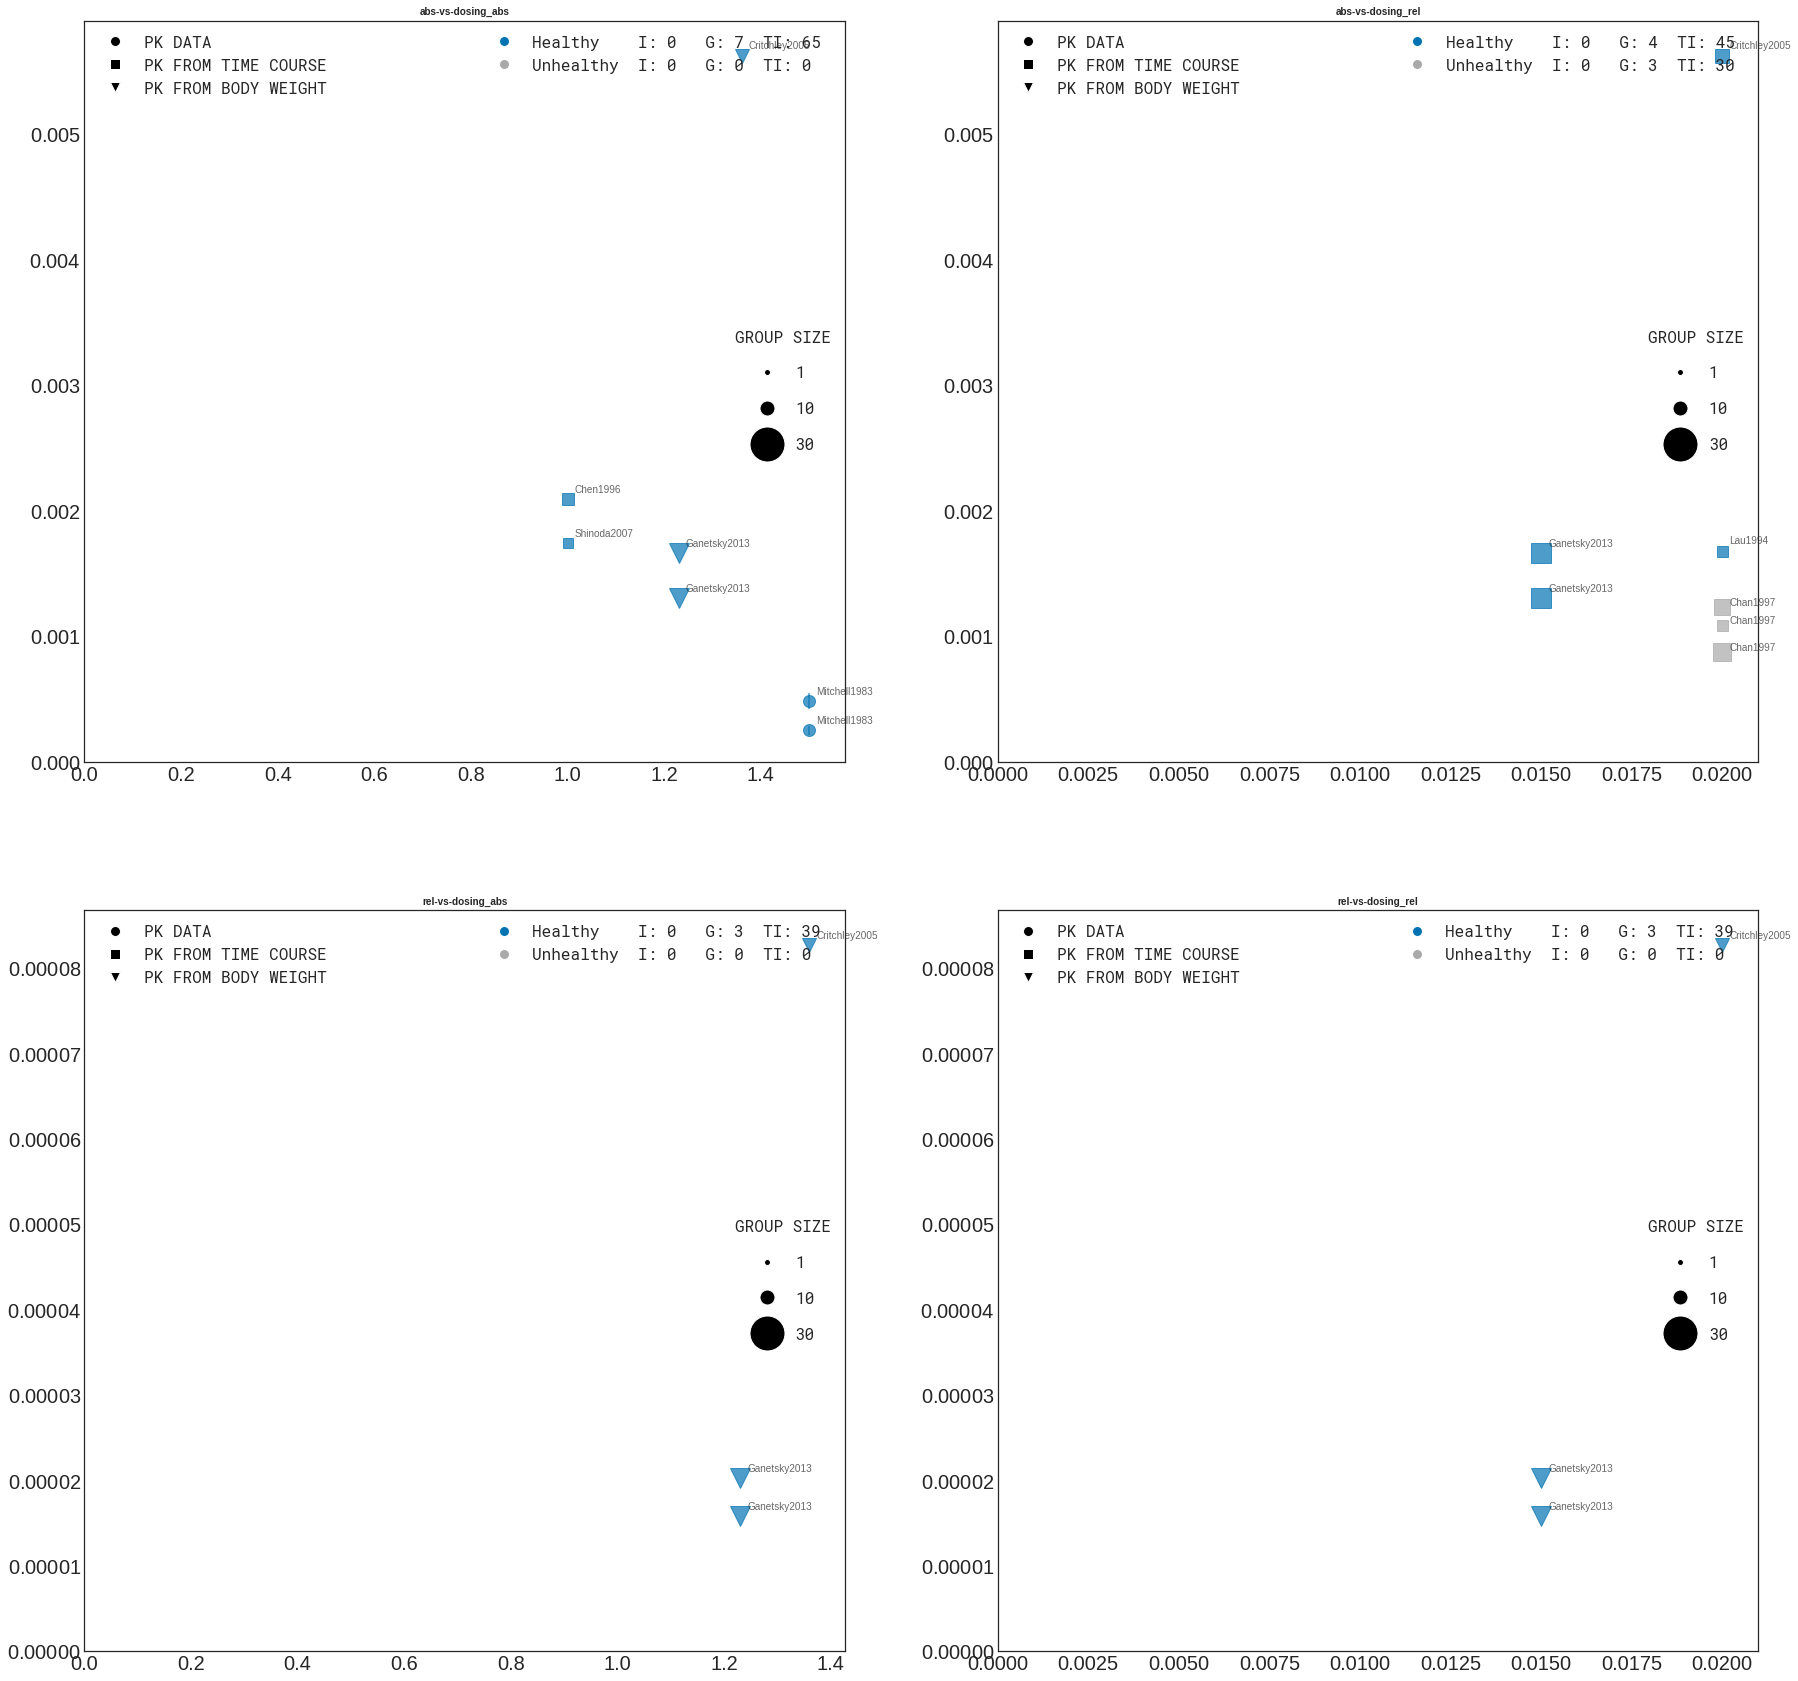

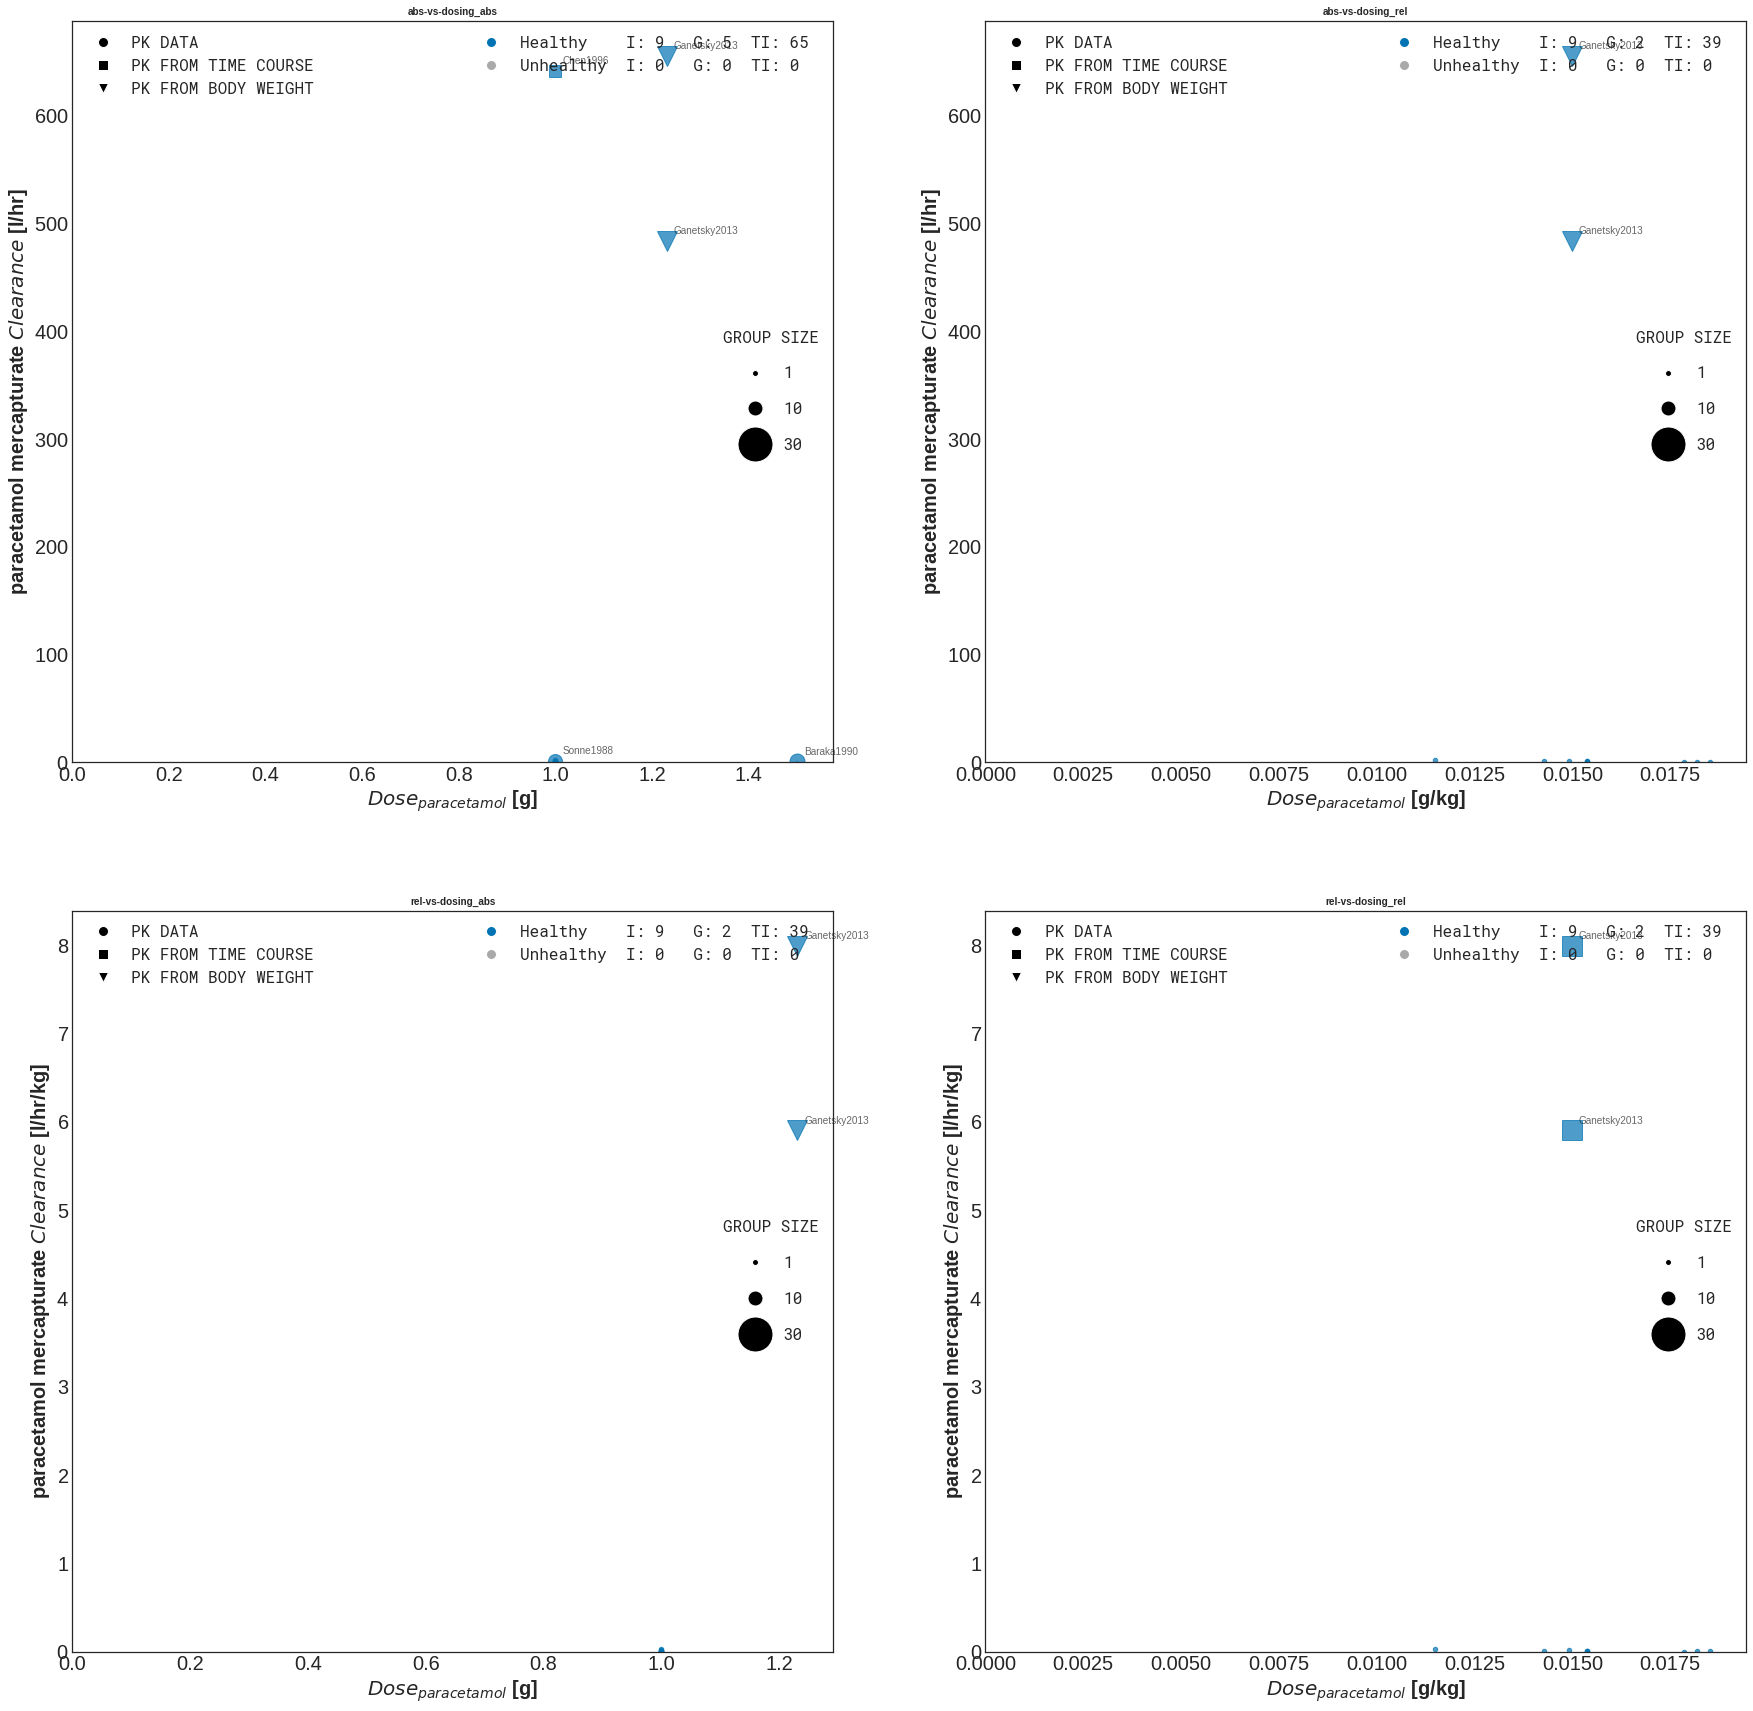

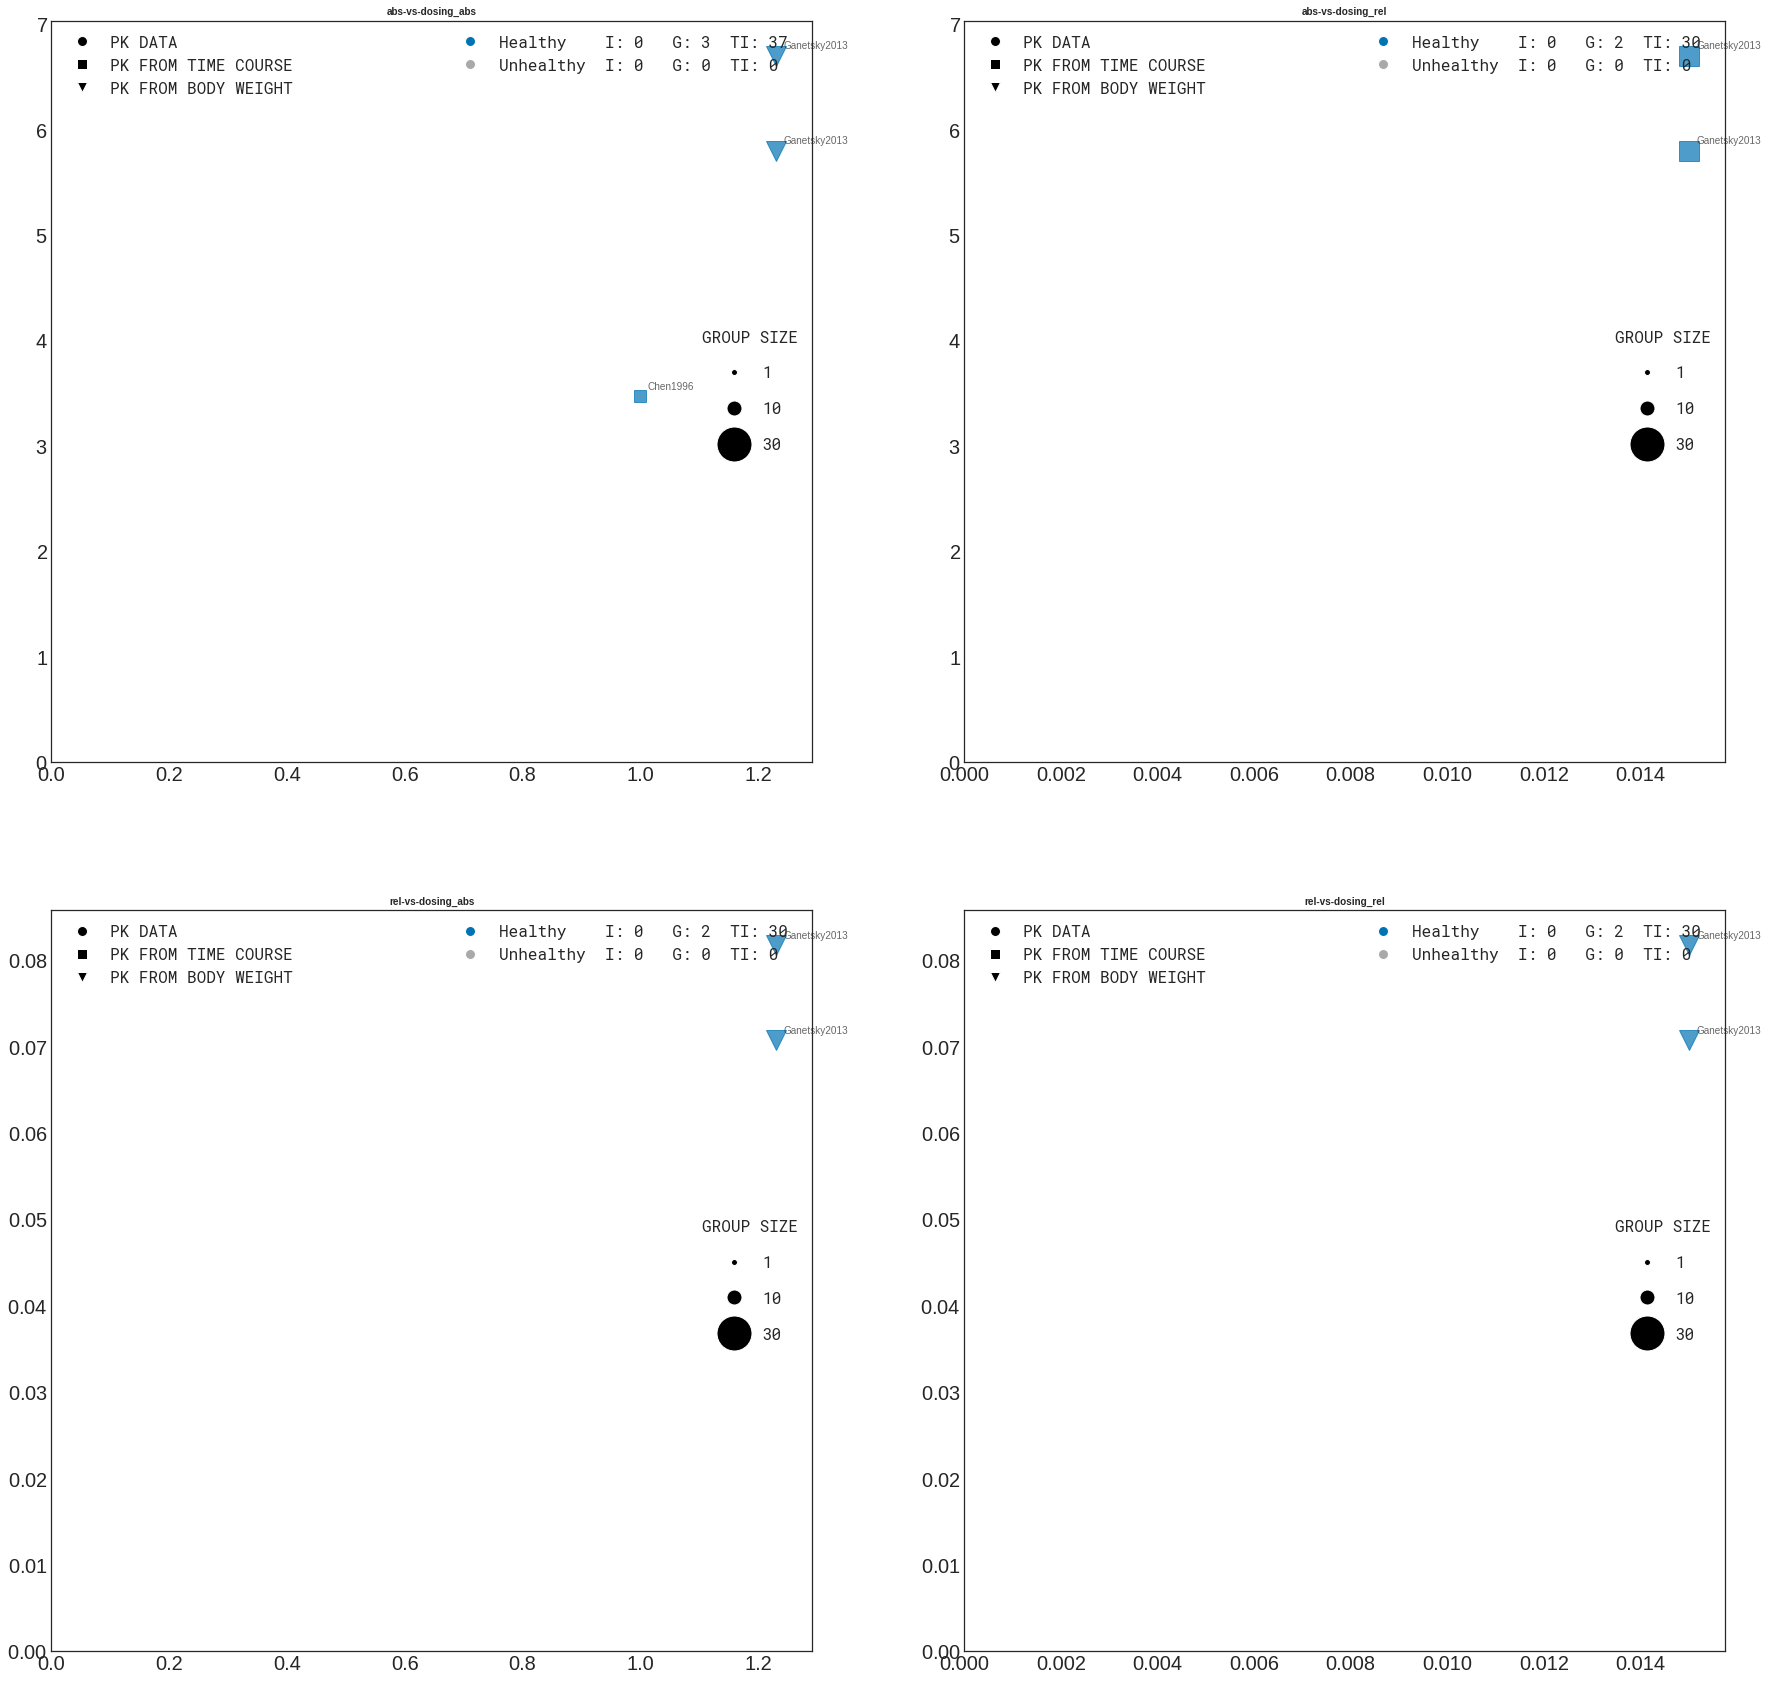

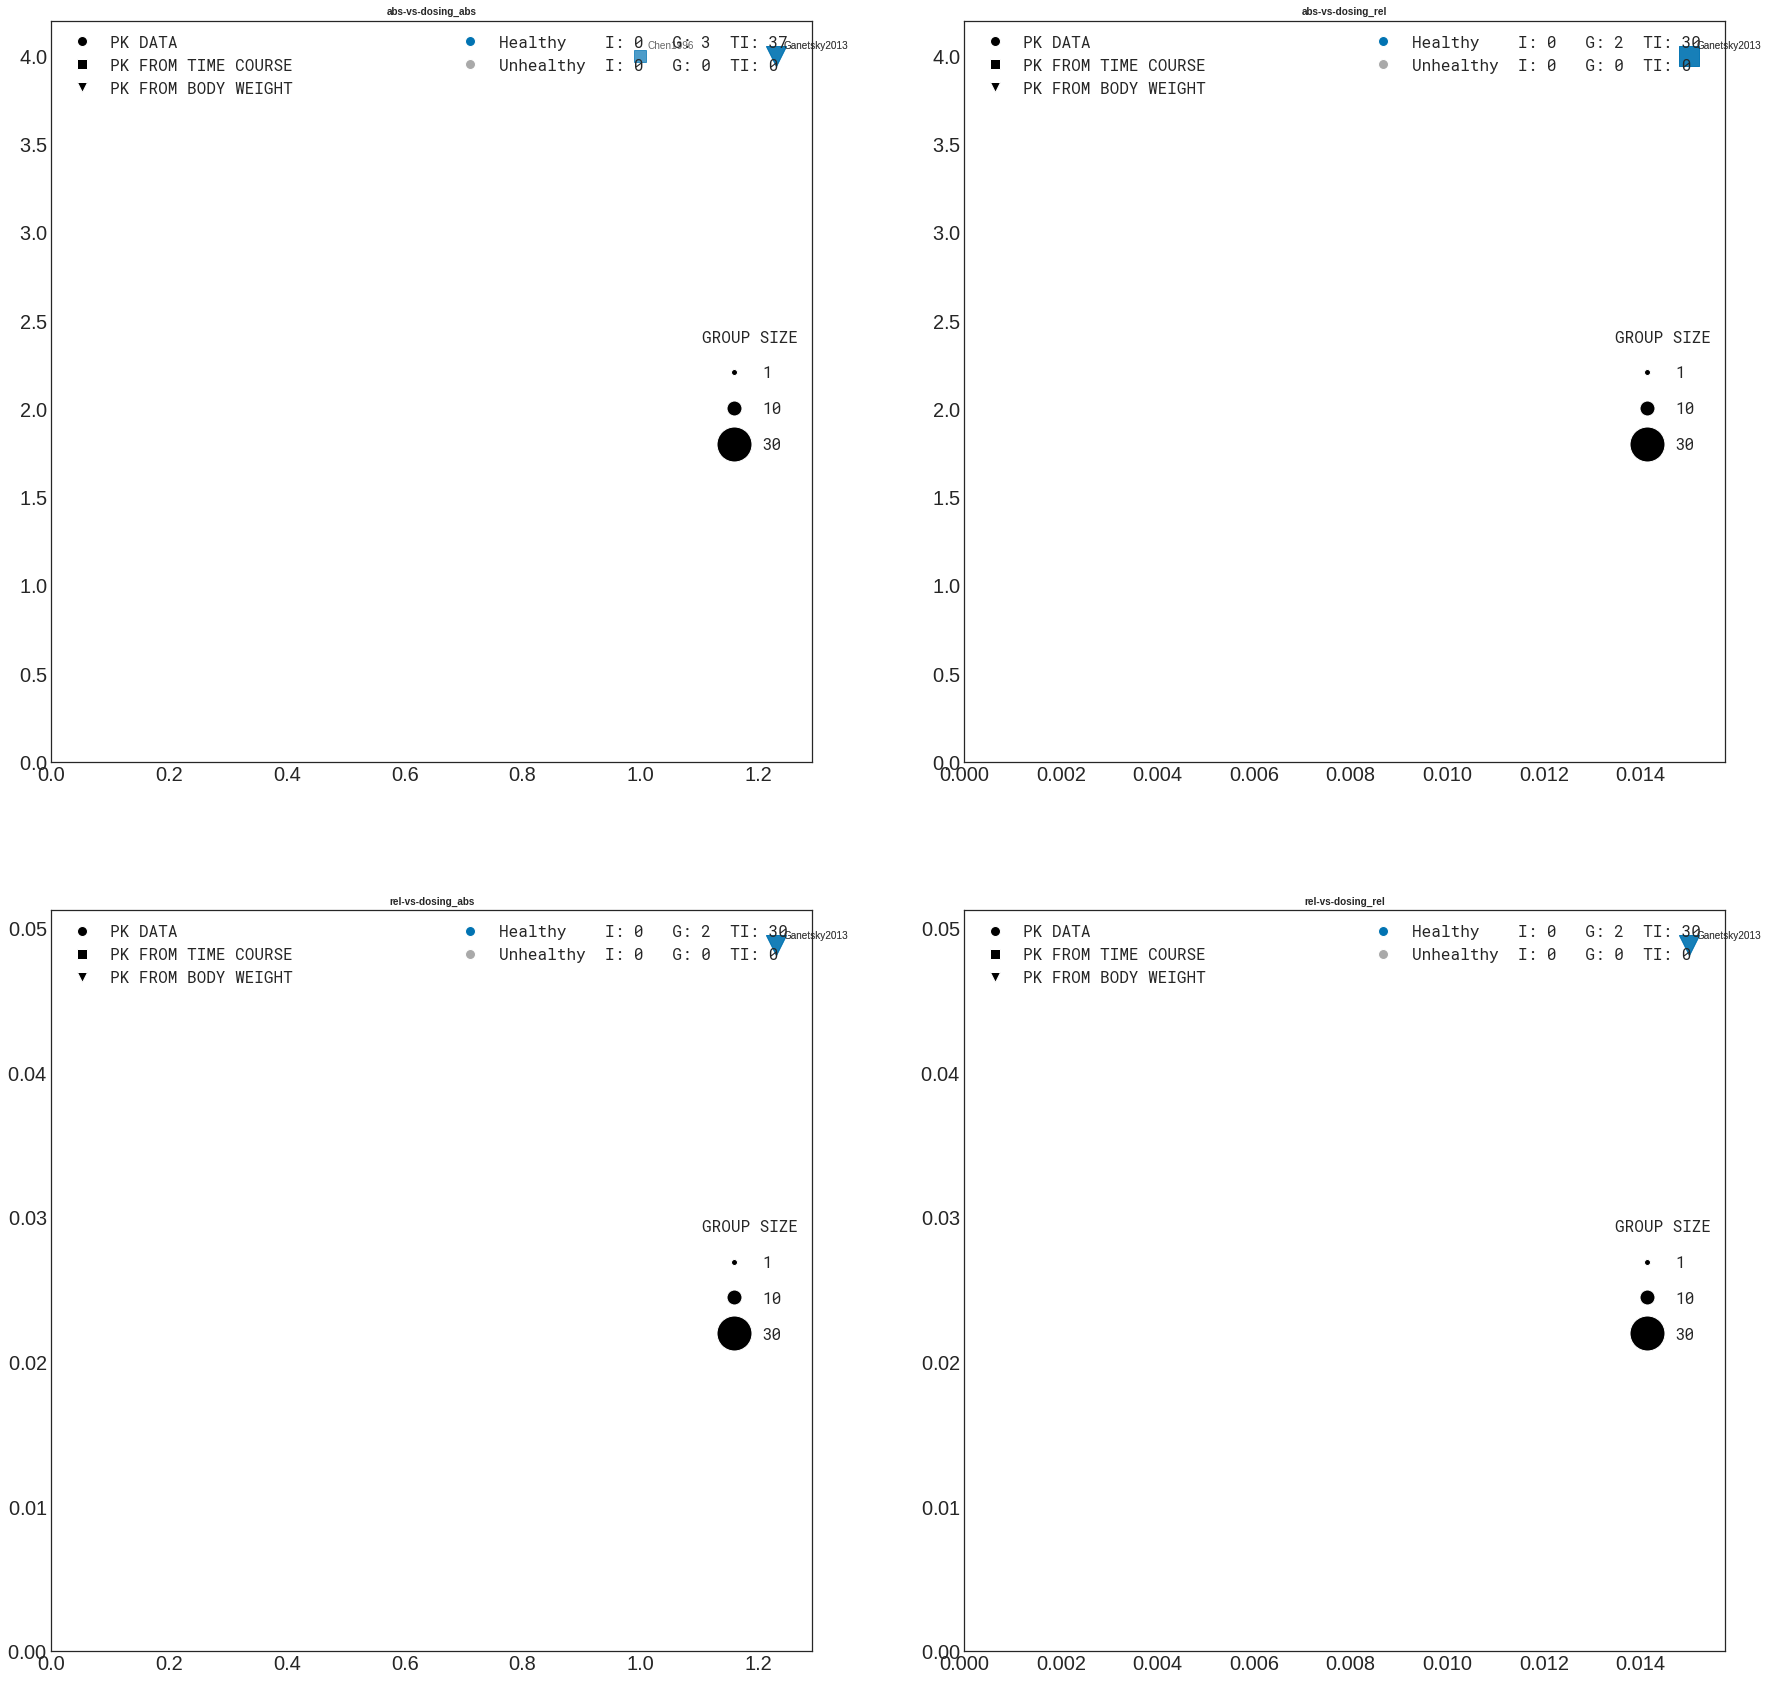

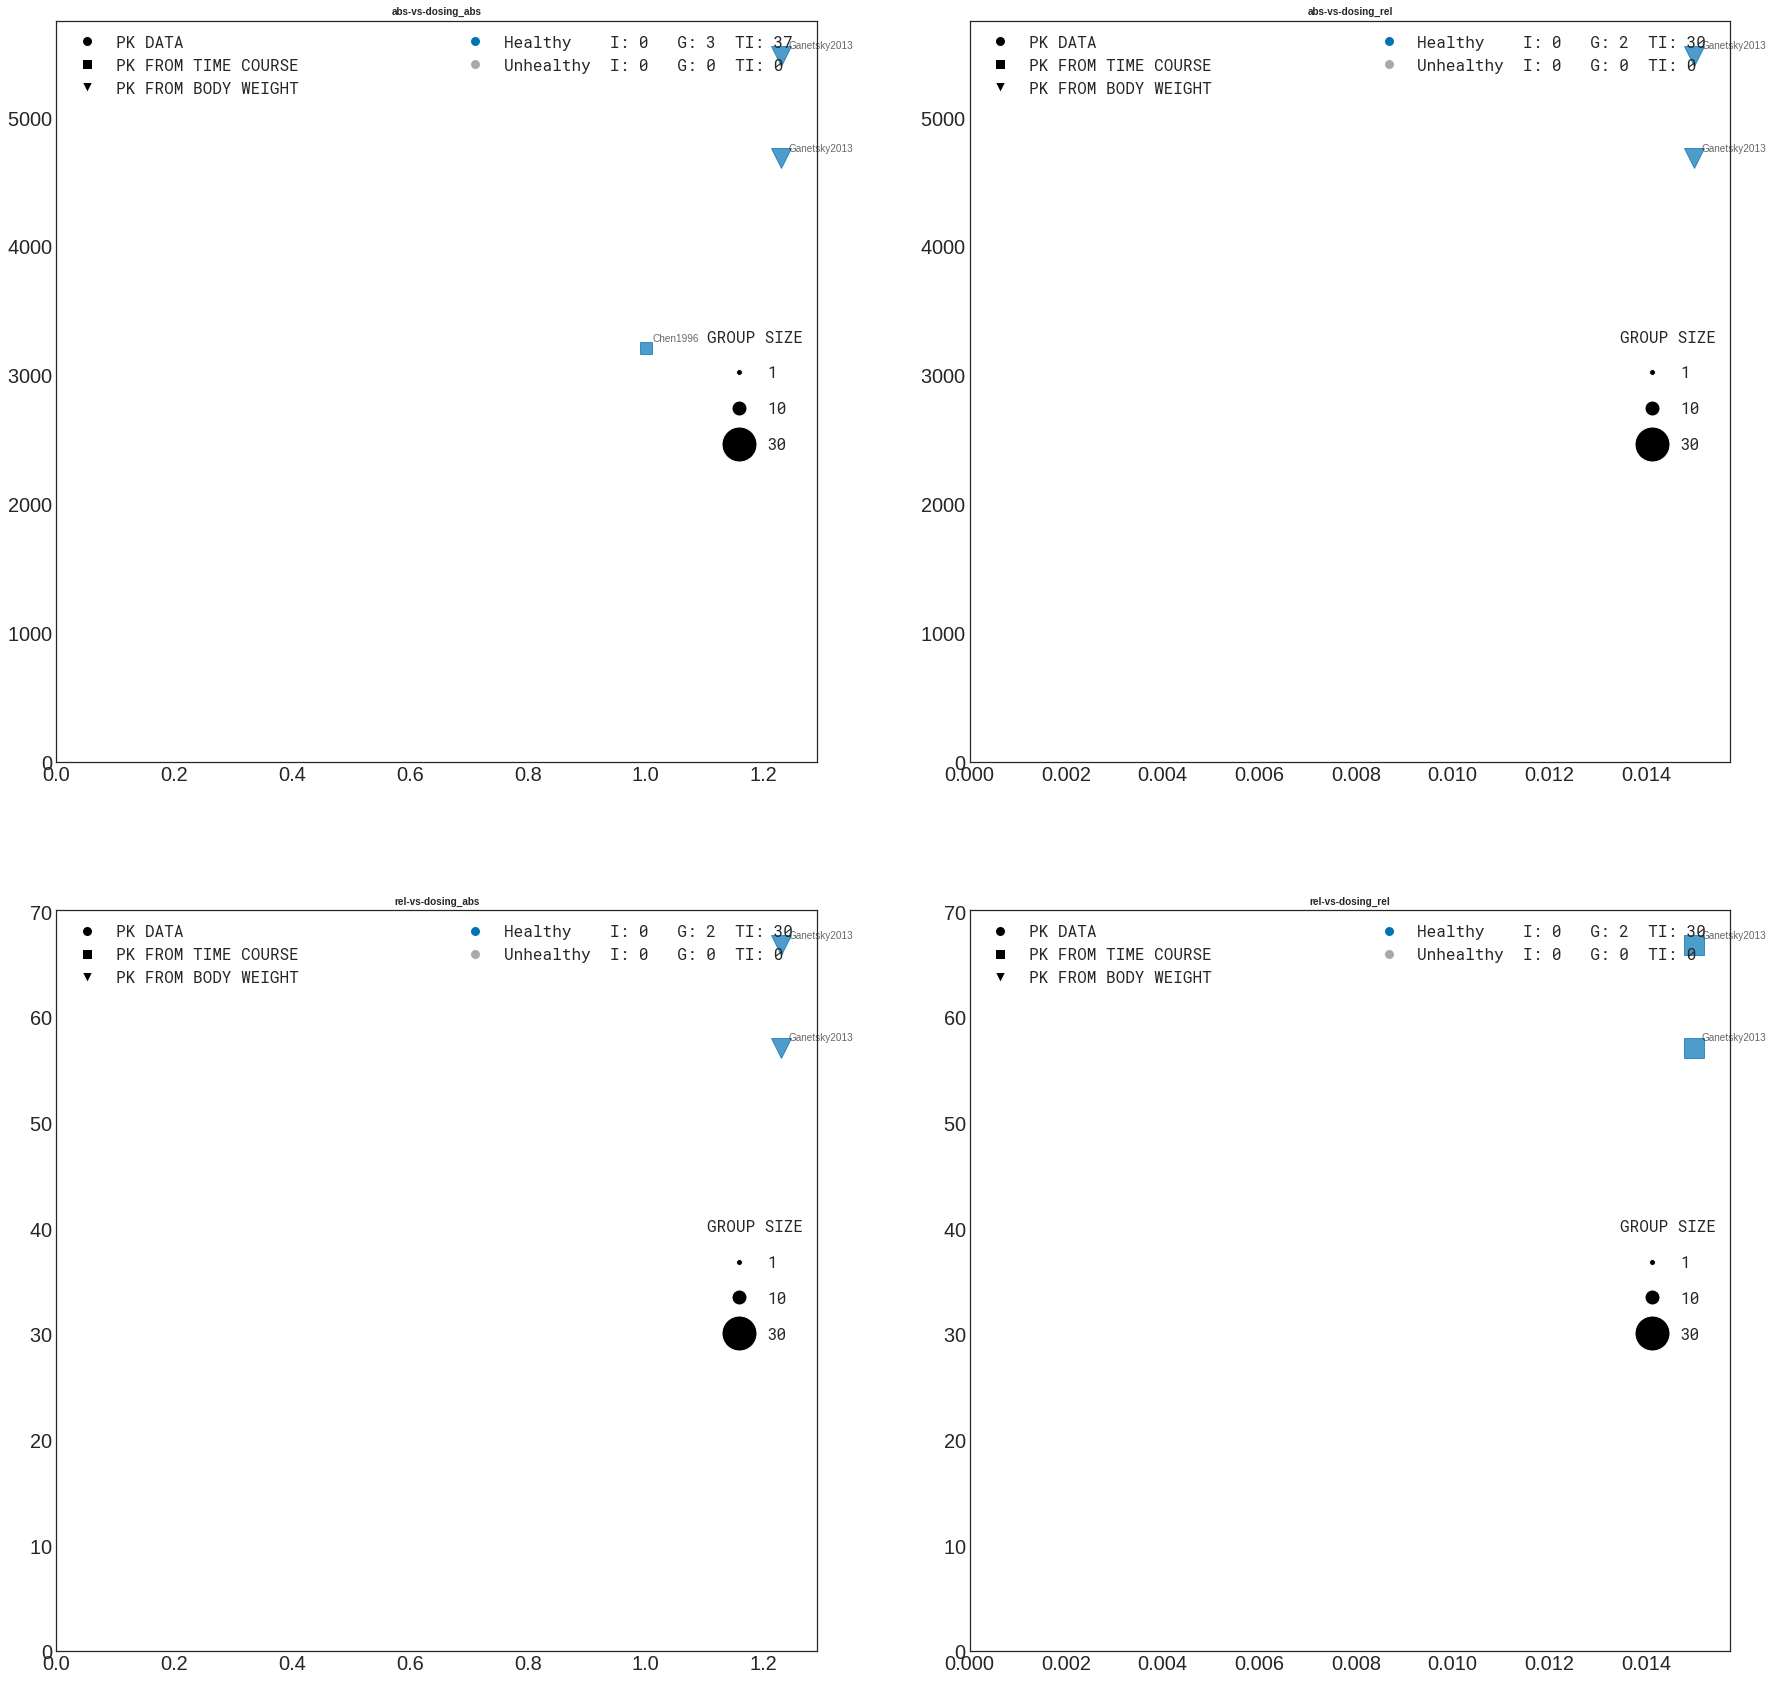

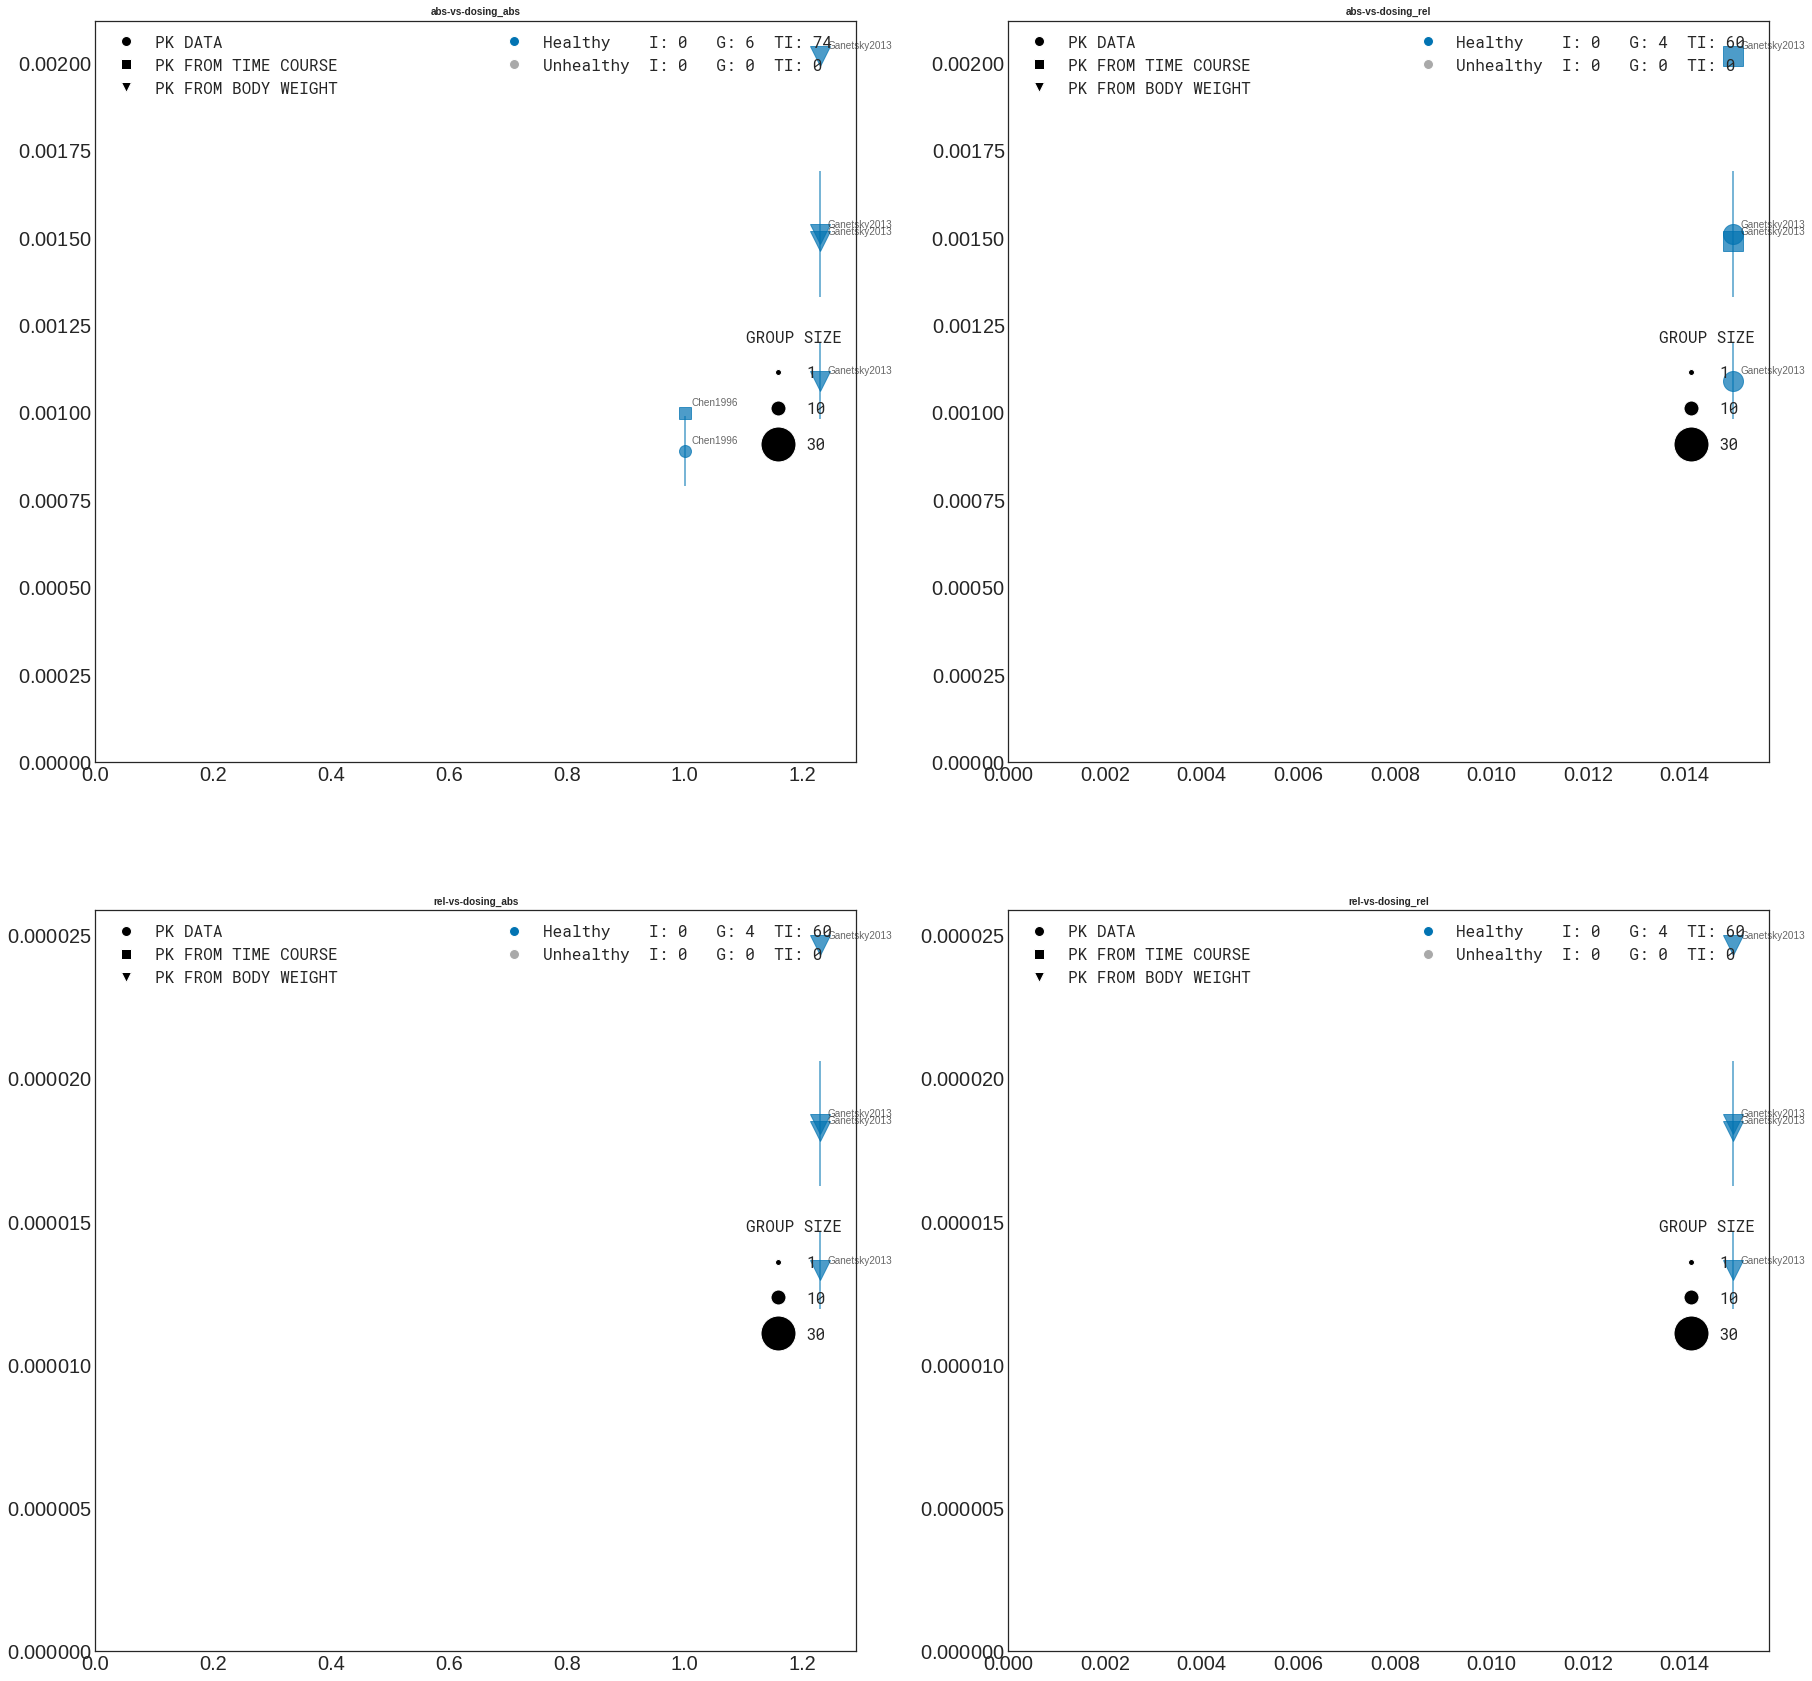

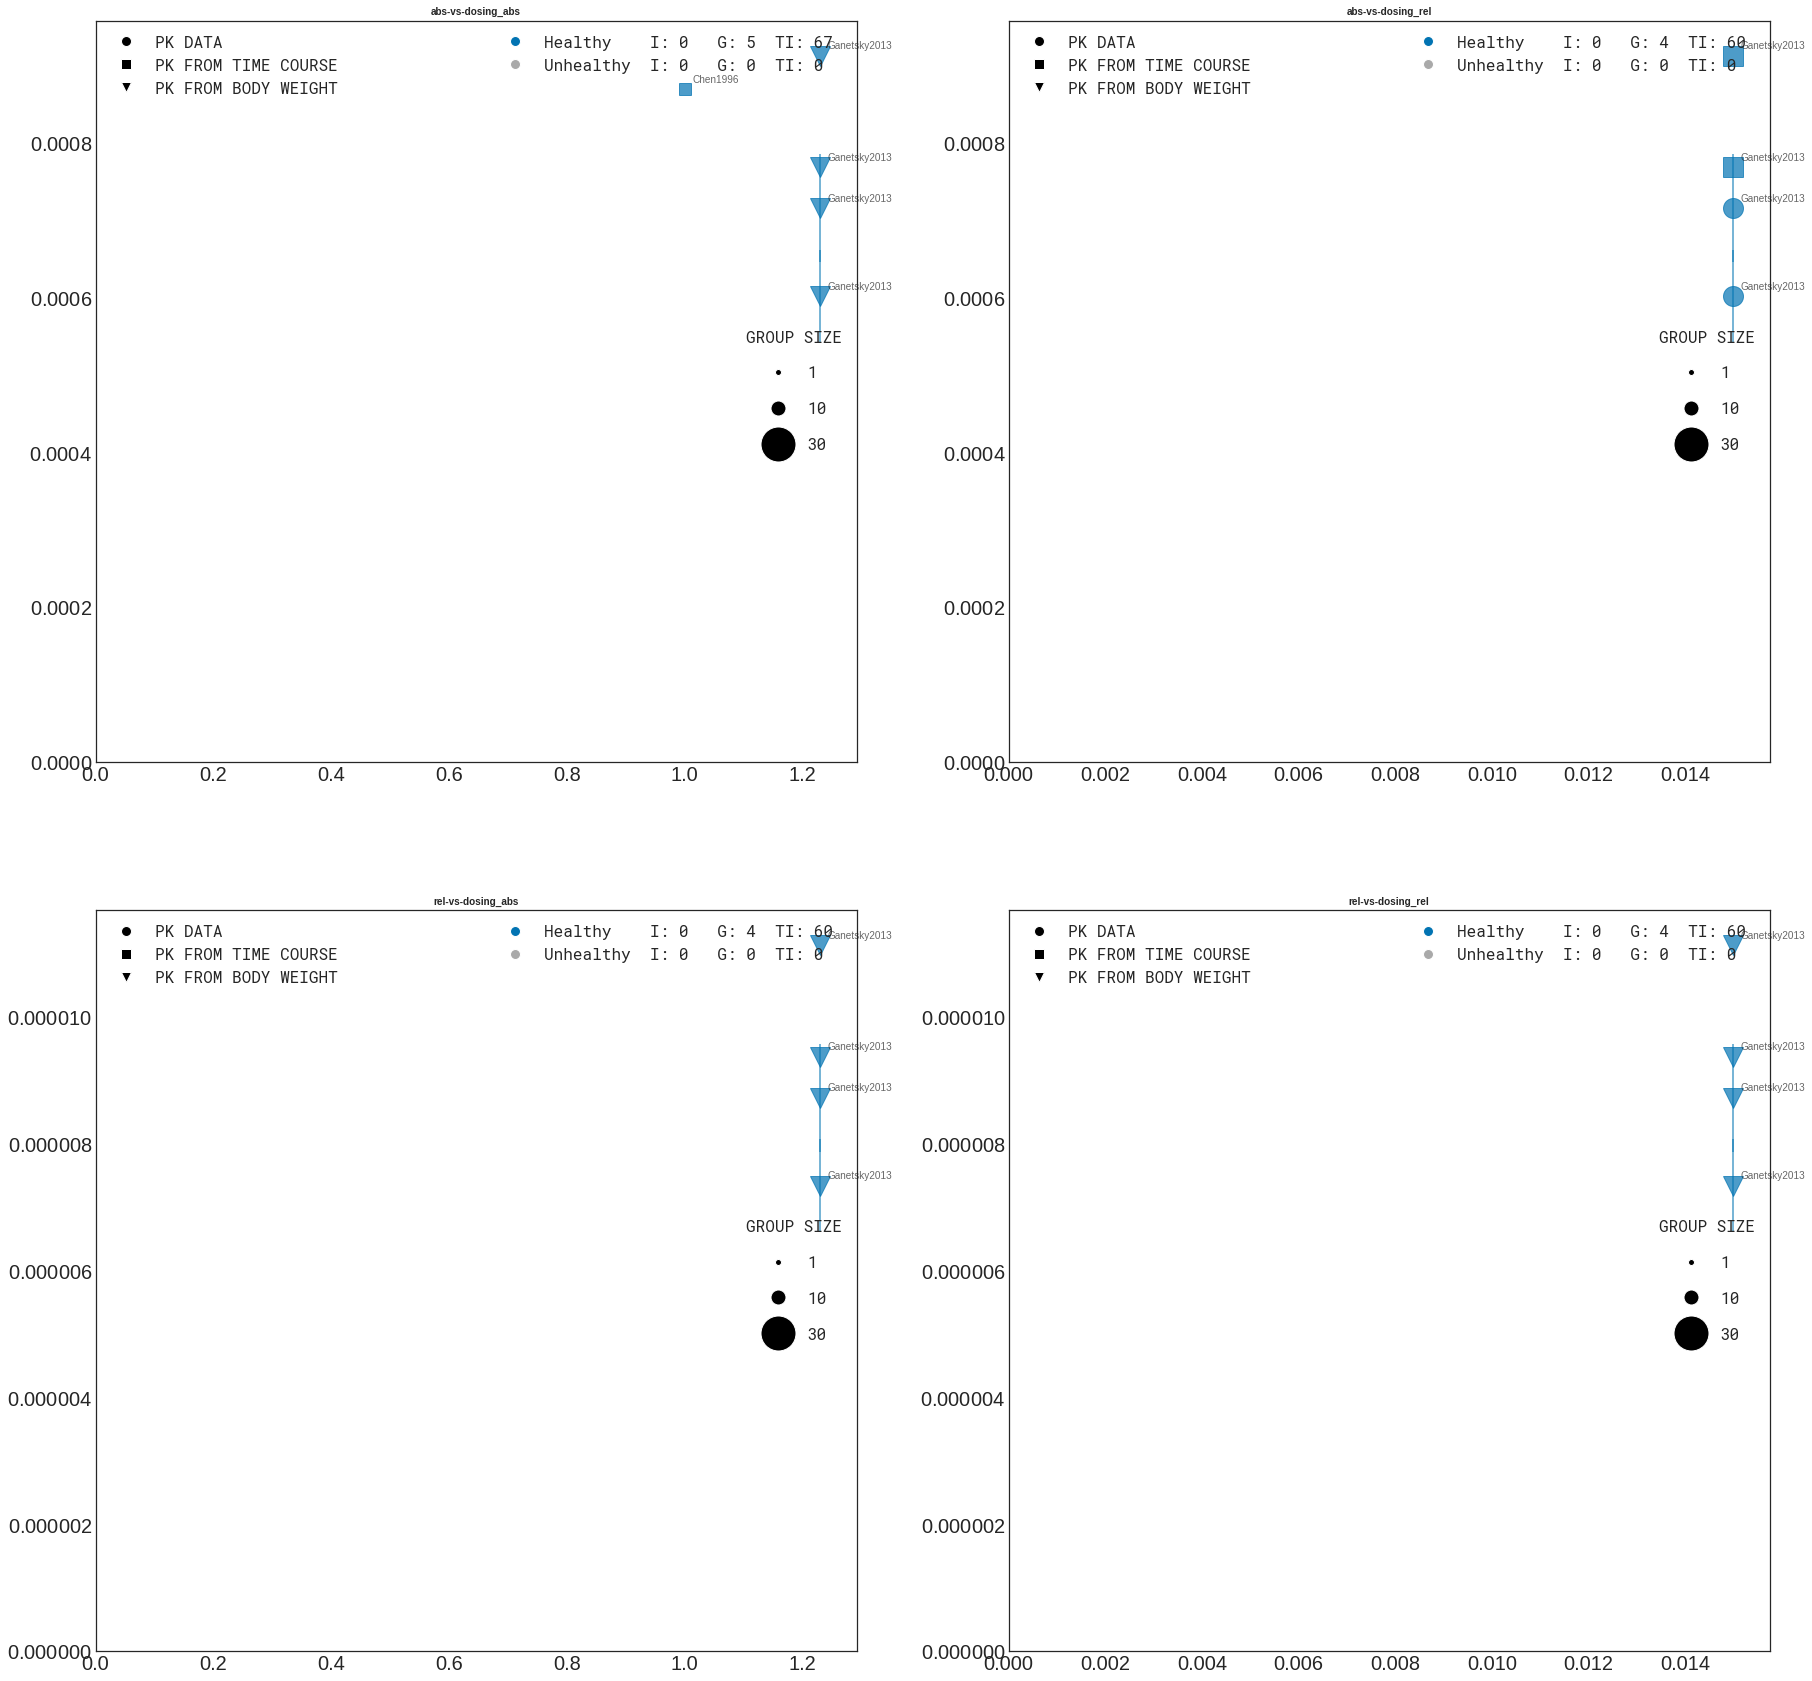

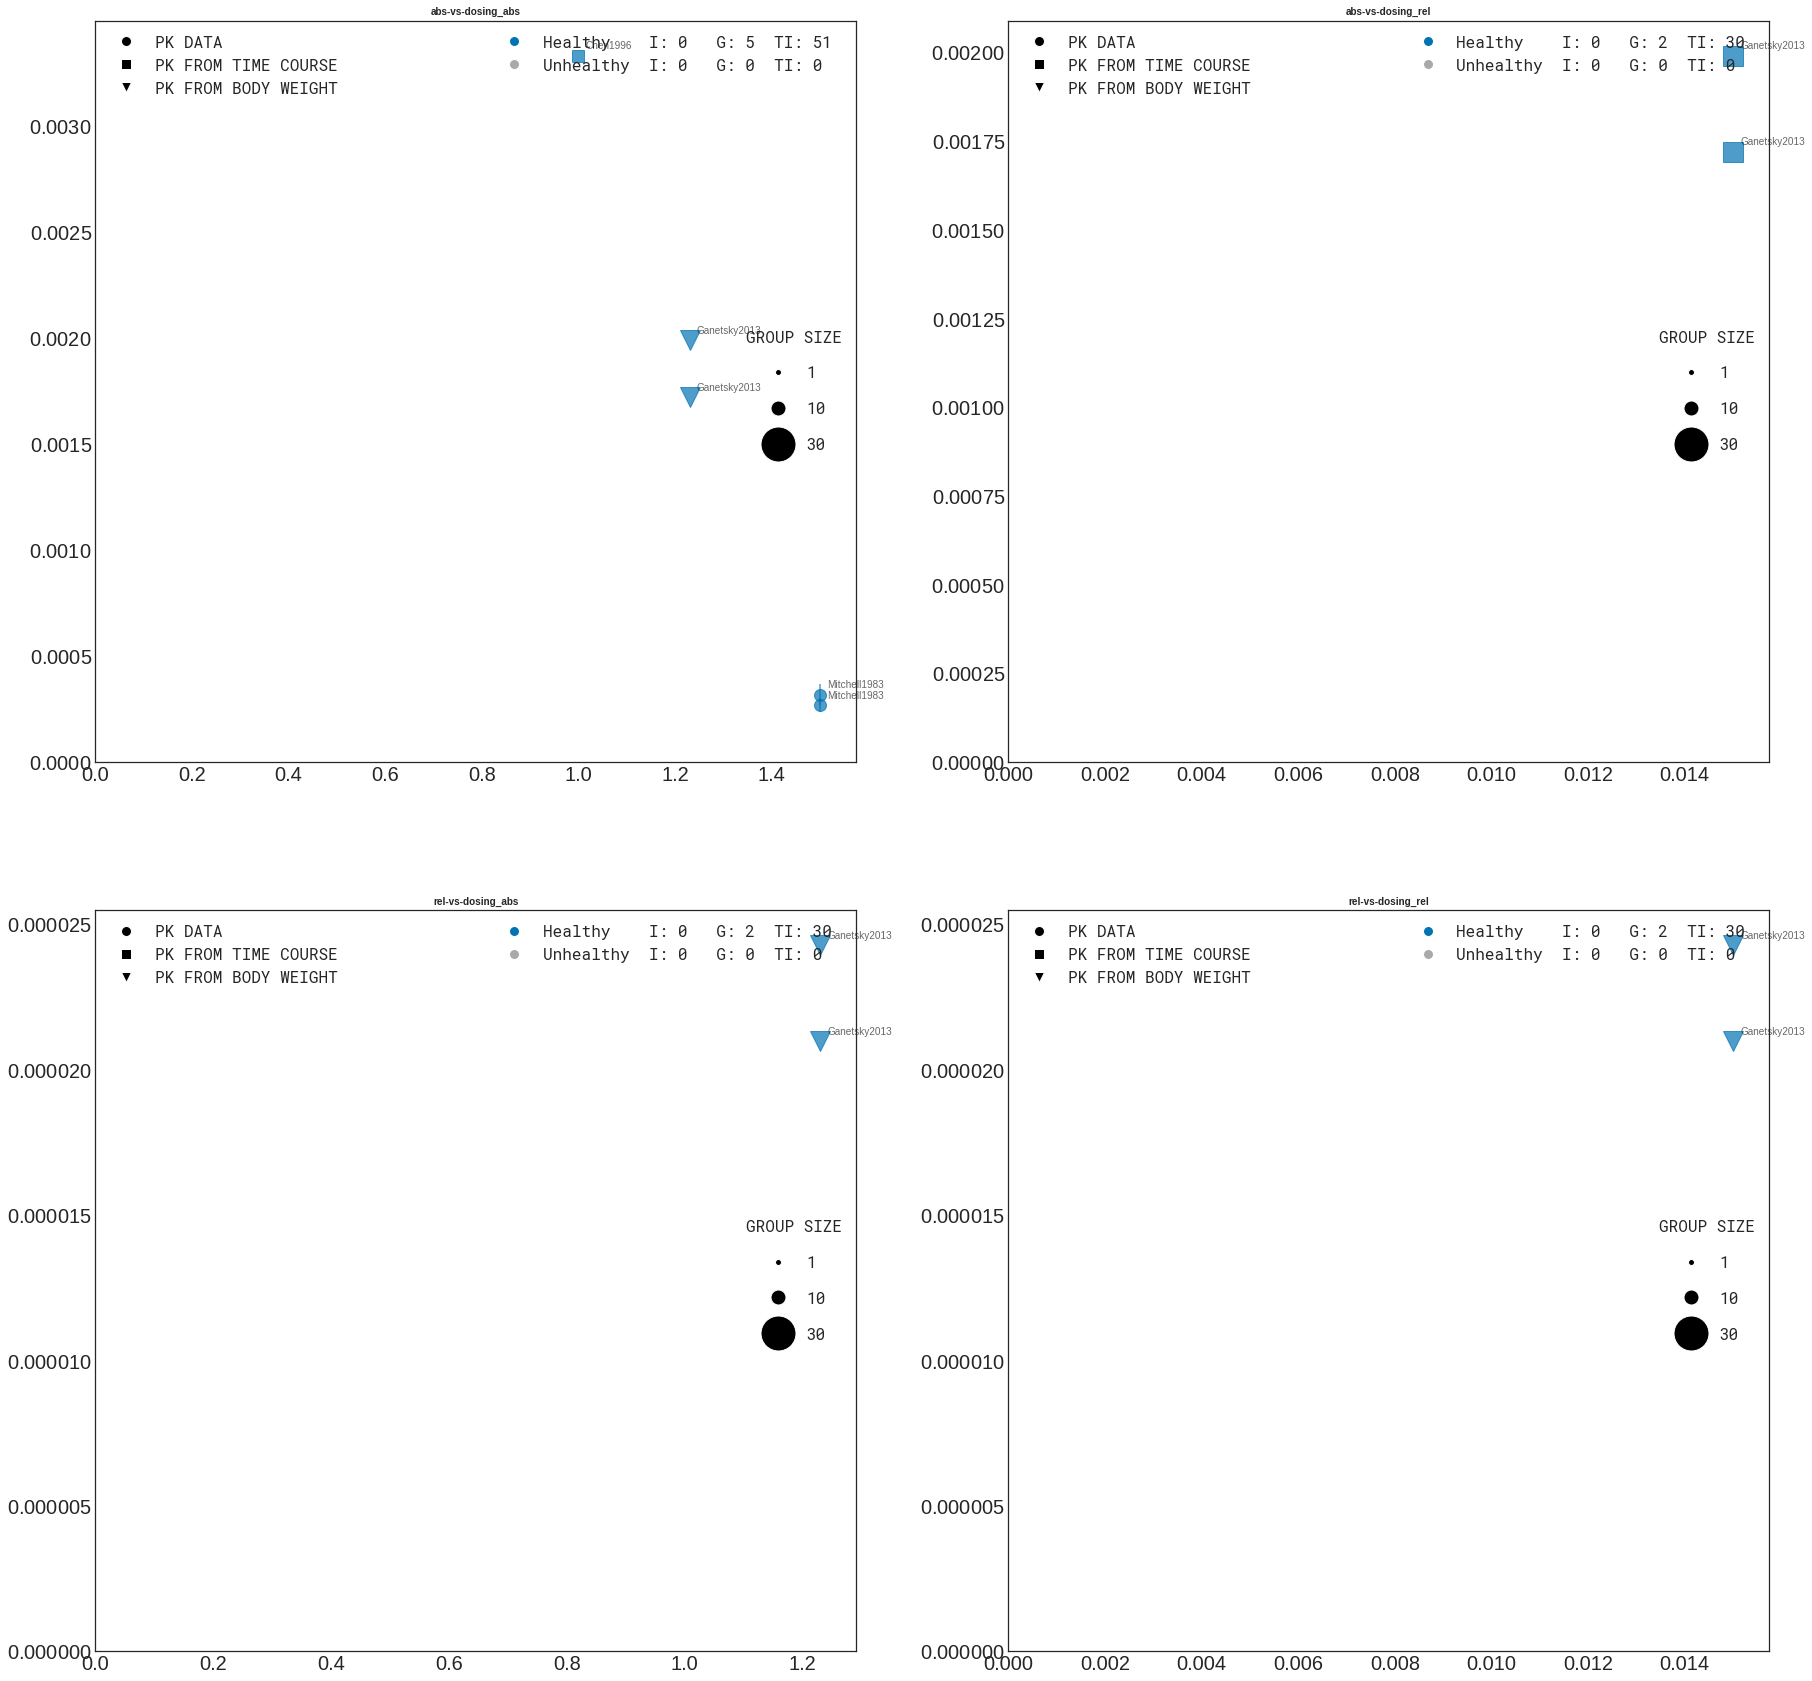

In [6]:
substances = [
    "paracetamol", 
    "paracetamol glucuronide",
    "paracetamol sulfate",
    "paracetamol cysteine",
    "paracetamol mercapturate"
]


def analyses(substance):
    return [f"{substance}_clearance",
            f"{substance}_thalf",
            f"{substance}_tmax",
            f"{substance}_vd",
            f"{substance}_auc_inf",
            f"{substance}_auc_end",
            f"{substance}_kel"]


for substance in substances:
    for analysis in analyses(substance):
        print(f"* {analysis} *")
        data_class = PkdbModel(analysis,destination="3-inferred")
        data_class.read()
        create_plots(data_class.data,categories_all,"reports/all")